In [3106]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from datetime import datetime as dt
from datetime import date
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import holidays

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [3107]:
print('Capstone project start date and time using str method of datetime object:')
print(dt.now())

Capstone project start date and time using str method of datetime object:
2019-12-23 22:21:04.175450


## Data Preparation - Consumer 

In [3108]:
# Reading consumer data file
consumer_data = pd.read_csv('ConsumerElectronics.csv',low_memory=False,na_values=['\\N',''])
consumer_data.head()

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   

   order_item_id   gmv  units  deliverybdays  deliverycdays  \
0   3.419301e+15  6400      1            NaN            NaN   
1   1.420831e+15  6900      1            NaN            NaN   
2   2.421913e+15  1990      1            NaN            NaN   
3   4.416592e+15  1690      1            NaN            NaN   
4   4.419525e+15  1618      1            NaN            NaN   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [3109]:
consumer_data.shape

(1648824, 20)

In [3110]:
consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      335852 non-null float64
deliverycdays                      335853 non-null float64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

In [3111]:
consumer_data=consumer_data.rename({"gmv":"GMV","units":"Units","s1_fact.order_payment_type":"OrderPaymentType","sla":"SLA","deliverycdays":"DeliveryCDays","cust_id":"CustomerId"},axis=1)
consumer_data=consumer_data.rename({"product_analytic_vertical":"ProductVertical","product_mrp":"MRP","product_procurement_sla":"ProcurementSLA"},axis=1)
consumer_data=consumer_data.rename({"order_item_id":"OrderItemId","pincode":"Pincode","product_analytic_super_category":"ProductSuperCategory","product_analytic_category":"ProductCategory"},axis=1)
consumer_data=consumer_data.rename({"fsn_id":"FSNID","order_date":"OrderDate","order_id":"OrderId","product_analytic_sub_category":"ProductSubCategory","deliverybdays":"DeliveryBDay"},axis=1)

In [3112]:
# Converting Order date from string to Date
consumer_data['OrderDate']= pd.to_datetime(consumer_data['OrderDate'])  

In [3113]:
# Converting Order Id from float to String
consumer_data['OrderId']= consumer_data['OrderId'].astype(str) 
consumer_data['OrderItemId']= consumer_data['OrderItemId'].astype(str)

In [3114]:
# Converting datatype of the columns to numeric
consumer_data["GMV"]=pd.to_numeric(consumer_data.GMV, errors='coerce')
consumer_data["DeliveryBDay"]=pd.to_numeric(consumer_data.DeliveryBDay, errors='coerce')
consumer_data["DeliveryCDays"]=pd.to_numeric(consumer_data.DeliveryCDays, errors='coerce')
consumer_data["CustomerId"]=pd.to_numeric(consumer_data.CustomerId, errors='coerce')
consumer_data["Pincode"]=pd.to_numeric(consumer_data.Pincode, errors='coerce')

In [3115]:
consumer_data.shape

(1648824, 20)

In [3116]:
# selecting the data which are from July 2015 to June 2016 
start_date = '2015-07-01 00:00:00'
end_date = '2016-06-30 23:59:59'
consumer_data=consumer_data[(consumer_data['OrderDate'] >= start_date) & (consumer_data['OrderDate'] <= end_date)]
consumer_data.head()

FSNID           OrderDate  Year  Month             OrderId  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000.0   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200.0   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800.0   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400.0   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400.0   

          OrderItemId     GMV  Units  DeliveryBDay  DeliveryCDays  \
0  3419300926147000.0  6400.0      1           NaN            NaN   
1  1420830839915200.0  6900.0      1           NaN            NaN   
2  2421912925714800.0  1990.0      1           NaN            NaN   
3  4416592101738400.0  1690.0      1           NaN            NaN   
4  4419525153426400.0  1618.0      1           NaN            NaN   

  OrderPaymentType  SLA    CustomerId       Pincode ProductSuperCategory  \
0              COD    5 -1.012991e+18 -7.791756e+18                   CE   
1              COD    7 -8.990325e+18  7.335411e+18                   CE   
2              COD   10 -1.040443e+18 -7.477688e+18                   CE   
3          Prepaid    4 -7.604961e+18 -5.835932e+18                   CE   
4          Prepaid    6  2.894557e+18  5.347354e+17                   CE   

   ProductCategory ProductSubCategory ProductVertical   MRP  ProcurementSLA  
0  CameraAccessory    CameraAccessory    CameraTripod  7190               0  
1  CameraAccessory    CameraAccessory    CameraTripod  7190               0  
2  CameraAccessory    CameraAccessory    CameraTripod  2099               3  
3  CameraAccessory    CameraAccessory    CameraTripod  2099               3  
4  CameraAccessory    CameraAccessory    CameraTripod  2099               3

In [3117]:
# to filter the data for the required 3 categories
consumer_data1=consumer_data[(consumer_data['ProductSubCategory']=='CameraAccessory')| (consumer_data['ProductSubCategory']=='HomeAudio')|(consumer_data['ProductSubCategory']=='GamingAccessory')]

In [3118]:
consumer_data1.shape

(566067, 20)

In [3119]:
# creating a new column for week
consumer_data1['Week']=pd.DatetimeIndex(data=consumer_data1['OrderDate']).week

In [3120]:
#As Jan 2016 is after Dec 2015 which is 53 so we consider 1st week as 54th week
consumer_data1.loc[(consumer_data1['Year'] == 2016) & (consumer_data1['Week']<=26),'Week'] = consumer_data1['Week']+53
consumer_data1['Week'].unique()

array([42, 43, 41, 44, 40, 45, 46, 69, 63, 39, 61, 58, 48, 47, 70, 38, 67,
       55, 60, 64, 66, 62, 35, 56, 57, 49, 53, 65, 71, 50, 51, 59, 52, 54,
       68, 74, 72, 75, 73, 76, 77, 78, 79, 29, 30, 28, 31, 37, 27, 32, 34,
       33, 36], dtype=int64)

In [3121]:
# drop GMV NaN rows 
consumer_data1.dropna(subset=['GMV'], how='all', inplace = True)
print(consumer_data1.shape)

(564395, 21)


In [3122]:
# Drop duplicates of FSN ID, OrderDate, OrderId, OrderItemId& Units
consumer_data1.drop_duplicates(subset =['OrderDate','OrderId','OrderItemId','Units','CustomerId'],keep = False, inplace = True) 
consumer_data1.shape

(484494, 21)

In [3123]:
#remove free products
consumer_data1=consumer_data1.loc[(consumer_data1['MRP'] > 0),:]
consumer_data1.shape

(481541, 21)

In [3124]:
consumer_data1['GMV'].describe()

count    481541.000000
mean       1279.076121
std        2413.620999
min           0.000000
25%         297.000000
50%         549.000000
75%        1499.000000
max      148050.000000
Name: GMV, dtype: float64

In [3125]:
consumer_data1.shape

(481541, 21)

In [3126]:
#To check the outliers
consumer_data1.quantile([0,.1, .25, .5, .75,.8,.85,.9,.95,.99,0.995, 0.999], axis = 0)

Year  Month      GMV  Units  DeliveryBDay  DeliveryCDays   SLA  \
0.000  2015.0    1.0      0.0    1.0         -73.0         -859.0   0.0   
0.100  2015.0    1.0    199.0    1.0           2.0            3.0   3.0   
0.250  2015.0    3.0    297.0    1.0           3.0            4.0   4.0   
0.500  2016.0    5.0    549.0    1.0           5.0            5.0   6.0   
0.750  2016.0   10.0   1499.0    1.0           6.0            7.0   7.0   
0.800  2016.0   10.0   1895.0    1.0           6.0            7.0   8.0   
0.850  2016.0   11.0   2348.0    1.0           7.0            8.0   8.0   
0.900  2016.0   12.0   2790.0    1.0           7.0            8.0   9.0   
0.950  2016.0   12.0   4049.0    1.0           8.0           10.0  11.0   
0.990  2016.0   12.0   9450.0    2.0          11.0           12.0  14.0   
0.995  2016.0   12.0  12255.1    2.0          12.0           14.0  15.0   
0.999  2016.0   12.0  32995.0    4.0          15.0           18.0  19.0   

         CustomerId       Pincode      MRP  ProcurementSLA  Week  
0.000 -9.223193e+18 -9.221830e+18     63.0            -1.0  27.0  
0.100 -7.389522e+18 -7.317228e+18    410.0             1.0  42.0  
0.250 -4.631918e+18 -4.424581e+18    766.0             2.0  47.0  
0.500 -2.203216e+16  1.328550e+17   1199.0             2.0  58.0  
0.750  4.614273e+18  4.779414e+18   2750.0             3.0  68.0  
0.800  5.539521e+18  5.706887e+18   3001.0             4.0  70.0  
0.850  6.465324e+18  6.473162e+18   3999.0             5.0  72.0  
0.900  7.391244e+18  7.346497e+18   5399.0             5.0  74.0  
0.950  8.300245e+18  8.307129e+18   6990.0             5.0  76.0  
0.990  9.043667e+18  8.999192e+18  17995.0             6.0  78.0  
0.995  9.134366e+18  9.120574e+18  39999.0            14.0  79.0  
0.999  9.205247e+18  9.205086e+18  50000.0            14.0  79.0

In [3127]:
# Units > 4  outlier 
consumer_data1= consumer_data1[consumer_data1['Units'] <= 4]

# SLA > 18  outlier  
consumer_data1= consumer_data1[consumer_data1['SLA'] <= 18]

# Procurement SLA >= 15 
consumer_data1= consumer_data1[consumer_data1['ProcurementSLA'] <= 15]

consumer_data1.shape

(480619, 21)

In [3128]:
# Procurement SLA < 0 should be normalised with 0
consumer_data1['ProcurementSLA'] = consumer_data1.apply(lambda x:0 if x.ProcurementSLA < 0 else x.ProcurementSLA, axis=1)

In [3129]:
consumer_data1.drop(['DeliveryBDay'],axis=1,inplace=True)
consumer_data1.drop(['DeliveryCDays'],axis=1,inplace=True)

In [3130]:
consumer_data1['PP'] = consumer_data1['MRP'].apply(lambda x:'Display_Price_ending_with_99' if str(x).endswith('99') else 'Display_Price_others')

In [3131]:
price_df = pd.get_dummies(consumer_data1['PP'])
price_df.head()

Display_Price_ending_with_99  Display_Price_others
0                             0                     1
1                             0                     1
2                             1                     0
3                             1                     0
4                             1                     0

In [3132]:
consumer_data1 = pd.concat([consumer_data1,price_df],axis=1)
consumer_data1.head()

FSNID           OrderDate  Year  Month             OrderId  \
0  ACCCX3S58G7B5F6P 2015-10-17 15:11:54  2015     10  3419300926147000.0   
1  ACCCX3S58G7B5F6P 2015-10-19 10:07:22  2015     10  1420830839915200.0   
2  ACCCX3S5AHMF55FV 2015-10-20 15:45:56  2015     10  2421912925714800.0   
3  ACCCX3S5AHMF55FV 2015-10-14 12:05:15  2015     10  4416592101738400.0   
4  ACCCX3S5AHMF55FV 2015-10-17 21:25:03  2015     10  4419525153426400.0   

          OrderItemId     GMV  Units OrderPaymentType  SLA  ...  \
0  3419300926147000.0  6400.0      1              COD    5  ...   
1  1420830839915200.0  6900.0      1              COD    7  ...   
2  2421912925714800.0  1990.0      1              COD   10  ...   
3  4416592101738400.0  1690.0      1          Prepaid    4  ...   
4  4419525153426400.0  1618.0      1          Prepaid    6  ...   

   ProductSuperCategory  ProductCategory ProductSubCategory ProductVertical  \
0                    CE  CameraAccessory    CameraAccessory    CameraTripod   
1                    CE  CameraAccessory    CameraAccessory    CameraTripod   
2                    CE  CameraAccessory    CameraAccessory    CameraTripod   
3                    CE  CameraAccessory    CameraAccessory    CameraTripod   
4                    CE  CameraAccessory    CameraAccessory    CameraTripod   

    MRP ProcurementSLA  Week                            PP  \
0  7190              0    42          Display_Price_others   
1  7190              0    43          Display_Price_others   
2  2099              3    43  Display_Price_ending_with_99   
3  2099              3    42  Display_Price_ending_with_99   
4  2099              3    42  Display_Price_ending_with_99   

   Display_Price_ending_with_99 Display_Price_others  
0                             0                    1  
1                             0                    1  
2                             1                    0  
3                             1                    0  
4                             1                    0  

[5 rows x 22 columns]

In [3133]:
consumer_data1.drop(['PP'],axis=1,inplace=True)

In [3134]:
# Importing Canada Holidays list for 2015 and 2016
Holidays = holidays.Canada(years=[2015,2016], state="ON")
Holidays=pd.DataFrame(Holidays,index=[0]).transpose() 
Holidays.reset_index(level=0, inplace=True)
Holidays['Holidays']= pd.to_datetime(Holidays['index'])
Holidays.drop([Holidays.columns[1]], axis=1, inplace=True)
Holidays.drop([Holidays.columns[0]], axis=1, inplace=True)

In [3135]:
week = consumer_data1.loc[:,['OrderDate','Week']]
week.head()

OrderDate  Week
0 2015-10-17 15:11:54    42
1 2015-10-19 10:07:22    43
2 2015-10-20 15:45:56    43
3 2015-10-14 12:05:15    42
4 2015-10-17 21:25:03    42

In [3136]:
week['Date'] = week['OrderDate'].dt.normalize()
week['Month'] = week['Date'].dt.month
week['Year'] = week['Date'].dt.year
week['Day'] = week['Date'].dt.weekday_name
week['Timeofday'] = week['OrderDate'].dt.hour

In [3137]:
week['Daysinmonth'] = week['Date'].dt.daysinmonth

In [3138]:
# Creating array with Special Sale days
SaleDays = pd.to_datetime(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30','2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12','2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31','2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21','2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-03-25','2016-03-26','2016-03-27'])

# Adding SaleDay,Holiday,weekEnd,Pay Days flag to Date DataFrame
week['SaleFlag'] = week.apply(lambda x:1 if x.Date in (SaleDays) else 0, axis=1)
week['WeekendFlag'] = week.apply(lambda x:1 if x.Day in ('Saturday','Sunday') else 0, axis=1)
week['PayDayFlag'] = week.apply(lambda x:1 if x.Date.day==1 else 0, axis=1)
week['HoliDayFlag'] = week.apply(lambda x:1 if x.Date in (Holidays.Holidays.tolist()) else 0, axis=1)

week.head()

OrderDate  Week       Date  Month  Year        Day  Timeofday  \
0 2015-10-17 15:11:54    42 2015-10-17     10  2015   Saturday         15   
1 2015-10-19 10:07:22    43 2015-10-19     10  2015     Monday         10   
2 2015-10-20 15:45:56    43 2015-10-20     10  2015    Tuesday         15   
3 2015-10-14 12:05:15    42 2015-10-14     10  2015  Wednesday         12   
4 2015-10-17 21:25:03    42 2015-10-17     10  2015   Saturday         21   

   Daysinmonth  SaleFlag  WeekendFlag  PayDayFlag  HoliDayFlag  
0           31         1            1           0            0  
1           31         0            0           0            0  
2           31         0            0           0            0  
3           31         0            0           0            0  
4           31         1            1           0            0

In [3139]:
consumer_data1['OrderPaymentType'].unique()

array(['COD', 'Prepaid'], dtype=object)

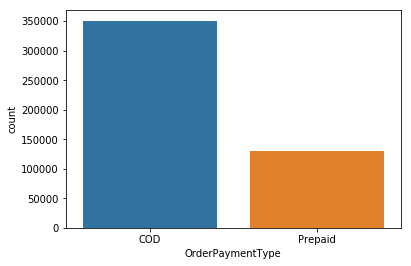

In [3140]:
# COD payments are more compared to Prepaid
sns.countplot(consumer_data1['OrderPaymentType'])

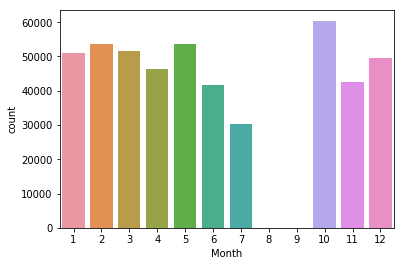

In [3141]:
sns.countplot(week['Month'])

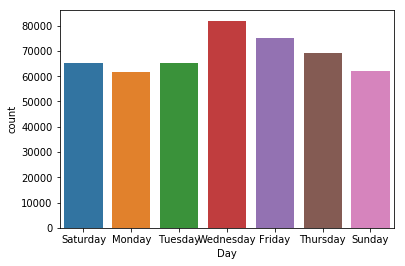

In [3142]:
# COD payments are more compared to Prepaid
sns.countplot(week['Day'])

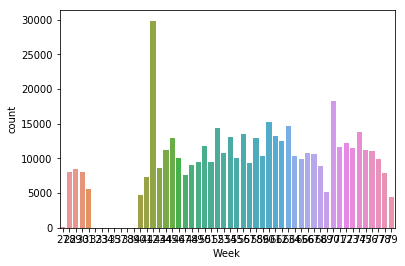

In [3143]:
sns.countplot(week['Week'])

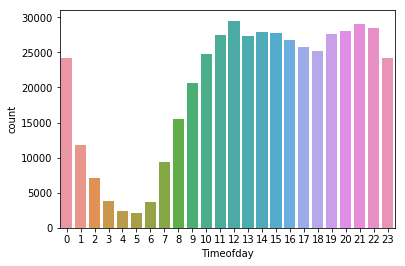

In [3144]:
sns.countplot(week['Timeofday'])

In [3145]:
consumer_data1['ProductSubCategory'].unique()

array(['CameraAccessory', 'GamingAccessory', 'HomeAudio'], dtype=object)

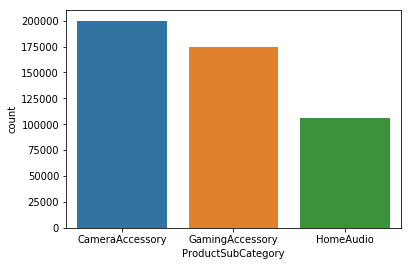

In [3146]:
sns.countplot(consumer_data1['ProductSubCategory'])

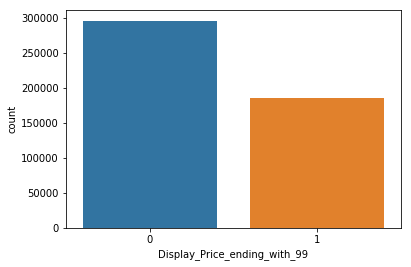

In [3147]:
sns.countplot(consumer_data1['Display_Price_ending_with_99'])

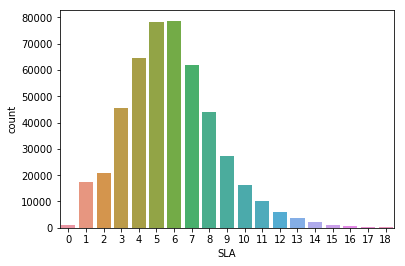

In [3148]:
sns.countplot(consumer_data1['SLA'])

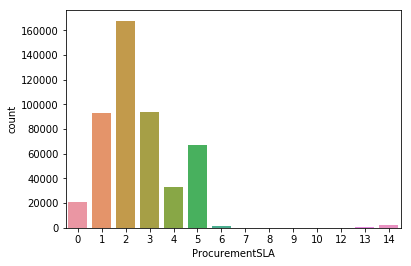

In [3149]:
sns.countplot(consumer_data1['ProcurementSLA'])

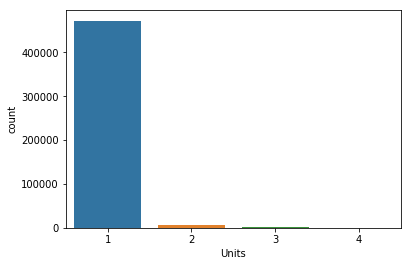

In [3150]:
sns.countplot(consumer_data1['Units'])

In [3151]:
consumer_data1['ProductVertical'].unique()

array(['CameraTripod', 'Lens', 'CameraBag', 'Flash', 'CameraBattery',
       'CameraBatteryCharger', 'GamePad', 'GamingAccessoryKit',
       'GamingHeadset', 'GamingMemoryCard', 'MotionController',
       'GamingMouse', 'GamingAdapter', 'TVOutCableAccessory', 'GamingGun',
       'JoystickGamingWheel', 'HomeAudioSpeaker', 'CameraRemoteControl',
       'Binoculars', 'Filter', 'GamingMousePad', 'Strap',
       'GamingKeyboard', 'Dock', 'SlingBox', 'GamingSpeaker',
       'CoolingPad', 'BoomBox', 'CameraBatteryGrip', 'CameraAccessory',
       'CameraFilmRolls', 'CameraMount', 'DockingStation', 'DJController',
       'ExtensionTube', 'FMRadio', 'HiFiSystem', 'KaraokePlayer',
       'Telescope', 'VoiceRecorder', 'GamingChargingStation',
       'CameraEyeCup', 'GameControlMount', 'SoundMixer', 'CameraLEDLight',
       'CameraMicrophone', 'FlashShoeAdapter', 'Softbox',
       'ReflectorUmbrella', 'Teleconverter', 'CameraHousing'],
      dtype=object)

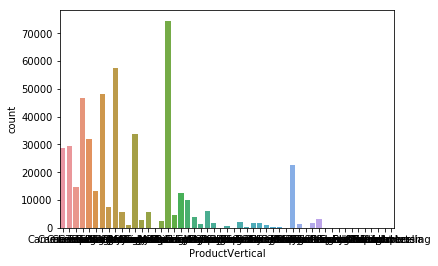

In [3152]:
sns.countplot(x="ProductVertical", data = consumer_data1)

<Figure size 720x576 with 0 Axes>

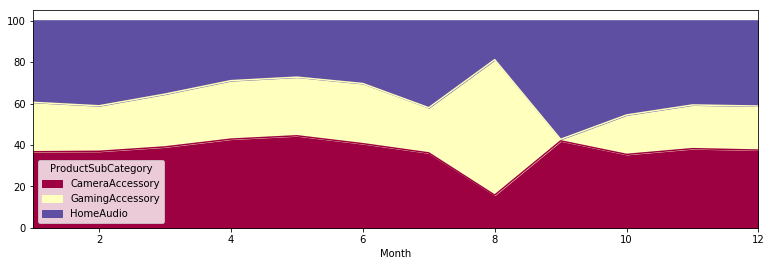

In [3153]:
fig = plt.figure(figsize=(10, 8))

data1 = (consumer_data1.groupby(['Month', 'ProductSubCategory']).GMV.sum())*(100)/consumer_data1.groupby(['Month']).GMV.sum()
data1.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(13, 4))


<Figure size 720x576 with 0 Axes>

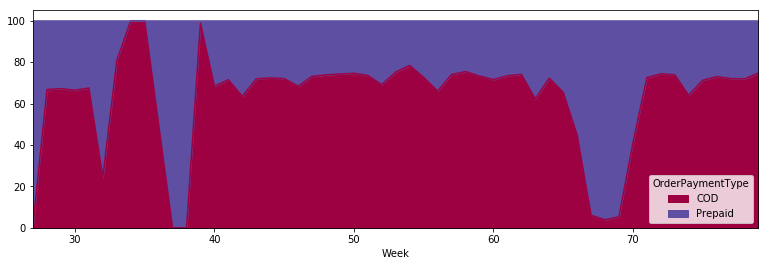

In [3154]:
fig = plt.figure(figsize=(10, 8))

data1 = (consumer_data1.groupby(['Week', 'OrderPaymentType']).GMV.sum())*(100)/consumer_data1.groupby(['Week']).GMV.sum()
data1.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(13, 4))

### Feature Engineering

In [3155]:
# Listing price : gmv / units
consumer_data1['listingprice']=consumer_data1['GMV']/consumer_data1['Units']
consumer_data1['discountprice']=(consumer_data1['MRP']- consumer_data1['listingprice'])/consumer_data1['MRP']

# moving average
consumer_data1['movingavg_gmv'] = consumer_data1['GMV'].rolling(window=1).mean()
consumer_data1['movingavg_listingprice'] = consumer_data1['listingprice'].rolling(window=1).mean()
consumer_data1['movingavg_discountprice'] = consumer_data1['discountprice'].rolling(window=1).mean()

#clumulative moving average
consumer_data1['cumulative_movingavg_gmv'] = consumer_data1['GMV'].expanding(min_periods=1).mean()
consumer_data1['cumulative_movingavg_listingprice'] = consumer_data1['listingprice'].expanding(min_periods=1).mean()
consumer_data1['cumulative_movingavg_discountprice'] = consumer_data1['discountprice'].expanding(min_periods=1).mean()


#Exponential moving average
consumer_data1['exponential_movingavg_gmv'] = consumer_data1['GMV'].ewm(span=1).mean()
consumer_data1['exponential_movingavg_listingprice'] = consumer_data1['listingprice'].ewm(span=1).mean()
consumer_data1['exponential_movingavg_discountprice'] = consumer_data1['discountprice'].ewm(span=1).mean()

# Lag
consumer_data1['lag_discountprice'] =consumer_data1['discountprice'].shift(1)
consumer_data1['lag_GMV'] =consumer_data1['GMV'].shift(1)



In [3156]:
# KPI for deriving Onlinepayment i.e PrePaid Rate
consumer_data1['PaymentType_alt'] = consumer_data1.apply(lambda x:'COD' if x.OrderPaymentType=='COD' else 'Others', axis=1)
consumer_data1['OrderPaymentType'] = consumer_data1.apply(lambda x:0 if x.OrderPaymentType=='COD' else 1, axis=1)
payment_type = pd.get_dummies(consumer_data1['PaymentType_alt'])
consumer_data1 = pd.concat([consumer_data1, payment_type],axis=1)
Prepaid_Orders = pd.pivot_table(consumer_data1, index=['ProductSubCategory','Week'],values=['OrderPaymentType'],aggfunc=[len,np.sum]).reset_index().rename(columns={'len': 'TotalOrders','sum': 'OnlineOrders'})
Prepaid_Orders.columns = Prepaid_Orders.columns.droplevel(1)
consumer_data1.drop(['PaymentType_alt'], axis = 1, inplace = True)

Prepaid_Orders["OnlinePayRate"]=100*(Prepaid_Orders["OnlineOrders"]/Prepaid_Orders["TotalOrders"])
Prepaid_Orders = Prepaid_Orders.drop(['TotalOrders','OnlineOrders'], axis=1)
Prepaid_Orders.columns = ['ProductSubCategory','Week','OnlinePayRate'] 
Prepaid_Orders.head(5)

# KPI  for Price Tag by Vertical using Units MRP andListing Price with help of ClusterAnalysis
Cluster = pd.pivot_table(consumer_data1, index=['ProductVertical'],values=['Units','MRP','listingprice'],aggfunc=np.sum).reset_index()

In [3157]:
consumer_data1.shape

(480619, 36)

In [3158]:
# understanding Product based on Price units sold using KMeans Cluster
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 3)
Y_Pred=kmean.fit_predict(Cluster[['Units','MRP','listingprice']])
Cluster['Cluster'] = Y_Pred
Cluster.head(5)

ProductVertical       MRP  Units  listingprice  Cluster
0       Binoculars  40071392  12545  2.499684e+07        1
1          BoomBox   8229477   2068  6.808870e+06        1
2  CameraAccessory   1915778   1847  1.192249e+06        1
3        CameraBag  32226263  14790  2.077225e+07        1
4    CameraBattery  44150099  34034  2.001900e+07        1

In [3159]:
#Cluster.groupby('Cluster')['GMV'].sum().plot(kind='BAR')

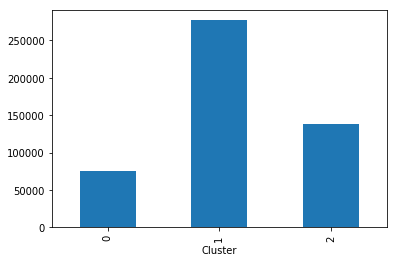

In [3160]:
Cluster.groupby('Cluster')['Units'].sum().plot(kind='BAR')

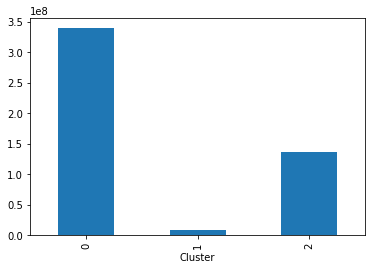

In [3161]:
Cluster.groupby('Cluster')['MRP'].mean().plot(kind='BAR')

We can see from above that cluster 1 is having products which are of high cost compared to cluster0 and cluster2, so the products in cluster 1 are premium products.We can also see that sale value of cluster 0 is high so the products in cluster 0 are mass products.

In [3162]:
Cluster['PriceTag'] = Cluster.apply(lambda x:'Mass' if x.Cluster==2 else 'Premium' if x.Cluster==0 else 'Aspiring', axis=1)
Cluster_new = Cluster.drop(['Units','MRP','listingprice','Cluster'], axis=1)

In [3163]:
# Joining Price Tag to Transaction data at Vertical Level
consumer_data1=pd.merge(consumer_data1, Cluster_new, on=['ProductVertical'], how='outer')

In [3164]:
# Joining Prepaid rate to Transaction data at Subcategory & Week Level
consumer_data1=pd.merge(consumer_data1, Prepaid_Orders, on=['ProductSubCategory','Week'], how='outer')

In [3165]:
consumer_data1.shape

(480619, 38)

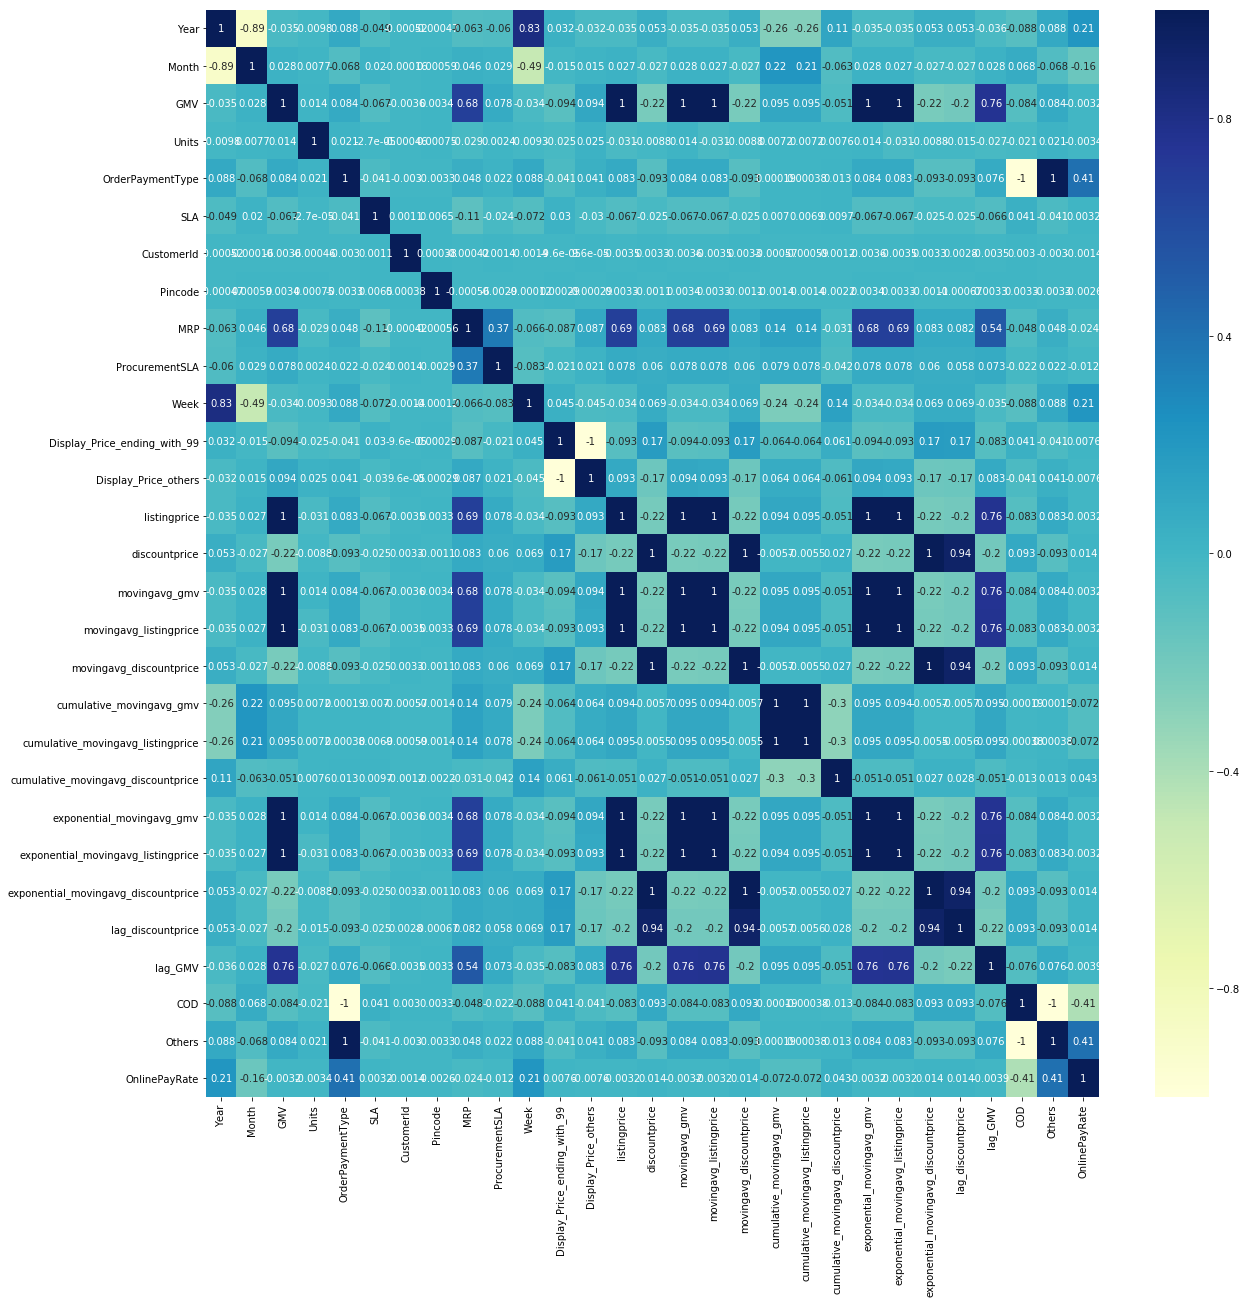

In [3166]:
plt.figure(figsize = (20, 20))
sns.heatmap(consumer_data1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3167]:

#code for removing co related variables:
# Create correlation matrix
corr_matrix = consumer_data1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
consumer_data1.drop(to_drop, axis=1, inplace=True)



In [3168]:
consumer_data1.shape

(480619, 26)

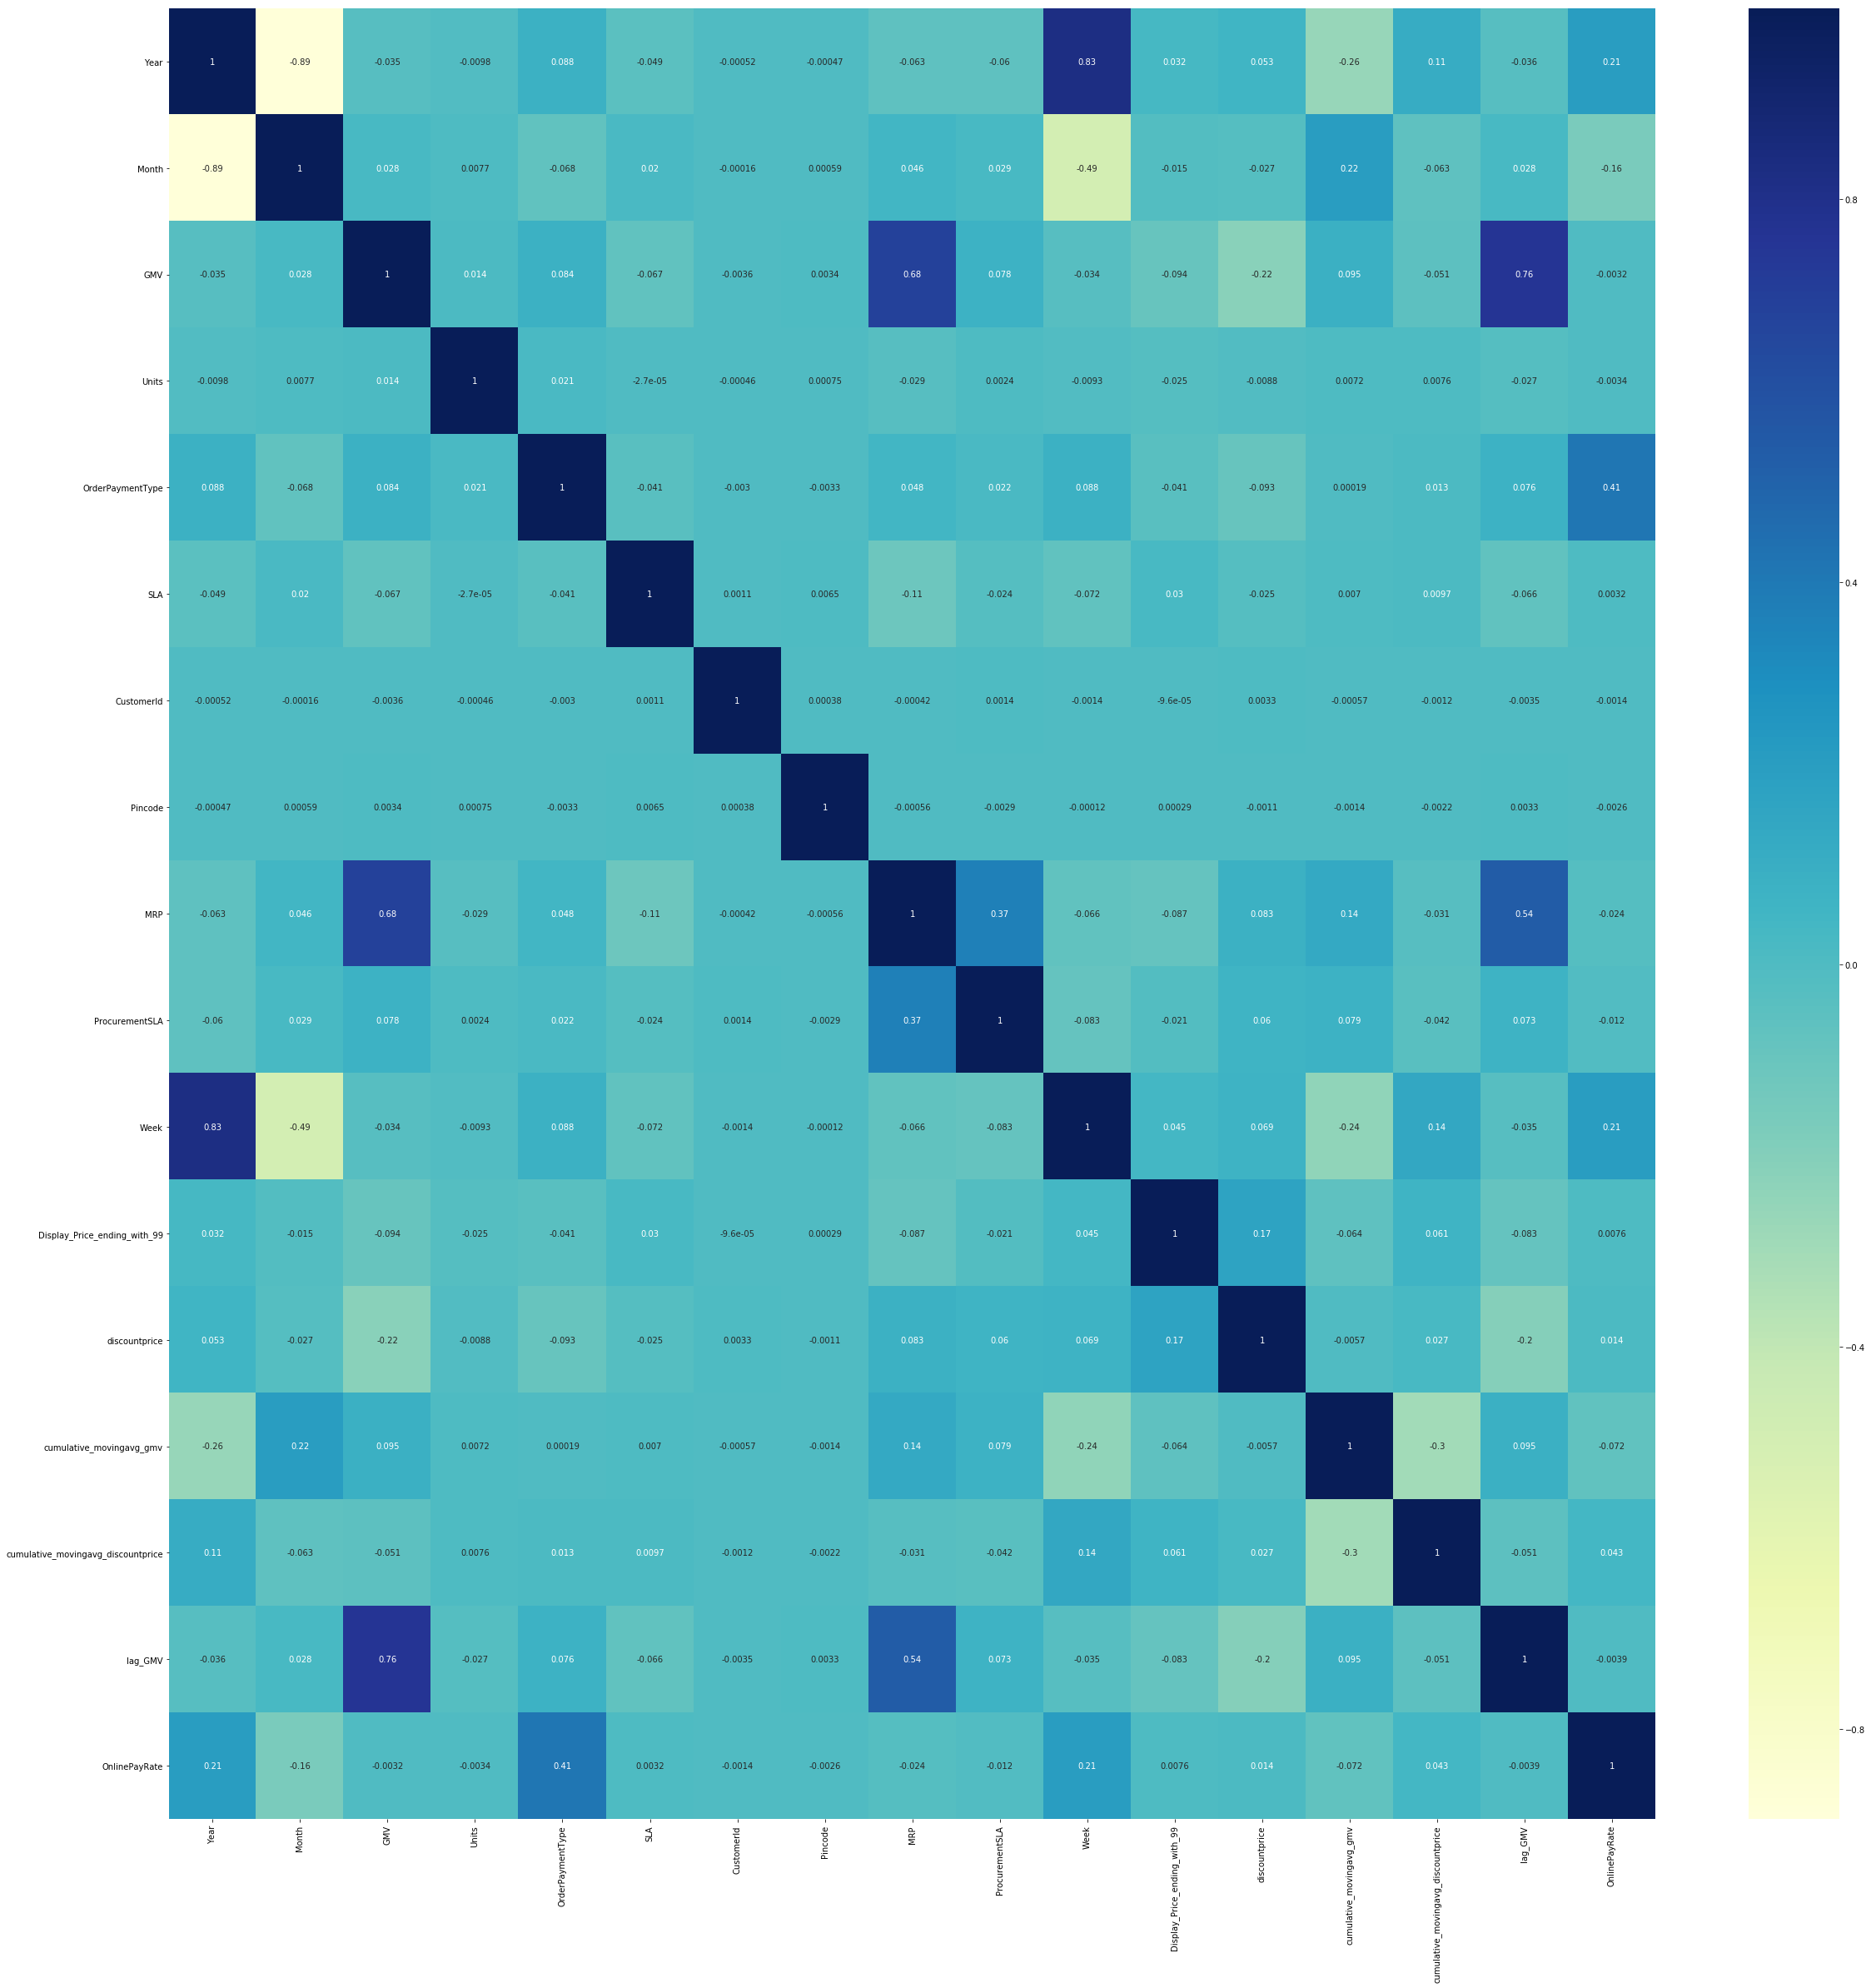

In [3169]:

plt.figure(figsize = (40, 40))
sns.heatmap(consumer_data1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3170]:
consumer_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480619 entries, 0 to 480618
Data columns (total 26 columns):
FSNID                                 480619 non-null object
OrderDate                             480619 non-null datetime64[ns]
Year                                  480619 non-null int64
Month                                 480619 non-null int64
OrderId                               480619 non-null object
OrderItemId                           480619 non-null object
GMV                                   480619 non-null float64
Units                                 480619 non-null int64
OrderPaymentType                      480619 non-null int64
SLA                                   480619 non-null int64
CustomerId                            480619 non-null float64
Pincode                               480619 non-null float64
ProductSuperCategory                  480619 non-null object
ProductCategory                       480619 non-null object
ProductSubCategory           

<Figure size 720x576 with 0 Axes>

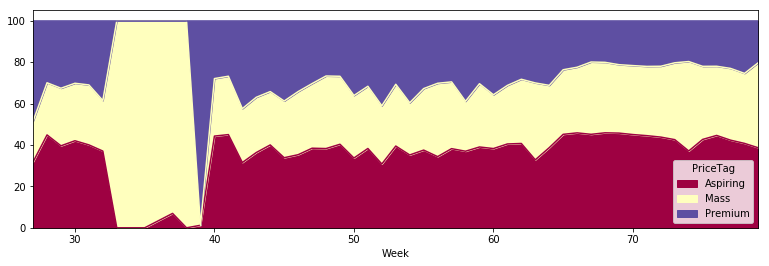

In [3171]:
fig = plt.figure(figsize=(10, 8))

data1 = (consumer_data1.groupby(['Week', 'PriceTag']).GMV.sum())*(100)/consumer_data1.groupby(['Week']).GMV.sum()
data1.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(13, 4))

<Figure size 720x576 with 0 Axes>

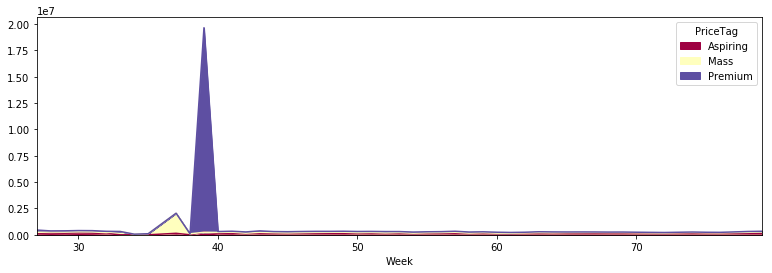

In [3172]:
fig = plt.figure(figsize=(10, 8))

data1 = (consumer_data1.groupby(['Week', 'PriceTag']).GMV.sum())*(100)/consumer_data1.groupby(['Week']).discountprice.sum()
data1.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(13, 4))

<Figure size 720x576 with 0 Axes>

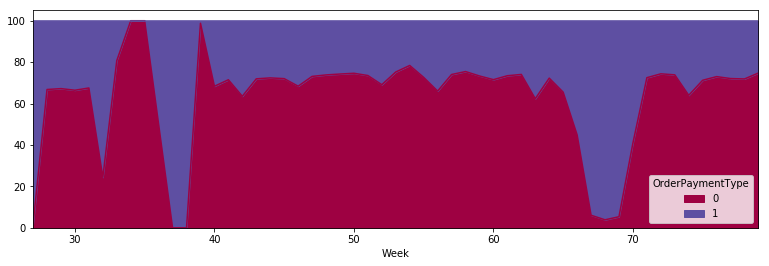

In [3173]:
fig = plt.figure(figsize=(10, 8))

data1 = (consumer_data1.groupby(['Week', 'OrderPaymentType']).GMV.sum())*(100)/consumer_data1.groupby(['Week']).GMV.sum()
data1.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(13, 4))

#### Insights 
1. More sale is happening with payment type = COD
2. Customers prefer Prepaid payment if there is a huge promotion going on
3. Even the small discounts on aspiring products can result in a big sale

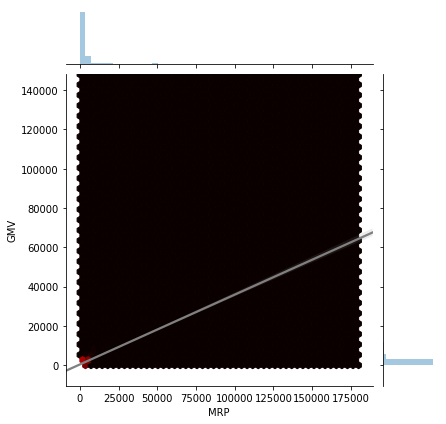

In [3174]:
g = sns.jointplot(
              x = 'MRP',
              y = 'GMV', 
              data = consumer_data1, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)


sns.regplot(consumer_data1.MRP,consumer_data1.GMV, ax=g.ax_joint, scatter=False, color='grey');

In [3175]:
vertical = pd.get_dummies(consumer_data1['ProductVertical'])
consumer_data1 = pd.concat([consumer_data1, vertical], axis = 1)

In [3176]:
consumer_data1['GMV'].describe()

count    480619.000000
mean       1276.578388
std        2409.429014
min           0.000000
25%         297.000000
50%         549.000000
75%        1499.000000
max      148050.000000
Name: GMV, dtype: float64

In [3177]:
# Generating Weeklevel aggeration data from transaction data for modeling
TransSC = pd.pivot_table(consumer_data1, index=['ProductSubCategory','Week'],values=['Units','discountprice',
'cumulative_movingavg_gmv','cumulative_movingavg_discountprice',
'Display_Price_ending_with_99',  'Binoculars', 'BoomBox',
'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
'CameraTripod', 'CoolingPad', 'DJController', 'Dock', 'DockingStation',
'ExtensionTube', 'FMRadio', 'Filter', 'Flash', 'FlashShoeAdapter',
'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
'HiFiSystem', 'HomeAudioSpeaker', 'JoystickGamingWheel',
'KaraokePlayer', 'Lens', 'MotionController', 'ReflectorUmbrella',
'SlingBox', 'Softbox', 'SoundMixer', 'Strap', 'TVOutCableAccessory',
'Teleconverter', 'Telescope', 'VoiceRecorder'],aggfunc=[np.sum]).reset_index()


In [3178]:
TransSC.columns = ['ProductSubCategory','Week','Units','discountprice',
'cumulative_movingavg_gmv','cumulative_movingavg_discountprice',
'Display_Price_ending_with_99', 'Binoculars', 'BoomBox',
'CameraAccessory', 'CameraBag', 'CameraBattery', 'CameraBatteryCharger',
'CameraBatteryGrip', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
'CameraTripod', 'CoolingPad', 'DJController', 'Dock', 'DockingStation',
'ExtensionTube', 'FMRadio', 'Filter', 'Flash', 'FlashShoeAdapter',
'GameControlMount', 'GamePad', 'GamingAccessoryKit', 'GamingAdapter',
'GamingChargingStation', 'GamingHeadset', 'GamingKeyboard',
'GamingMemoryCard', 'GamingMouse', 'GamingMousePad', 'GamingSpeaker',
'HiFiSystem', 'HomeAudioSpeaker', 'JoystickGamingWheel',
'KaraokePlayer', 'Lens', 'MotionController', 'ReflectorUmbrella',
'SlingBox', 'Softbox', 'SoundMixer', 'Strap', 'TVOutCableAccessory',
'Teleconverter', 'Telescope', 'VoiceRecorder'] 

In [3179]:
#Weeklevel aggeration data from transaction data 
Aggregate = pd.pivot_table(consumer_data1, index=['ProductSubCategory','Week'],values=['MRP','ProcurementSLA','SLA'],aggfunc=[np.mean]).reset_index()
Aggregate.columns = ['ProductSubCategory','Week','SLA','MRP','ProcurementSLA'] 
Aggregate.head(5)

ProductSubCategory  Week          SLA       MRP  ProcurementSLA
0    CameraAccessory    27  1422.535714  2.678571        2.500000
1    CameraAccessory    28  2450.969374  2.731934        7.077426
2    CameraAccessory    29  2525.130491  2.773325        6.431228
3    CameraAccessory    30  2493.491729  2.823224        6.442102
4    CameraAccessory    31  2443.924658  2.774951        6.396282

In [3180]:
#Weeklevel aggeration data from transaction data 
Aggregate_GMV = pd.pivot_table(consumer_data1, index=['ProductSubCategory','Week'],values=['GMV'],aggfunc=[np.sum]).reset_index()
Aggregate_GMV.columns = ['ProductSubCategory','Week','GMV'] 
Aggregate_GMV.head(5)

ProductSubCategory  Week        GMV
0    CameraAccessory    27    18196.0
1    CameraAccessory    28  4062209.0
2    CameraAccessory    29  4675888.0
3    CameraAccessory    30  4435892.0
4    CameraAccessory    31  2973836.0

In [3181]:
Aggregate_GMV['GMV'].describe()

count    1.460000e+02
mean     4.202382e+06
std      2.503055e+06
min      2.840000e+02
25%      3.024670e+06
50%      4.056450e+06
75%      5.287708e+06
max      1.959657e+07
Name: GMV, dtype: float64

In [3182]:
# Joining Transactional Week aggregation data
TransSC=pd.merge(TransSC, Aggregate, on=['ProductSubCategory','Week'], how='outer')

In [3183]:
# Joining Transactional Week aggregation data
TransSC=pd.merge(TransSC, Aggregate_GMV, on=['ProductSubCategory','Week'], how='outer')

In [3184]:
TransSC['GMV'].describe()

count    1.460000e+02
mean     4.202382e+06
std      2.503055e+06
min      2.840000e+02
25%      3.024670e+06
50%      4.056450e+06
75%      5.287708e+06
max      1.959657e+07
Name: GMV, dtype: float64

In [3185]:
# Joining PrepaidRate to transactional Week aggregation data
TransSC=pd.merge(TransSC, Prepaid_Orders, on=['ProductSubCategory','Week'], how='outer')

In [3186]:
TransSC.shape

(146, 61)

In [3187]:
# Importing Media Investiment and NPS information
Mediadata = pd.ExcelFile("Media data and other information.xlsx")

# Reading Media Investment and NPS WorkSheet and creating dataset

Media_Investment = pd.read_excel(Mediadata, 'Media Investment',skiprows=2,nrows=12)
NPS_Score = pd.read_excel(Mediadata, 'Monthly NPS Score',skiprows=1)
Media_Investment = Media_Investment.drop(['Unnamed: 0'], axis=1)

In [3188]:
Media_Investment.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015      7         17.061775  0.215330   2.533014     7.414270   
1  2015      8          5.064306  0.006438   1.278074     1.063332   
2  2015      9         96.254380  3.879504   1.356528    62.787651   
3  2015     10        170.156297  6.144711  12.622480    84.672532   
4  2015     11         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    NaN    NaN  
1           0.000006          0.129244     0.073684   2.513528    NaN    NaN  
2           0.610292         16.379990     5.038266   6.202149    NaN    NaN  
3           3.444075         24.371778     6.973711  31.927011    NaN    NaN  
4           0.168633         19.561574     6.595767   5.222032    NaN    NaN

In [3189]:
Media_Investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
Radio                3 non-null float64
Other                3 non-null float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


In [3190]:
Media_Investment['Year'] = pd.to_numeric(Media_Investment['Year'], errors='coerce')
Media_Investment['Month'] = pd.to_numeric(Media_Investment['Month'], errors='coerce')
Media_Investment = Media_Investment.dropna(subset=['Year','Month'])

In [3191]:
# Converting datatypes from string to float
Media_Investment['Total Investment']= Media_Investment['Total Investment'].astype(float)
Media_Investment['TV']= Media_Investment['TV'].astype(float)
Media_Investment['Digital']= Media_Investment['Digital'].astype(float)
Media_Investment['Sponsorship']= Media_Investment['Sponsorship'].astype(float)
Media_Investment['Content Marketing']= Media_Investment['Content Marketing'].astype(float)
Media_Investment['Online marketing']= Media_Investment['Online marketing'].astype(float)
Media_Investment[' Affiliates']= Media_Investment[' Affiliates'].astype(float)
Media_Investment['SEM']= Media_Investment['SEM'].astype(float)
Media_Investment['Radio']= Media_Investment['Radio'].astype(float)
Media_Investment['Other']= Media_Investment['Other'].astype(float)
Media_Investment['Year']= Media_Investment['Year'].astype(int)
Media_Investment['Month']= Media_Investment['Month'].astype(int)

#Removing Space from Affiliates
Media_Investment=Media_Investment.rename({" Affiliates": "Affiliates"},axis=1) 

In [3192]:
Media_Investment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int32
Month                12 non-null int32
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
Affiliates           12 non-null float64
SEM                  12 non-null float64
Radio                3 non-null float64
Other                3 non-null float64
dtypes: float64(10), int32(2)
memory usage: 1.1 KB


In [3193]:
Media_Investment

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing  Affiliates        SEM  Radio  \
0            0.000933          1.327278    0.547254   5.023697    NaN   
1            0.000006          0.129244    0.073684   2.513528    NaN   
2            0.610292         16.379990    5.038266   6.202149    NaN   
3            3.444075         24.371778    6.973711  31.927011    NaN   
4            0.168633         19.561574    6.595767   5.222032    NaN   
5            1.067307         22.503756    6.826938  11.181030    NaN   
6            0.900000         22.900000    7.370000   4.200000   2.70   
7            0.596771         19.892366    6.465019   4.873630    NaN   
8            0.370000         18.437818    6.217667   5.193591   0.87   
9            0.034876         16.514510    5.693456   4.219958    NaN   
10           0.790000         23.650000    6.800000   6.910000   1.10   
11           0.045081          7.971300    2.768023   3.735516    NaN   

        Other  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6   27.090000  
7         NaN  
8   15.945545  
9         NaN  
10   4.987000  
11        NaN

In [3194]:
# Write your code for column-wise null percentages here
round(100*(Media_Investment.isnull().sum()/len(Media_Investment.index)),2)

Year                  0.0
Month                 0.0
Total Investment      0.0
TV                    0.0
Digital               0.0
Sponsorship           0.0
Content Marketing     0.0
Online marketing      0.0
Affiliates            0.0
SEM                   0.0
Radio                75.0
Other                75.0
dtype: float64

In [3195]:
Media_Investment = Media_Investment.drop('Radio',axis=1)
Media_Investment = Media_Investment.drop('Other',axis=1)

In [3196]:
# Creating AddStock variavle for all spend variable with R=50%
def calculate_ad_stocks(data,  engagement_factor):
  
    #initialize ad stock vector
    ad_stock_vector = []
  
    #loop through dataset to calculate ad stock values
    for  i in range(len(data)):
        if i == 0:
            ad_stock_vector.append(data[i])
        else:
            ad_stock_vector.append(data[i] +  engagement_factor * data[i-1])             
    
    return ad_stock_vector

Media_Investment['TV_ad_stock'] = calculate_ad_stocks(data=Media_Investment['TV'],engagement_factor=0.5)
Media_Investment['Affiliates_ad_stock'] = calculate_ad_stocks(data=Media_Investment['Affiliates'],engagement_factor=0.5)
Media_Investment['Content Marketing_ad_stock'] = calculate_ad_stocks(data=Media_Investment['Content Marketing'],engagement_factor=0.5)
Media_Investment['Digital_ad_stock'] = calculate_ad_stocks(data=Media_Investment['Digital'],engagement_factor=0.5)
Media_Investment['Online marketing_ad_stock'] = calculate_ad_stocks(data=Media_Investment['Online marketing'],engagement_factor=0.5)


In [3197]:
Media_Investment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 15 columns):
Year                          12 non-null int32
Month                         12 non-null int32
Total Investment              12 non-null float64
TV                            12 non-null float64
Digital                       12 non-null float64
Sponsorship                   12 non-null float64
Content Marketing             12 non-null float64
Online marketing              12 non-null float64
Affiliates                    12 non-null float64
SEM                           12 non-null float64
TV_ad_stock                   12 non-null float64
Affiliates_ad_stock           12 non-null float64
Content Marketing_ad_stock    12 non-null float64
Digital_ad_stock              12 non-null float64
Online marketing_ad_stock     12 non-null float64
dtypes: float64(13), int32(2)
memory usage: 1.7 KB


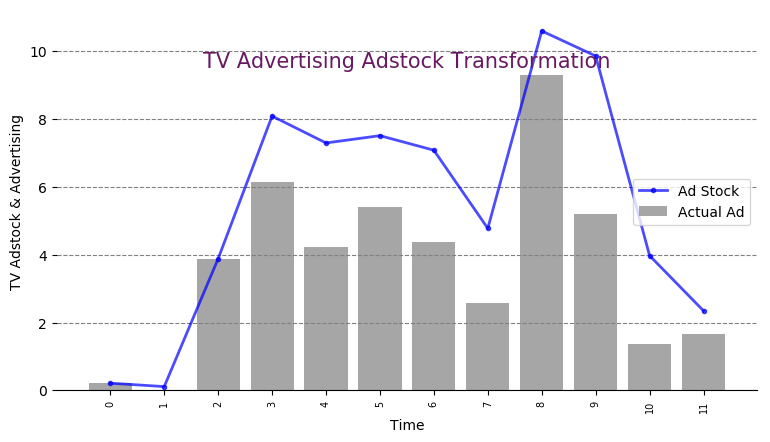

In [3198]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
bar = ax.bar(np.arange(len(Media_Investment['TV'])), Media_Investment['TV'], width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(Media_Investment['TV'])), Media_Investment['TV_ad_stock'], 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')

ax.annotate("TV Advertising Adstock Transformation", (np.mean(np.arange(len(Media_Investment['TV']))), 10),
            verticalalignment='top', horizontalalignment='center',
            fontsize=15, color='#681963')

ax.set_xlabel('Time')
ax.set_ylabel('TV Adstock & Advertising')
ax.set_xticks(np.arange(len(Media_Investment['TV'])))
ax.set_xticklabels(labels=np.arange(len(Media_Investment['TV'])), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

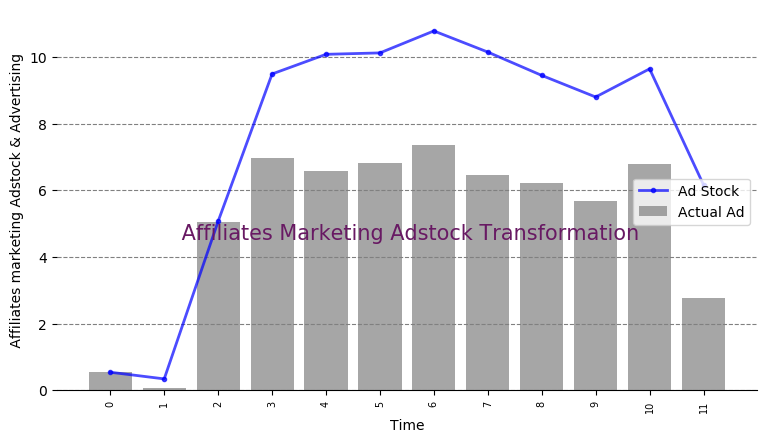

In [3199]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
bar = ax.bar(np.arange(len(Media_Investment['Affiliates'])), Media_Investment['Affiliates'], width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(Media_Investment['Affiliates'])), Media_Investment['Affiliates_ad_stock'], 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')

ax.annotate(" Affiliates Marketing Adstock Transformation", (np.mean(np.arange(len(Media_Investment['Affiliates']))), 5),
            verticalalignment='top', horizontalalignment='center',
            fontsize=15, color='#681963')

ax.set_xlabel('Time')
ax.set_ylabel(' Affiliates marketing Adstock & Advertising')
ax.set_xticks(np.arange(len(Media_Investment['Affiliates'])))
ax.set_xticklabels(labels=np.arange(len(Media_Investment['Affiliates'])), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

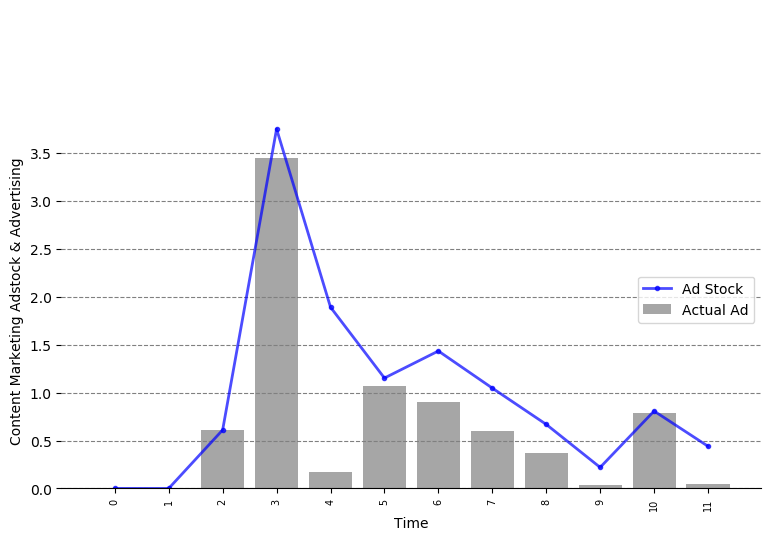

In [3200]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
bar = ax.bar(np.arange(len(Media_Investment['Content Marketing'])), Media_Investment['Content Marketing'], width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(Media_Investment['Content Marketing'])), Media_Investment['Content Marketing_ad_stock'], 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')

ax.annotate("Content Marketing Adstock Transformation", (np.mean(np.arange(len(Media_Investment['Content Marketing']))), 5),
            verticalalignment='top', horizontalalignment='center',
            fontsize=15, color='#681963')

ax.set_xlabel('Time')
ax.set_ylabel('Content Marketing Adstock & Advertising')
ax.set_xticks(np.arange(len(Media_Investment['Content Marketing'])))
ax.set_xticklabels(labels=np.arange(len(Media_Investment['Content Marketing'])), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

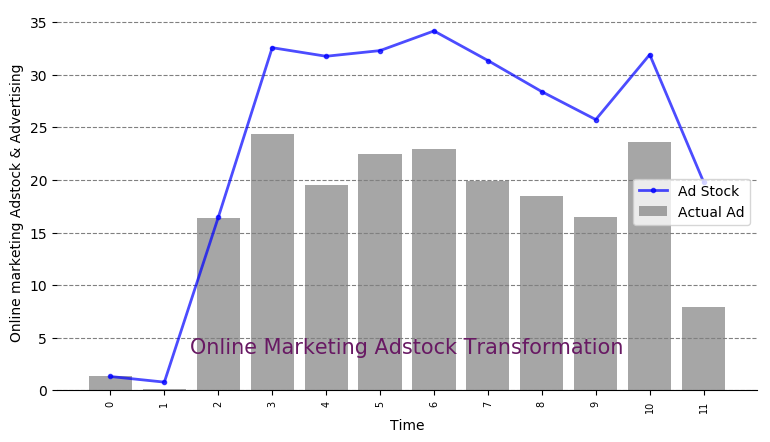

In [3201]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
bar = ax.bar(np.arange(len(Media_Investment['Online marketing'])), Media_Investment['Online marketing'], width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(Media_Investment['Online marketing'])), Media_Investment['Online marketing_ad_stock'], 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')

ax.annotate("Online Marketing Adstock Transformation", (np.mean(np.arange(len(Media_Investment['Online marketing']))), 5),
            verticalalignment='top', horizontalalignment='center',
            fontsize=15, color='#681963')

ax.set_xlabel('Time')
ax.set_ylabel('Online marketing Adstock & Advertising')
ax.set_xticks(np.arange(len(Media_Investment['Online marketing'])))
ax.set_xticklabels(labels=np.arange(len(Media_Investment['Online marketing'])), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

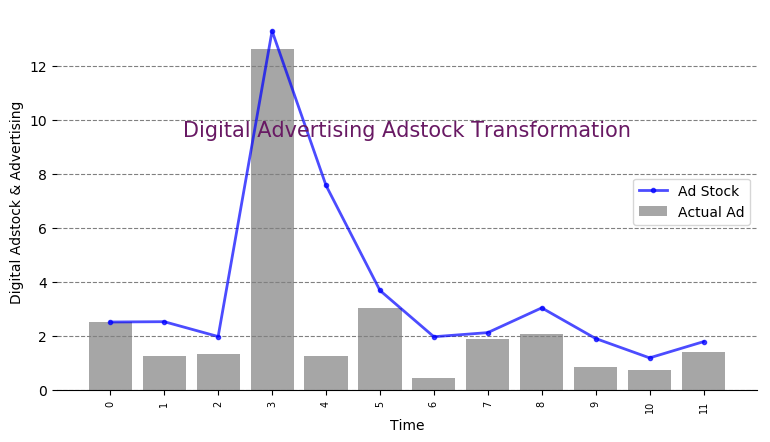

In [3202]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
bar = ax.bar(np.arange(len(Media_Investment['Digital'])), Media_Investment['Digital'], width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(Media_Investment['Digital'])), Media_Investment['Digital_ad_stock'], 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')

ax.annotate("Digital Advertising Adstock Transformation", (np.mean(np.arange(len(Media_Investment['Digital']))), 10),
            verticalalignment='top', horizontalalignment='center',
            fontsize=15, color='#681963')

ax.set_xlabel('Time')
ax.set_ylabel('Digital Adstock & Advertising')
ax.set_xticks(np.arange(len(Media_Investment['Digital'])))
ax.set_xticklabels(labels=np.arange(len(Media_Investment['Digital'])), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

In [3203]:
week.shape

(480619, 12)

In [3204]:
Media_Investment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 15 columns):
Year                          12 non-null int32
Month                         12 non-null int32
Total Investment              12 non-null float64
TV                            12 non-null float64
Digital                       12 non-null float64
Sponsorship                   12 non-null float64
Content Marketing             12 non-null float64
Online marketing              12 non-null float64
Affiliates                    12 non-null float64
SEM                           12 non-null float64
TV_ad_stock                   12 non-null float64
Affiliates_ad_stock           12 non-null float64
Content Marketing_ad_stock    12 non-null float64
Digital_ad_stock              12 non-null float64
Online marketing_ad_stock     12 non-null float64
dtypes: float64(13), int32(2)
memory usage: 1.7 KB


In [3205]:

#Media_Investment=pd.merge(week, Media_Investment, on=['Month'], how='outer')
# Deriving media spend per day
Media_Investment['Total Investment']=(Media_Investment['Total Investment'] / week['Daysinmonth'])
Media_Investment['TV']=(Media_Investment['TV'] /week['Daysinmonth'])
Media_Investment['Digital']=(Media_Investment['Digital'] /week['Daysinmonth'])
Media_Investment['Sponsorship']=(Media_Investment['Sponsorship'] /week['Daysinmonth'])
Media_Investment['Content Marketing']=(Media_Investment['Content Marketing'] /week['Daysinmonth'])
Media_Investment['Online marketing']=(Media_Investment['Online marketing'] /week['Daysinmonth'])
Media_Investment['Affiliates']=(Media_Investment['Affiliates'] /week['Daysinmonth'])
Media_Investment['SEM']=(Media_Investment['SEM'] /week['Daysinmonth'])



Media_Investment['TV_ad_stock']=(Media_Investment['TV'] /week['Daysinmonth'])
Media_Investment['Affiliates_ad_stock']=(Media_Investment['Affiliates'] /week['Daysinmonth'])
Media_Investment['Content Marketing_ad_stock']=(Media_Investment['Content Marketing'] /week['Daysinmonth'])
Media_Investment['Digital_ad_stock']=(Media_Investment['Digital'] /week['Daysinmonth'])
Media_Investment['Online marketing_ad_stock']=(Media_Investment['Online marketing'] /week['Daysinmonth'])


In [3206]:
Media_Investment.head()

Year  Month  Total Investment        TV   Digital  Sponsorship  \
0  2015      7          0.550380  0.006946  0.081710     0.239170   
1  2015      8          0.163365  0.000208  0.041228     0.034301   
2  2015      9          3.104980  0.125145  0.043759     2.025408   
3  2015     10          5.488913  0.198216  0.407177     2.731372   
4  2015     11          1.652136  0.136149  0.041144     0.457165   

   Content Marketing  Online marketing  Affiliates       SEM  TV_ad_stock  \
0       3.009347e-05          0.042815    0.017653  0.162055     0.000224   
1       2.040365e-07          0.004169    0.002377  0.081082     0.000007   
2       1.968684e-02          0.528387    0.162525  0.200069     0.004037   
3       1.110992e-01          0.786186    0.224958  1.029904     0.006394   
4       5.439780e-03          0.631019    0.212767  0.168453     0.004392   

   Affiliates_ad_stock  Content Marketing_ad_stock  Digital_ad_stock  \
0             0.000569                9.707571e-07          0.002636   
1             0.000077                6.581821e-09          0.001330   
2             0.005243                6.350594e-04          0.001412   
3             0.007257                3.583845e-03          0.013135   
4             0.006863                1.754768e-04          0.001327   

   Online marketing_ad_stock  
0                   0.001381  
1                   0.000134  
2                   0.017045  
3                   0.025361  
4                   0.020355

In [3207]:
Media_Investment.shape

(12, 15)

In [3208]:
Media_Investment=pd.merge(week, Media_Investment, on=['Month'], how='outer')

In [3209]:
Media_Investment.shape

(480619, 26)

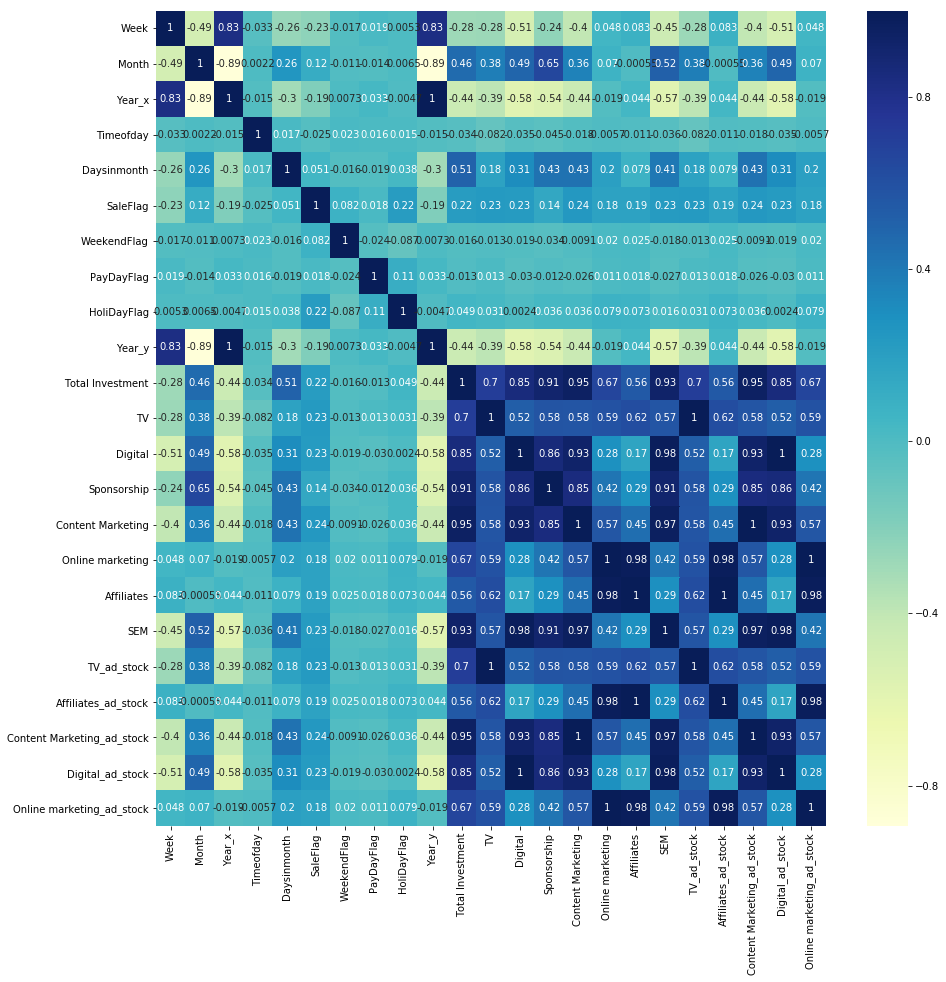

In [3210]:
plt.figure(figsize = (15, 15))
sns.heatmap(Media_Investment.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [3211]:

#code for removing co related variables:
# Create correlation matrix
corr_matrix = Media_Investment.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
Media_Investment.drop(to_drop, axis=1, inplace=True)

In [3212]:
Media_Investment.shape

(480619, 16)

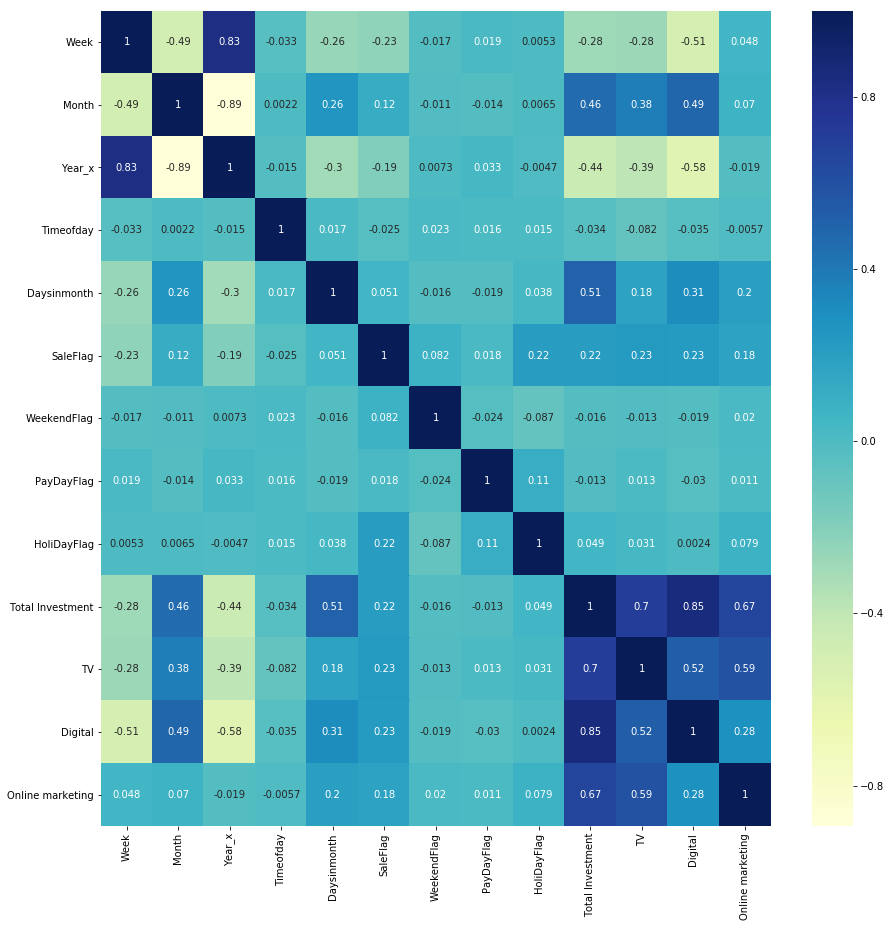

In [3213]:
plt.figure(figsize = (15, 15))
sns.heatmap(Media_Investment.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3214]:
Media_Investment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480619 entries, 0 to 480618
Data columns (total 16 columns):
OrderDate           480619 non-null datetime64[ns]
Week                480619 non-null int64
Date                480619 non-null datetime64[ns]
Month               480619 non-null int64
Year_x              480619 non-null int64
Day                 480619 non-null object
Timeofday           480619 non-null int64
Daysinmonth         480619 non-null int64
SaleFlag            480619 non-null int64
WeekendFlag         480619 non-null int64
PayDayFlag          480619 non-null int64
HoliDayFlag         480619 non-null int64
Total Investment    429112 non-null float64
TV                  429112 non-null float64
Digital             429112 non-null float64
Online marketing    429112 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(9), object(1)
memory usage: 62.3+ MB


In [3215]:
NPS_Score.transpose=pd.DataFrame(NPS_Score.T)
NPS_Score.transpose
df_NPS=NPS_Score.transpose.rename(columns=NPS_Score.transpose.iloc[0]).drop(NPS_Score.transpose.index[0])

In [3216]:
df_monthly_nps=pd.DataFrame({'index':[1,2,3,4,5,6,7,8,9,10,11,12],
                            'Year' : [2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016],
                            'Month' :[7,8,9,10,11,12,1,2,3,4,5,6]})
df_monthly_nps

index  Year  Month
0       1  2015      7
1       2  2015      8
2       3  2015      9
3       4  2015     10
4       5  2015     11
5       6  2015     12
6       7  2016      1
7       8  2016      2
8       9  2016      3
9      10  2016      4
10     11  2016      5
11     12  2016      6

In [3217]:
colls=['NPS', 'Stock Index', 'index']
df_NPS.reset_index()
df_NPS['index']=range(1,13)
df_NPS[colls]=df_NPS[colls].apply(pd.to_numeric)
df_NPS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, July'15 to June'16
Data columns (total 3 columns):
NPS            12 non-null float64
Stock Index    12 non-null float64
index          12 non-null int32
dtypes: float64(2), int32(1)
memory usage: 336.0+ bytes


In [3218]:
df_monthlynps=pd.merge(df_monthly_nps,df_NPS,how='inner', on='index')

In [3219]:
df_monthlynps

index  Year  Month        NPS  Stock Index
0       1  2015      7  54.599588       1177.0
1       2  2015      8  59.987101       1206.0
2       3  2015      9  46.925419       1101.0
3       4  2015     10  44.398389       1210.0
4       5  2015     11  47.000000       1233.0
5       6  2015     12  45.800000       1038.0
6       7  2016      1  47.093031       1052.0
7       8  2016      2  50.327406       1222.0
8       9  2016      3  49.020550       1015.0
9      10  2016      4  51.827605       1242.0
10     11  2016      5  47.306951       1228.0
11     12  2016      6  50.516687       1194.0

In [3220]:
#week=pd.merge(week, Media_Investment, on=['Year','Month'], how='outer')

In [3221]:
week=pd.merge(week, df_monthlynps, on=['Year','Month'], how='outer')

In [3222]:
week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480619 entries, 0 to 480618
Data columns (total 15 columns):
OrderDate      480619 non-null datetime64[ns]
Week           480619 non-null int64
Date           480619 non-null datetime64[ns]
Month          480619 non-null int64
Year           480619 non-null int64
Day            480619 non-null object
Timeofday      480619 non-null int64
Daysinmonth    480619 non-null int64
SaleFlag       480619 non-null int64
WeekendFlag    480619 non-null int64
PayDayFlag     480619 non-null int64
HoliDayFlag    480619 non-null int64
index          480619 non-null int64
NPS            480619 non-null float64
Stock Index    480619 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(10), object(1)
memory usage: 58.7+ MB


In [3223]:
# Summarise Media Spend , Holidays,Special Sale Days,PayDays at one level
Week_Spend = pd.pivot_table(Media_Investment, index=['Week'],values=['Total Investment','TV','Online marketing',
'SaleFlag','WeekendFlag','PayDayFlag','HoliDayFlag'],aggfunc=[np.sum]).reset_index()
Week_Spend.columns = ['Week','HoliDays','OnlineMarketing','PayDays','SaleDays','TV','TotalInvestment','WkEnds']   


In [3224]:
WeekSpendPT2 = pd.pivot_table(week, index=['Week'],values=['NPS'],aggfunc=[np.mean]).reset_index()
WeekSpendPT2.columns = ['Week','NPS']

In [3225]:
Week_Spend=pd.merge(Week_Spend, WeekSpendPT2, on=['Week'], how='outer')
Week_Spend.head(5)

Week  HoliDays  OnlineMarketing  PayDays  SaleDays         TV  \
0    27         6         4.195910        6         0   0.680721   
1    28         0       347.104499        0         0  56.312321   
2    29         0       361.533291        0      2333  58.653169   
3    30         0       341.923835        0         0  55.471839   
4    31         0       236.439181        1         0  38.357184   

   TotalInvestment  WkEnds        NPS  
0        53.937226      16  54.599588  
1      4461.929468    2363  54.599588  
2      4647.407479    2333  54.599588  
3      4395.333506    2290  54.599588  
4      3039.687642       3  54.602513

In [3226]:
# Joining Weekly Spend to transactional Week aggregation data
# WeekEnds is constant for a week hence may not be useful hence dropping
Week_Spend = Week_Spend.drop(['WkEnds'], axis=1)
TransSC=pd.merge(TransSC, Week_Spend, on=['Week'], how='outer')
TransSC.head(5)

ProductSubCategory  Week  Units  discountprice  cumulative_movingavg_gmv  \
0    CameraAccessory    27    1.0              0                         1   
1    GamingAccessory    27    0.0              0                         0   
2          HomeAudio    27    0.0              5                         0   
3    CameraAccessory    28  212.0              0                        46   
4    GamingAccessory    28    0.0              0                         0   

   cumulative_movingavg_discountprice  Display_Price_ending_with_99  \
0                                 2.0                           5.0   
1                                 0.0                           0.0   
2                                 0.0                           0.0   
3                               340.0                         709.0   
4                                 0.0                           0.0   

   Binoculars  BoomBox  CameraAccessory  ...  ProcurementSLA        GMV  \
0         2.0        0                0  ...        2.500000    18196.0   
1         0.0        0                0  ...        2.812500    39520.0   
2         0.0        0                0  ...        2.868421   101786.0   
3       223.0       18                0  ...        7.077426  4062209.0   
4         0.0        0                0  ...        5.332678  2751559.0   

   OnlinePayRate  HoliDays  OnlineMarketing  PayDays  SaleDays         TV  \
0     100.000000         6         4.195910        6         0   0.680721   
1     100.000000         6         4.195910        6         0   0.680721   
2      97.368421         6         4.195910        6         0   0.680721   
3      33.551273         0       347.104499        0         0  56.312321   
4      26.450344         0       347.104499        0         0  56.312321   

   TotalInvestment        NPS  
0        53.937226  54.599588  
1        53.937226  54.599588  
2        53.937226  54.599588  
3      4461.929468  54.599588  
4      4461.929468  54.599588  

[5 rows x 68 columns]

In [3227]:
TransSC.shape

(146, 68)

In [3228]:
TransSC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 68 columns):
ProductSubCategory                    146 non-null object
Week                                  146 non-null int64
Units                                 146 non-null float64
discountprice                         146 non-null uint8
cumulative_movingavg_gmv              146 non-null uint8
cumulative_movingavg_discountprice    146 non-null float64
Display_Price_ending_with_99          146 non-null float64
Binoculars                            146 non-null float64
BoomBox                               146 non-null uint8
CameraAccessory                       146 non-null uint8
CameraBag                             146 non-null uint8
CameraBattery                         146 non-null uint8
CameraBatteryCharger                  146 non-null uint8
CameraBatteryGrip                     146 non-null uint8
CameraEyeCup                          146 non-null float64
CameraFilmRolls              

### Climate data

In [3229]:
# Reading climate 2015 data file
ontario2015 = pd.read_csv('ONTARIO-2015.csv',skiprows=24)
ontario2015.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2015-01-01  2015      1    1            †            0.0           NaN   
1  2015-01-02  2015      1    2            †            3.0           NaN   
2  2015-01-03  2015      1    3            †            2.5           NaN   
3  2015-01-04  2015      1    4            †            2.5           NaN   
4  2015-01-05  2015      1    5            †          -10.0           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Total Snow (cm)  \
0           -8.5           NaN            -4.3  ...             0.0   
1           -3.0           NaN             0.0  ...             0.0   
2           -4.0           NaN            -0.8  ...             0.0   
3            0.0           NaN             1.3  ...             1.0   
4          -13.5           NaN           -11.8  ...             3.0   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               0.0                NaN               0.0   
1              NaN               0.0                NaN               0.0   
2              NaN              24.0                NaN               0.0   
3              NaN               1.0                NaN               0.0   
4              NaN               3.0                NaN               1.0   

   Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0                NaN                       NaN                   NaN   
1                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
3                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   

  Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 27 columns]

In [3230]:
ontario2015.shape

(365, 27)

In [3231]:
ontario2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null object
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Snow Flag 

In [3232]:
# deleting all columns which have all items as Null
ontario2015 = ontario2015.dropna(axis=1, how = 'all')


In [3233]:
ontario2015.shape

(365, 23)

In [3234]:
ontario2015=ontario2015.rename({"Date/Time":"DateTime","Data Quality":"DataQuality","Max Temp (°C)":"MaxTemp","Max Temp Flag":"MaxTempFlag","Min Temp (°C)":"MinTemp","Min Temp Flag":"MinTempFlag"},axis=1)
ontario2015=ontario2015.rename({"Mean Temp (°C)":"MeanTemp","Mean Temp Flag":"MeanTempFlag","Heat Deg Days (°C)":"HeatDegDays","Heat Deg Days Flag":"HeatDegDaysFlag","Cool Deg Days (°C)":"CoolDegDays","Cool Deg Days Flag":"CoolDegDaysFlag","Total Rain (mm)":"TotalRain","Total Rain Flag":"TotalRainFlag"},axis=1)
ontario2015=ontario2015.rename({"Total Snow (cm)":"TotalSnow","Total Snow Flag":"TotalSnowFlag","Total Precip (mm)":"TotalPrecip","Total Precip Flag":"TotalPrecipFlag","Snow on Grnd (cm)":"SnowonGrnd","Snow on Grnd Flag":"SnowonGrndFlag"},axis=1)

In [3235]:
ontario2015['DateTime'] = pd.to_datetime(ontario2015['DateTime'])

In [3236]:
# Write your code for column-wise null percentages here
round(100*(ontario2015.isnull().sum()/len(ontario2015.index)),2)

DateTime            0.00
Year                0.00
Month               0.00
Day                 0.00
DataQuality        37.26
MaxTemp            40.82
MaxTempFlag        96.44
MinTemp            47.95
MinTempFlag        89.32
MeanTemp           47.95
MeanTempFlag       89.32
HeatDegDays        47.95
HeatDegDaysFlag    89.32
CoolDegDays        47.95
CoolDegDaysFlag    89.32
TotalRain          37.26
TotalRainFlag      98.08
TotalSnow          37.26
TotalSnowFlag      97.53
TotalPrecip        37.26
TotalPrecipFlag    96.71
SnowonGrnd         37.26
SnowonGrndFlag     99.45
dtype: float64

In [3237]:
ontario2015 = ontario2015.drop('TotalRainFlag',axis=1)
ontario2015 = ontario2015.drop('TotalSnowFlag',axis=1)
ontario2015 = ontario2015.drop('TotalPrecipFlag',axis=1)
ontario2015 = ontario2015.drop('SnowonGrndFlag',axis=1)
ontario2015 = ontario2015.drop('MaxTempFlag',axis=1)
ontario2015 = ontario2015.drop('MinTempFlag',axis=1)
ontario2015 = ontario2015.drop('MeanTempFlag',axis=1)
ontario2015 = ontario2015.drop('HeatDegDaysFlag',axis=1)
ontario2015 = ontario2015.drop('CoolDegDaysFlag',axis=1)

In [3238]:
# Write your code for column-wise null percentages here
round(100*(ontario2015.isnull().sum()/len(ontario2015.index)),2)

DateTime        0.00
Year            0.00
Month           0.00
Day             0.00
DataQuality    37.26
MaxTemp        40.82
MinTemp        47.95
MeanTemp       47.95
HeatDegDays    47.95
CoolDegDays    47.95
TotalRain      37.26
TotalSnow      37.26
TotalPrecip    37.26
SnowonGrnd     37.26
dtype: float64

In [3239]:
ontario2015 = ontario2015[(ontario2015['Month'] >= 7)]

In [3240]:
ontario2015.shape

(184, 14)

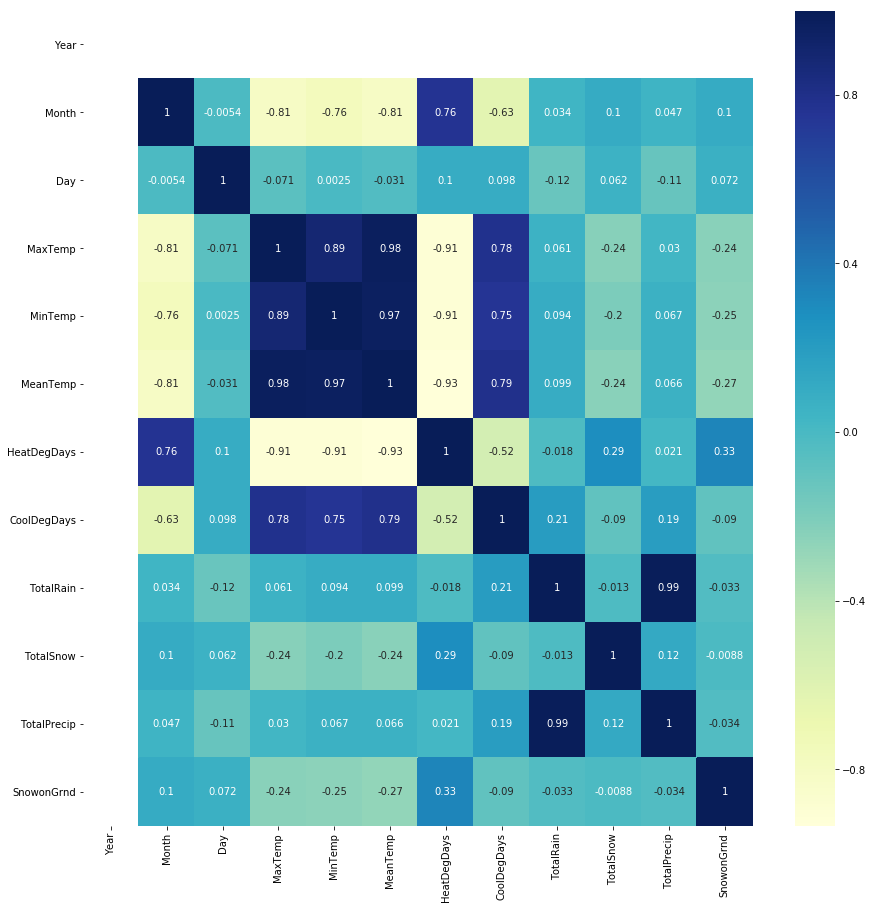

In [3241]:
plt.figure(figsize = (15,15))
sns.heatmap(ontario2015.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3242]:
#code for removing co related variables:
# Create correlation matrix
corr_matrix = ontario2015.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
ontario2015.drop(to_drop, axis=1, inplace=True)

In [3243]:
ontario2015.shape

(184, 11)

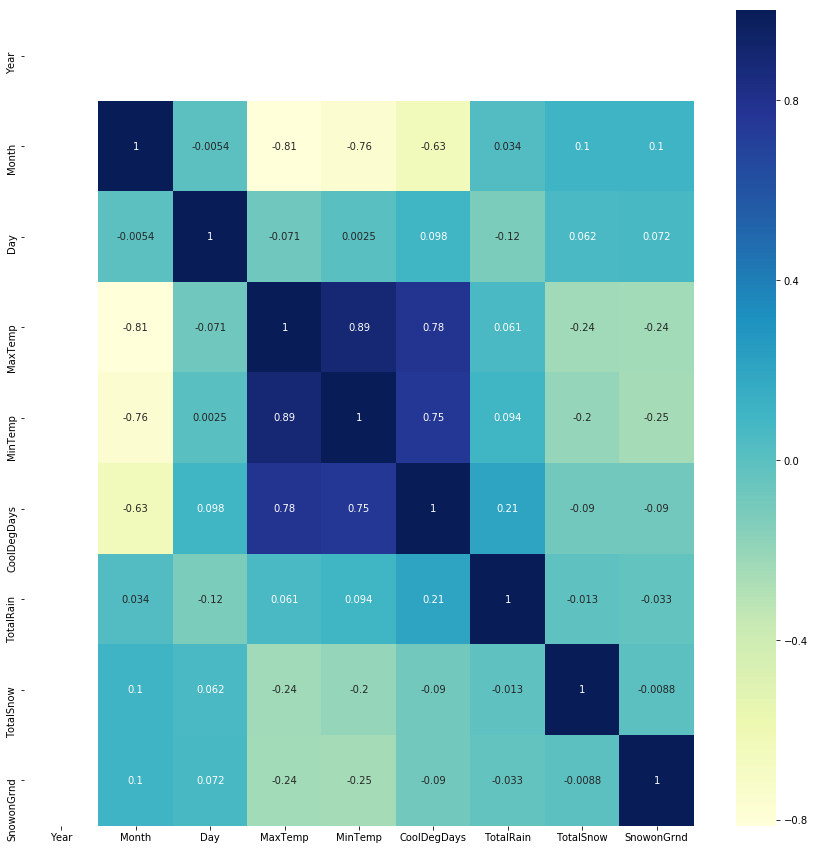

In [3244]:
plt.figure(figsize = (15,15))
sns.heatmap(ontario2015.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3245]:
# Reading climate 2016 data file
ontario2016 = pd.read_csv('ONTARIO-2016.csv',skiprows=24)
ontario2016.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0  2016-01-01  2016      1    1          NaN            NaN           NaN   
1  2016-01-02  2016      1    2          NaN            NaN           NaN   
2  2016-01-03  2016      1    3          NaN            NaN           NaN   
3  2016-01-04  2016      1    4          NaN            NaN           NaN   
4  2016-01-05  2016      1    5          NaN            NaN           NaN   

   Min Temp (°C) Min Temp Flag  Mean Temp (°C)  ... Total Snow (cm)  \
0            NaN           NaN             NaN  ...             NaN   
1            NaN           NaN             NaN  ...             NaN   
2            NaN           NaN             NaN  ...             NaN   
3            NaN           NaN             NaN  ...             NaN   
4            NaN           NaN             NaN  ...             NaN   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN               NaN                NaN               NaN   
1              NaN               NaN                NaN               NaN   
2              NaN               NaN                NaN               NaN   
3              NaN               NaN                NaN               NaN   
4              NaN               NaN                NaN               NaN   

   Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0                NaN                       NaN                   NaN   
1                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
3                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   

  Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 27 columns]

In [3246]:
# deleting all columns which have all items as Null

ontario2016 = ontario2016.dropna(axis=1, how = 'all')

In [3247]:
ontario2016.shape

(366, 23)

In [3248]:
ontario2016=ontario2016.rename({"Date/Time":"DateTime","Data Quality":"DataQuality","Max Temp (°C)":"MaxTemp","Max Temp Flag":"MaxTempFlag","Min Temp (°C)":"MinTemp","Min Temp Flag":"MinTempFlag"},axis=1)
ontario2016=ontario2016.rename({"Mean Temp (°C)":"MeanTemp","Mean Temp Flag":"MeanTempFlag","Heat Deg Days (°C)":"HeatDegDays","Heat Deg Days Flag":"HeatDegDaysFlag","Cool Deg Days (°C)":"CoolDegDays","Cool Deg Days Flag":"CoolDegDaysFlag","Total Rain (mm)":"TotalRain","Total Rain Flag":"TotalRainFlag"},axis=1)
ontario2016=ontario2016.rename({"Total Snow (cm)":"TotalSnow","Total Snow Flag":"TotalSnowFlag","Total Precip (mm)":"TotalPrecip","Total Precip Flag":"TotalPrecipFlag","Snow on Grnd (cm)":"SnowonGrnd","Snow on Grnd Flag":"SnowonGrndFlag"},axis=1)

In [3249]:
ontario2016['DateTime'] = pd.to_datetime(ontario2016['DateTime'])

In [3250]:
# Write your code for column-wise null percentages here
round(100*(ontario2016.isnull().sum()/len(ontario2016.index)),2)

DateTime            0.00
Year                0.00
Month               0.00
Day                 0.00
DataQuality        37.98
MaxTemp            38.25
MaxTempFlag        99.73
MinTemp            40.16
MinTempFlag        97.81
MeanTemp           40.16
MeanTempFlag       97.81
HeatDegDays        40.16
HeatDegDaysFlag    97.81
CoolDegDays        40.16
CoolDegDaysFlag    97.81
TotalRain          37.98
TotalRainFlag      99.18
TotalSnow          37.98
TotalSnowFlag      98.09
TotalPrecip        37.98
TotalPrecipFlag    98.09
SnowonGrnd         37.98
SnowonGrndFlag     98.36
dtype: float64

In [3251]:
ontario2016 = ontario2016.drop('TotalRainFlag',axis=1)
ontario2016 = ontario2016.drop('TotalSnowFlag',axis=1)
ontario2016 = ontario2016.drop('TotalPrecipFlag',axis=1)
ontario2016 = ontario2016.drop('SnowonGrndFlag',axis=1)
ontario2016 = ontario2016.drop('MaxTempFlag',axis=1)
ontario2016 = ontario2016.drop('MinTempFlag',axis=1)
ontario2016 = ontario2016.drop('MeanTempFlag',axis=1)
ontario2016 = ontario2016.drop('HeatDegDaysFlag',axis=1)
ontario2016 = ontario2016.drop('CoolDegDaysFlag',axis=1)

In [3252]:
# Write your code for column-wise null percentages here
round(100*(ontario2016.isnull().sum()/len(ontario2016.index)),2)

DateTime        0.00
Year            0.00
Month           0.00
Day             0.00
DataQuality    37.98
MaxTemp        38.25
MinTemp        40.16
MeanTemp       40.16
HeatDegDays    40.16
CoolDegDays    40.16
TotalRain      37.98
TotalSnow      37.98
TotalPrecip    37.98
SnowonGrnd     37.98
dtype: float64

In [3253]:
ontario2016 = ontario2016[(ontario2016['Month'] <= 6)]

In [3254]:
ontario2016.shape

(182, 14)

In [3255]:
ontario2016.shape

(182, 14)

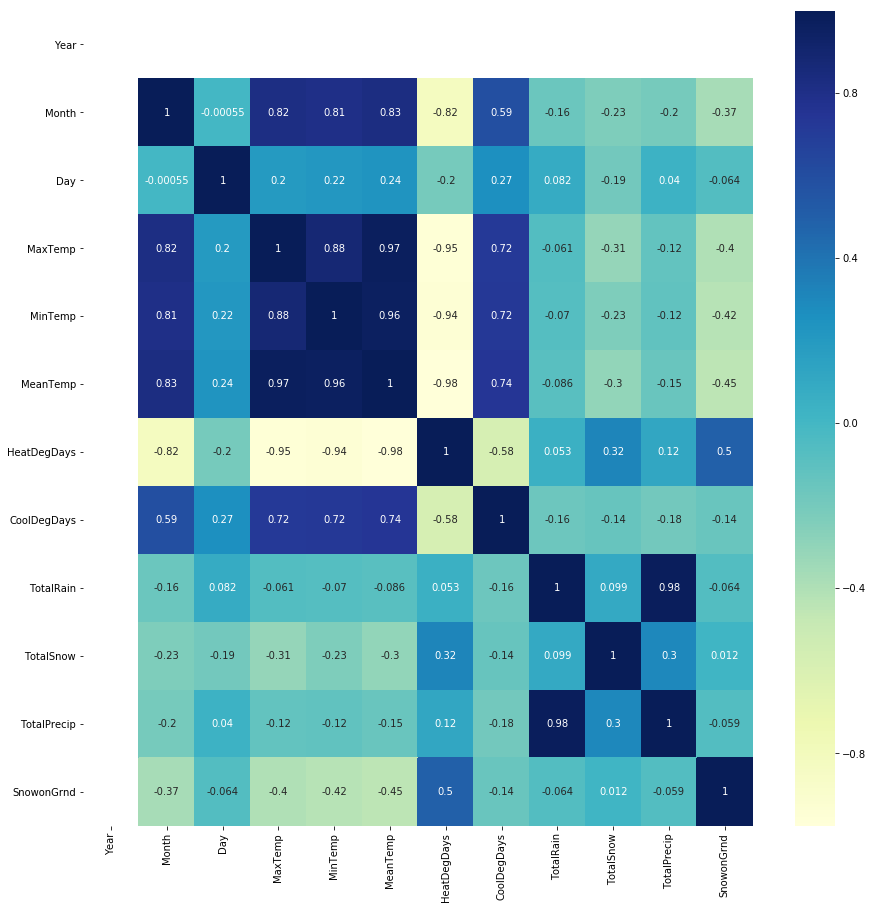

In [3256]:
plt.figure(figsize = (15, 15))
sns.heatmap(ontario2016.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3257]:
#code for removing co related variables:
# Create correlation matrix
corr_matrix = ontario2016.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
ontario2016.drop(to_drop, axis=1, inplace=True)

In [3258]:
ontario2016.shape

(182, 11)

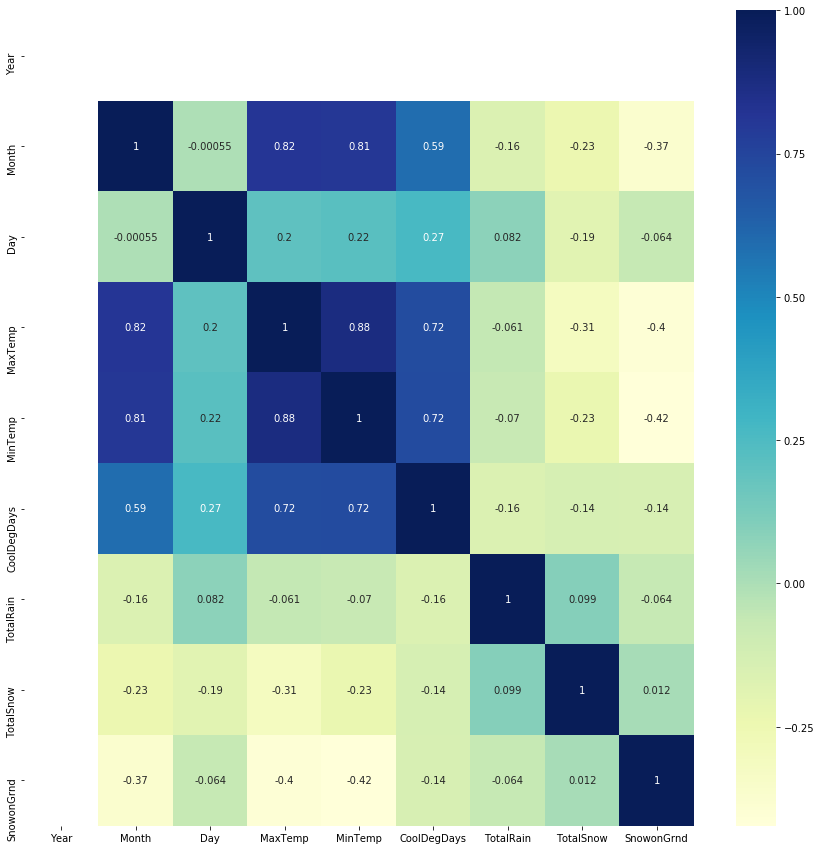

In [3259]:
plt.figure(figsize = (15, 15))
sns.heatmap(ontario2016.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3260]:
ontario2015_2016=ontario2015.append(ontario2016)

In [3261]:
ontario2015_2016.shape

(366, 11)

In [3262]:
ontario2015_2016['Week'] = np.where(ontario2015_2016['DateTime'] >= '2016-01-04', ontario2015_2016['DateTime'].dt.week + 53,
                        ontario2015_2016['DateTime'].dt.week)

In [3263]:
ontario2015_2016.shape

(366, 12)

In [3264]:
ontario2015_2016['DataQuality'].unique()

array(['†', nan], dtype=object)

In [3265]:
#Replacing GMV=0 with 1
ontario2015_2016['DataQuality']=ontario2015_2016['DataQuality'].replace('†',1)

In [3266]:
ontario2015_2016['DataQuality'].unique()

array([ 1., nan])

In [3267]:
ontario2015_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
DateTime       366 non-null datetime64[ns]
Year           366 non-null int64
Month          366 non-null int64
Day            366 non-null int64
DataQuality    215 non-null float64
MaxTemp        208 non-null float64
MinTemp        191 non-null float64
CoolDegDays    191 non-null float64
TotalRain      215 non-null float64
TotalSnow      215 non-null float64
SnowonGrnd     215 non-null float64
Week           366 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 37.2 KB


In [3268]:
# Write your code for column-wise null percentages here
round(100*(ontario2015_2016.isnull().sum()/len(ontario2015_2016.index)),2)

DateTime        0.00
Year            0.00
Month           0.00
Day             0.00
DataQuality    41.26
MaxTemp        43.17
MinTemp        47.81
CoolDegDays    47.81
TotalRain      41.26
TotalSnow      41.26
SnowonGrnd     41.26
Week            0.00
dtype: float64

In [3269]:
ontario2015_2016.fillna(0, inplace=True)

In [3270]:
# Write your code for column-wise null percentages here
round(100*(ontario2015_2016.isnull().sum()/len(ontario2015_2016.index)),2)

DateTime       0.0
Year           0.0
Month          0.0
Day            0.0
DataQuality    0.0
MaxTemp        0.0
MinTemp        0.0
CoolDegDays    0.0
TotalRain      0.0
TotalSnow      0.0
SnowonGrnd     0.0
Week           0.0
dtype: float64

In [3271]:
ontario2015_2016.describe()

Year       Month         Day  DataQuality     MaxTemp  \
count   366.000000  366.000000  366.000000   366.000000  366.000000   
mean   2015.497268    6.513661   15.756831     0.587432   10.898907   
std       0.500677    3.455958    8.823592     0.492970   12.064866   
min    2015.000000    1.000000    1.000000     0.000000   -8.500000   
25%    2015.000000    4.000000    8.000000     0.000000    0.000000   
50%    2015.000000    7.000000   16.000000     1.000000    6.500000   
75%    2016.000000    9.750000   23.000000     1.000000   22.500000   
max    2016.000000   12.000000   31.000000     1.000000   35.000000   

          MinTemp  CoolDegDays   TotalRain   TotalSnow  SnowonGrnd        Week  
count  366.000000   366.000000  366.000000  366.000000  366.000000  366.000000  
mean     4.538251     1.019399    1.517760    0.120219    0.169399   52.928962  
std      7.671324     2.252483    5.274372    0.872707    1.155685   15.118903  
min    -18.000000     0.000000    0.000000    0.000000    0.000000   27.000000  
25%      0.000000     0.000000    0.000000    0.000000    0.000000   40.000000  
50%      0.000000     0.000000    0.000000    0.000000    0.000000   53.000000  
75%     11.000000     0.000000    0.000000    0.000000    0.000000   66.000000  
max     22.000000     9.500000   57.200000   10.000000   12.000000   79.000000

In [3272]:
ontario2015_2016.head()

DateTime  Year  Month  Day  DataQuality  MaxTemp  MinTemp  CoolDegDays  \
181 2015-07-01  2015      7    1          1.0     24.5     17.0          2.8   
182 2015-07-02  2015      7    2          1.0     24.0     14.0          1.0   
183 2015-07-03  2015      7    3          1.0     25.0     10.0          0.0   
184 2015-07-04  2015      7    4          1.0     26.0     11.0          0.5   
185 2015-07-05  2015      7    5          1.0     28.0     14.0          3.0   

     TotalRain  TotalSnow  SnowonGrnd  Week  
181        0.0        0.0         0.0    27  
182        0.0        0.0         0.0    27  
183        0.0        0.0         0.0    27  
184        0.0        0.0         0.0    27  
185        0.0        0.0         0.0    27

In [3273]:
TransSC_climate=pd.merge(TransSC,ontario2015_2016, on=['Week'], how='inner')
TransSC_climate.head(5)

ProductSubCategory  Week  Units  discountprice  cumulative_movingavg_gmv  \
0    CameraAccessory    27    1.0              0                         1   
1    CameraAccessory    27    1.0              0                         1   
2    CameraAccessory    27    1.0              0                         1   
3    CameraAccessory    27    1.0              0                         1   
4    CameraAccessory    27    1.0              0                         1   

   cumulative_movingavg_discountprice  Display_Price_ending_with_99  \
0                                 2.0                           5.0   
1                                 2.0                           5.0   
2                                 2.0                           5.0   
3                                 2.0                           5.0   
4                                 2.0                           5.0   

   Binoculars  BoomBox  CameraAccessory  ...  Year  Month  Day  DataQuality  \
0         2.0        0                0  ...  2015      7    1          1.0   
1         2.0        0                0  ...  2015      7    2          1.0   
2         2.0        0                0  ...  2015      7    3          1.0   
3         2.0        0                0  ...  2015      7    4          1.0   
4         2.0        0                0  ...  2015      7    5          1.0   

   MaxTemp  MinTemp  CoolDegDays  TotalRain  TotalSnow  SnowonGrnd  
0     24.5     17.0          2.8        0.0        0.0         0.0  
1     24.0     14.0          1.0        0.0        0.0         0.0  
2     25.0     10.0          0.0        0.0        0.0         0.0  
3     26.0     11.0          0.5        0.0        0.0         0.0  
4     28.0     14.0          3.0        0.0        0.0         0.0  

[5 rows x 79 columns]

In [3274]:
TransSC_climate.shape

(1007, 79)

In [3275]:
TransSC_climate = TransSC_climate.drop('DateTime',axis=1)

In [3276]:
consumer_data1.shape

(480619, 77)

## Preparing Camera , Gaming and Home Audio Data frames for each model

In [3277]:
# Creating datadrame for Camera Accessory
Camera_df=consumer_data1.drop(consumer_data1[(consumer_data1.ProductSubCategory != 'CameraAccessory')].index)

WL_camera_full=TransSC_climate
print(WL_camera_full.shape)

WL_camera=WL_camera_full[WL_camera_full['ProductSubCategory']=='CameraAccessory']
print(WL_camera.shape)

CA_col = Camera_df['ProductVertical'].unique()
print(CA_col)

(1007, 78)
(338, 78)
['CameraTripod' 'Lens' 'CameraBag' 'Flash' 'CameraBattery'
 'CameraBatteryCharger' 'CameraRemoteControl' 'Binoculars' 'Filter'
 'Strap' 'CameraBatteryGrip' 'CameraAccessory' 'CameraFilmRolls'
 'CameraMount' 'ExtensionTube' 'Telescope' 'CameraEyeCup' 'CameraLEDLight'
 'CameraMicrophone' 'Softbox' 'CameraHousing' 'FlashShoeAdapter'
 'ReflectorUmbrella' 'Teleconverter']


In [3278]:
Camera_df.shape

(199988, 77)

In [3279]:
df_CA1 = WL_camera.copy()
for items in WL_camera.columns:
    if items not in CA_col and items in vertical.columns:
        del WL_camera[items]

In [3280]:
print(WL_camera.shape)

(338, 52)


In [3281]:
WL_camera.set_index("Week", inplace = True) 

In [3282]:
WL_camera = WL_camera.drop(['ProductSubCategory'], axis=1)
WL_camera.head()

Units  discountprice  cumulative_movingavg_gmv  \
Week                                                   
27      1.0              0                         1   
27      1.0              0                         1   
27      1.0              0                         1   
27      1.0              0                         1   
27      1.0              0                         1   

      cumulative_movingavg_discountprice  Display_Price_ending_with_99  \
Week                                                                     
27                                   2.0                           5.0   
27                                   2.0                           5.0   
27                                   2.0                           5.0   
27                                   2.0                           5.0   
27                                   2.0                           5.0   

      Binoculars  CameraAccessory  CameraBag  CameraBattery  \
Week                                                          
27           2.0                0          0              0   
27           2.0                0          0              0   
27           2.0                0          0              0   
27           2.0                0          0              0   
27           2.0                0          0              0   

      CameraBatteryCharger  ...  Year  Month  Day  DataQuality  MaxTemp  \
Week                        ...                                           
27                       0  ...  2015      7    1          1.0     24.5   
27                       0  ...  2015      7    2          1.0     24.0   
27                       0  ...  2015      7    3          1.0     25.0   
27                       0  ...  2015      7    4          1.0     26.0   
27                       0  ...  2015      7    5          1.0     28.0   

      MinTemp  CoolDegDays  TotalRain  TotalSnow  SnowonGrnd  
Week                                                          
27       17.0          2.8        0.0        0.0         0.0  
27       14.0          1.0        0.0        0.0         0.0  
27       10.0          0.0        0.0        0.0         0.0  
27       11.0          0.5        0.0        0.0         0.0  
27       14.0          3.0        0.0        0.0         0.0  

[5 rows x 50 columns]

In [3283]:
print(WL_camera.shape)

(338, 50)


In [3284]:
# Creating datadrame for Gaming Accessory
game_df=consumer_data1.drop(consumer_data1[(consumer_data1.ProductSubCategory != 'GamingAccessory')].index)

WL_Game_full=TransSC_climate
print(WL_Game_full.shape)

GA_col = game_df['ProductVertical'].unique()
print(GA_col)

WL_Game=WL_Game_full[WL_Game_full['ProductSubCategory']=='GamingAccessory']
print(WL_Game.shape)

df_GA1 = WL_Game.copy()
for items in WL_Game.columns:
    if items not in GA_col and items in vertical.columns:
        del WL_Game[items]

(1007, 78)
['GamePad' 'GamingAccessoryKit' 'GamingHeadset' 'GamingMemoryCard'
 'MotionController' 'GamingMouse' 'GamingAdapter' 'TVOutCableAccessory'
 'GamingGun' 'JoystickGamingWheel' 'GamingMousePad' 'GamingKeyboard'
 'GamingSpeaker' 'CoolingPad' 'GamingChargingStation' 'GameControlMount']
(345, 78)


In [3285]:
game_df.shape

(174795, 77)

In [3286]:
WL_Game.set_index("Week", inplace = True) 

In [3287]:
WL_Game.shape

(345, 43)

In [3288]:
WL_Game = WL_Game.drop(['ProductSubCategory'], axis=1)
WL_Game.head()

Units  discountprice  cumulative_movingavg_gmv  \
Week                                                   
27      0.0              0                         0   
27      0.0              0                         0   
27      0.0              0                         0   
27      0.0              0                         0   
27      0.0              0                         0   

      cumulative_movingavg_discountprice  Display_Price_ending_with_99  \
Week                                                                     
27                                   0.0                           0.0   
27                                   0.0                           0.0   
27                                   0.0                           0.0   
27                                   0.0                           0.0   
27                                   0.0                           0.0   

      CoolingPad  GameControlMount  GamePad  GamingAccessoryKit  \
Week                                                              
27             0                 0      4.0                 1.0   
27             0                 0      4.0                 1.0   
27             0                 0      4.0                 1.0   
27             0                 0      4.0                 1.0   
27             0                 0      4.0                 1.0   

      GamingAdapter  ...  Year  Month  Day  DataQuality  MaxTemp  MinTemp  \
Week                 ...                                                    
27              0.0  ...  2015      7    1          1.0     24.5     17.0   
27              0.0  ...  2015      7    2          1.0     24.0     14.0   
27              0.0  ...  2015      7    3          1.0     25.0     10.0   
27              0.0  ...  2015      7    4          1.0     26.0     11.0   
27              0.0  ...  2015      7    5          1.0     28.0     14.0   

      CoolDegDays  TotalRain  TotalSnow  SnowonGrnd  
Week                                                 
27            2.8        0.0        0.0         0.0  
27            1.0        0.0        0.0         0.0  
27            0.0        0.0        0.0         0.0  
27            0.5        0.0        0.0         0.0  
27            3.0        0.0        0.0         0.0  

[5 rows x 42 columns]

In [3289]:
# Creating datadrame for Home Audio
HomeAudio_df=consumer_data1.drop(consumer_data1[(consumer_data1.ProductSubCategory != 'HomeAudio')].index)

WL_Homeaudio_full=TransSC_climate
print(WL_Homeaudio_full.shape)

HA_col = HomeAudio_df['ProductVertical'].unique()
print(HA_col)

WL_Homeaudio=WL_Homeaudio_full[WL_Homeaudio_full['ProductSubCategory']=='HomeAudio']
print(WL_Homeaudio.shape)

df_CA1 = WL_Homeaudio.copy()
for items in WL_Homeaudio.columns:
    if items not in HA_col and items in vertical.columns:
        del WL_Homeaudio[items]

(1007, 78)
['HomeAudioSpeaker' 'Dock' 'BoomBox' 'DockingStation' 'DJController'
 'FMRadio' 'HiFiSystem' 'VoiceRecorder' 'KaraokePlayer' 'SlingBox'
 'SoundMixer']
(324, 78)


In [3290]:
WL_Homeaudio.set_index("Week", inplace = True) 

In [3291]:
WL_Homeaudio = WL_Homeaudio.drop(['ProductSubCategory'], axis=1)
WL_Homeaudio.head()

Units  discountprice  cumulative_movingavg_gmv  \
Week                                                   
27      0.0              5                         0   
27      0.0              5                         0   
27      0.0              5                         0   
27      0.0              5                         0   
27      0.0              5                         0   

      cumulative_movingavg_discountprice  Display_Price_ending_with_99  \
Week                                                                     
27                                   0.0                           0.0   
27                                   0.0                           0.0   
27                                   0.0                           0.0   
27                                   0.0                           0.0   
27                                   0.0                           0.0   

      BoomBox  DJController  Dock  DockingStation  FMRadio  ...  Year  Month  \
Week                                                        ...                
27          0           2.0   0.0             0.0        0  ...  2015      7   
27          0           2.0   0.0             0.0        0  ...  2015      7   
27          0           2.0   0.0             0.0        0  ...  2015      7   
27          0           2.0   0.0             0.0        0  ...  2015      7   
27          0           2.0   0.0             0.0        0  ...  2015      7   

      Day  DataQuality  MaxTemp  MinTemp  CoolDegDays  TotalRain  TotalSnow  \
Week                                                                          
27      1          1.0     24.5     17.0          2.8        0.0        0.0   
27      2          1.0     24.0     14.0          1.0        0.0        0.0   
27      3          1.0     25.0     10.0          0.0        0.0        0.0   
27      4          1.0     26.0     11.0          0.5        0.0        0.0   
27      5          1.0     28.0     14.0          3.0        0.0        0.0   

      SnowonGrnd  
Week              
27           0.0  
27           0.0  
27           0.0  
27           0.0  
27           0.0  

[5 rows x 38 columns]

In [3292]:
print(WL_camera.shape)
print(WL_Game.shape)
print(WL_Homeaudio.shape)

(338, 50)
(345, 42)
(324, 38)


In [3293]:
WL_camera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 27 to 79
Data columns (total 50 columns):
Units                                 338 non-null float64
discountprice                         338 non-null uint8
cumulative_movingavg_gmv              338 non-null uint8
cumulative_movingavg_discountprice    338 non-null float64
Display_Price_ending_with_99          338 non-null float64
Binoculars                            338 non-null float64
CameraAccessory                       338 non-null uint8
CameraBag                             338 non-null uint8
CameraBattery                         338 non-null uint8
CameraBatteryCharger                  338 non-null uint8
CameraBatteryGrip                     338 non-null uint8
CameraEyeCup                          338 non-null float64
CameraFilmRolls                       338 non-null float64
CameraHousing                         338 non-null uint8
CameraMicrophone                      338 non-null uint8
CameraMount                 

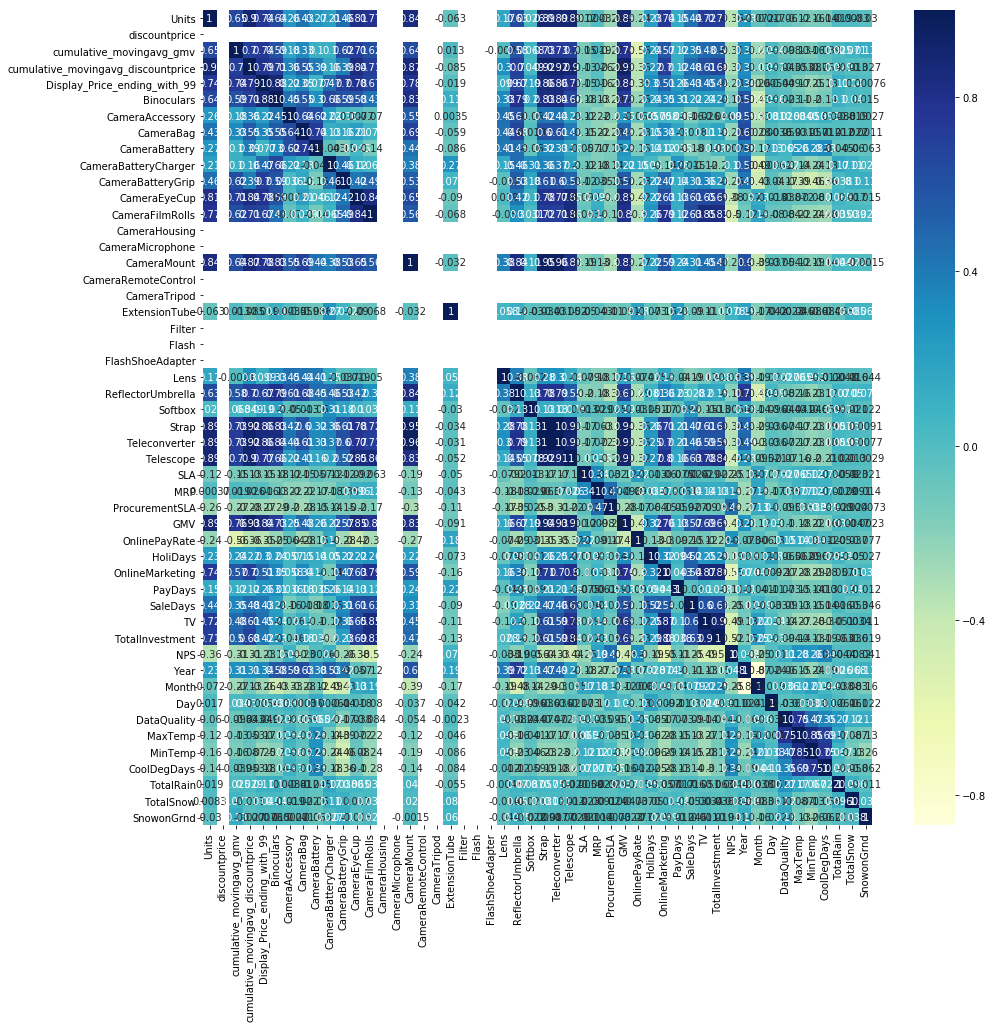

In [3294]:
plt.figure(figsize = (15, 15))
sns.heatmap(WL_camera.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [3295]:
## Creating data frame for Linear model, Koyck , DistributedLag , Exponential/Multiplicative Model
ConsumerElectronic_Linear_Camera = WL_camera
ConsumerElectronic_Linear_Game = WL_Game
ConsumerElectronic_Linear_HomeAudio = WL_Homeaudio


ConsumerElectronic_Koyck_Camera = WL_camera
ConsumerElectronic_Koyck_Game = WL_Game
ConsumerElectronic_Koyck_HomeAudio = WL_Homeaudio

ConsumerElectronic_DistributedLag_Camera = WL_camera
ConsumerElectronic_DistributedLag_Game = WL_Game
ConsumerElectronic_DistributedLag_HomeAudio = WL_Homeaudio



In [3296]:
print(ConsumerElectronic_Linear_Camera.shape)
print(ConsumerElectronic_Linear_Game.shape)
print(ConsumerElectronic_Linear_HomeAudio.shape)

print(ConsumerElectronic_Koyck_Camera.shape)
print(ConsumerElectronic_Koyck_Game.shape)
print(ConsumerElectronic_Koyck_HomeAudio.shape)

print(ConsumerElectronic_DistributedLag_Camera.shape)
print(ConsumerElectronic_DistributedLag_Game.shape)
print(ConsumerElectronic_DistributedLag_HomeAudio.shape)



(338, 50)
(345, 42)
(324, 38)
(338, 50)
(345, 42)
(324, 38)
(338, 50)
(345, 42)
(324, 38)


### EDA for each subcatgory

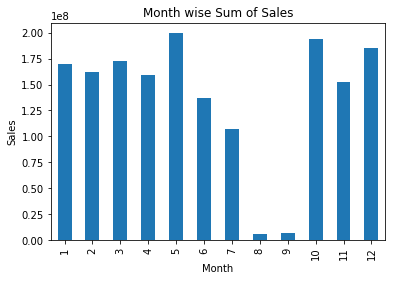

In [3297]:
var = WL_camera.groupby('Month').GMV.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales')
ax1.set_title("Month wise Sum of Sales")
var.plot(kind='bar')

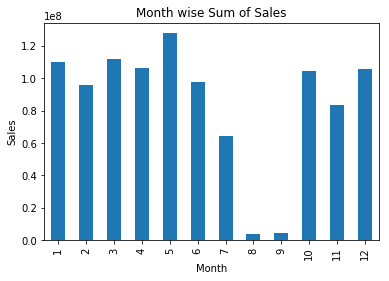

In [3298]:
var = WL_Game.groupby('Month').GMV.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales')
ax1.set_title("Month wise Sum of Sales")
var.plot(kind='bar')

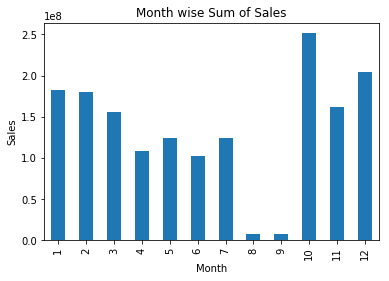

In [3299]:
var = WL_Homeaudio.groupby('Month').GMV.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales')
ax1.set_title("Month wise Sum of Sales")
var.plot(kind='bar')

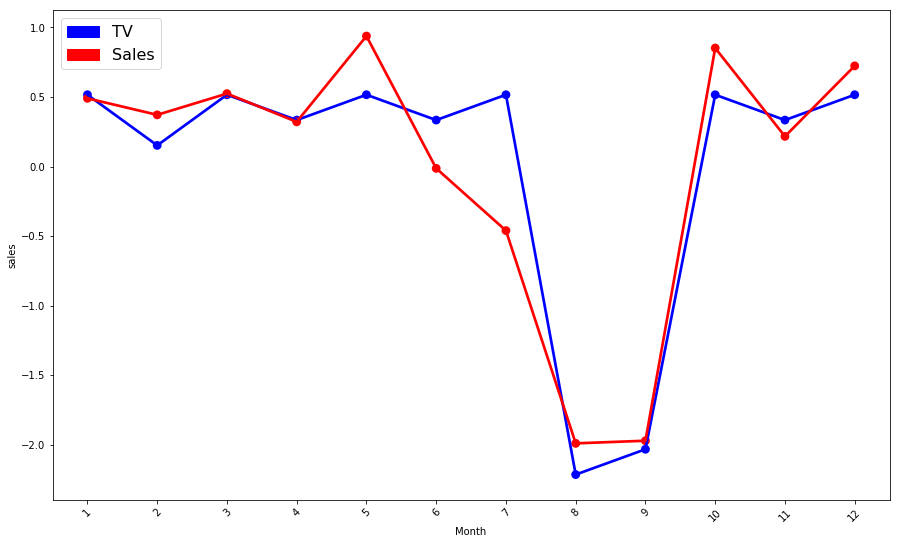

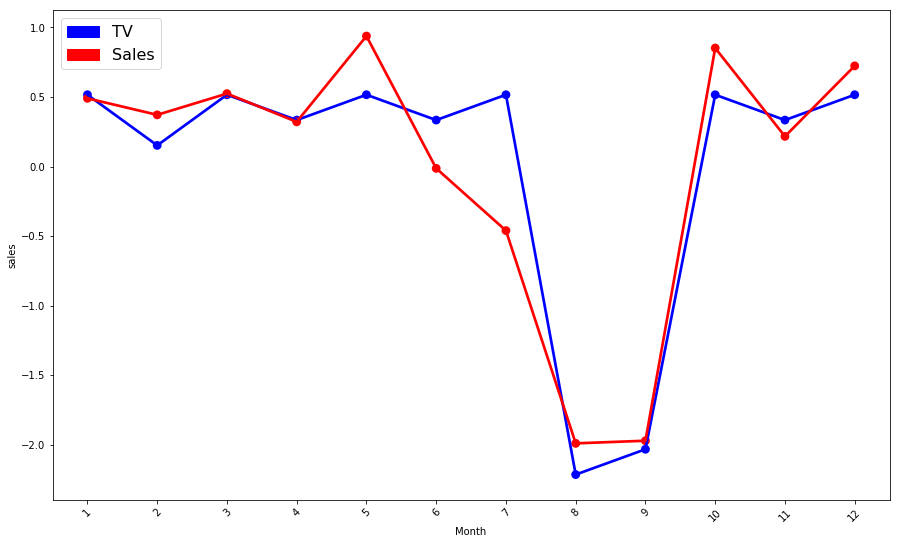

In [3300]:
import matplotlib.patches as mpatches
temp1 = WL_camera.groupby(['Month']).count()
temp1 = temp1.reset_index()

#Do the same, but sum the values to get the total values of everything by year.
temp2 = WL_camera.groupby(['Month']).sum()
temp2 = temp2.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['TV']= temp1['TV']
normalised_df['sales'] = temp2['GMV']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Month'] = temp1['Month']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.TV, color = 'blue', label='TV')
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.sales, color = 'red', label='Sales')

blue_patch = mpatches.Patch(color='blue', label='TV')
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);import matplotlib.patches as mpatches
temp1 = WL_camera.groupby(['Month']).count()
temp1 = temp1.reset_index()

#Do the same, but sum the values to get the total values of everything by year.
temp2 = WL_camera.groupby(['Month']).sum()
temp2 = temp2.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['TV']= temp1['TV']
normalised_df['sales'] = temp2['GMV']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Month'] = temp1['Month']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.TV, color = 'blue', label='TV')
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.sales, color = 'red', label='Sales')

blue_patch = mpatches.Patch(color='blue', label='TV')
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

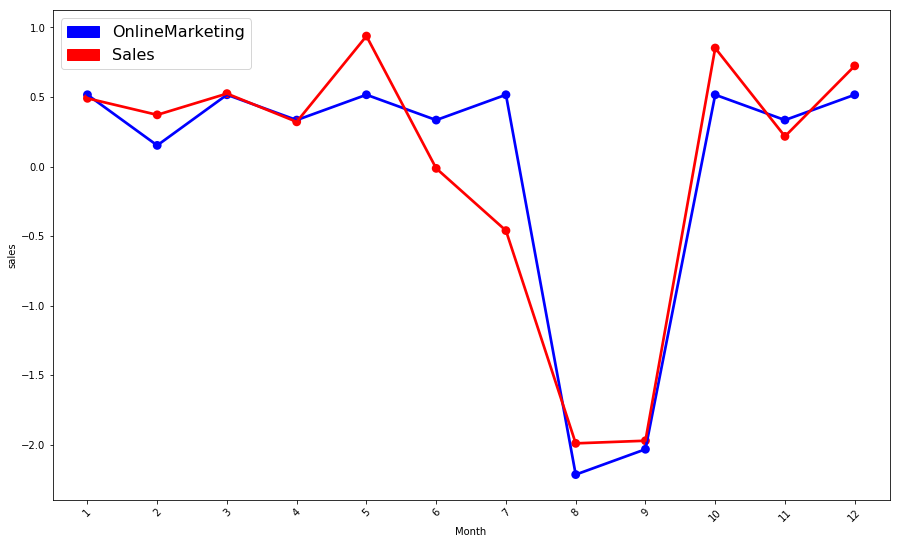

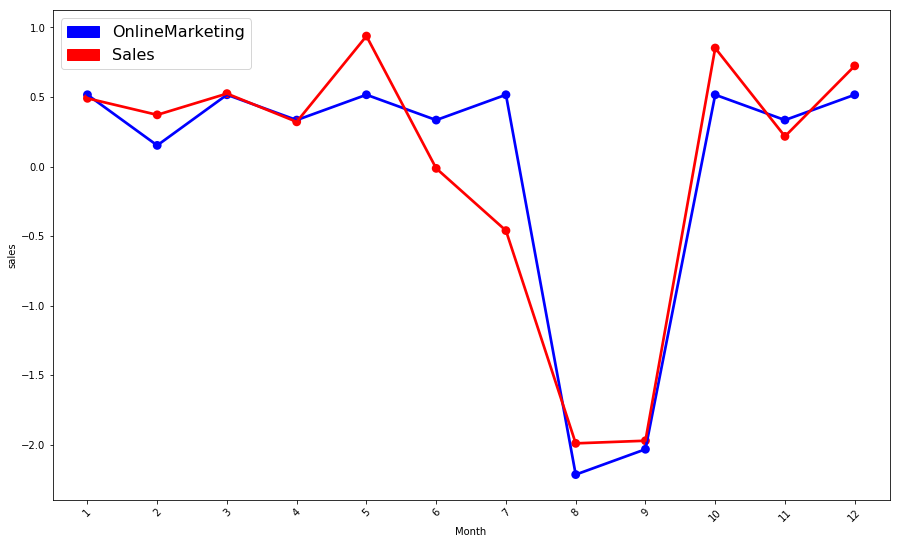

In [3301]:
import matplotlib.patches as mpatches
temp1 = WL_camera.groupby(['Month']).count()
temp1 = temp1.reset_index()

#Do the same, but sum the values to get the total values of everything by year.
temp2 = WL_camera.groupby(['Month']).sum()
temp2 = temp2.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['OnlineMarketing']= temp1['OnlineMarketing']
normalised_df['sales'] = temp2['GMV']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Month'] = temp1['Month']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.OnlineMarketing, color = 'blue', label='OnlineMarketing')
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.sales, color = 'red', label='Sales')

blue_patch = mpatches.Patch(color='blue', label='OnlineMarketing')
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);import matplotlib.patches as mpatches
temp1 = WL_camera.groupby(['Month']).count()
temp1 = temp1.reset_index()

#Do the same, but sum the values to get the total values of everything by year.
temp2 = WL_camera.groupby(['Month']).sum()
temp2 = temp2.reset_index()

#Normalize the data, i.e. zero mean and unit std. I did this to be able to compare the shapes of both graphs, since 
#they have different ranges
normalised_df = pd.DataFrame()

normalised_df['OnlineMarketing']= temp1['OnlineMarketing']
normalised_df['sales'] = temp2['GMV']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Month'] = temp1['Month']


#Plot
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.OnlineMarketing, color = 'blue', label='OnlineMarketing')
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.sales, color = 'red', label='Sales')

blue_patch = mpatches.Patch(color='blue', label='OnlineMarketing')
red_patch = mpatches.Patch(color='red', label='Sales')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

## Camera Accessory Model Building

#### Function to Calculate Elasticity

In [3302]:
#Function to calculate the elasticity of the important KPIs
def calculateElasticity(df_train, gmv, coefficient_df):
    elasticity = []
    for i in coefficient_df.feature:
        feature_mean = df_train[i].mean()
        elasticity.append((((coefficient_df.loc[coefficient_df['feature']==i]['coefficient'].mean())*feature_mean)/gmv.mean()))
    coefficient_df['elasticity'] = pd.Series(elasticity)
    return coefficient_df

In [3303]:
ConsumerElectronic_Linear_Camera.shape

(338, 50)

### Splitting the Data into Training and Testing Sets

In [3304]:
np.random.seed(0)
df_train, df_test = train_test_split(ConsumerElectronic_Linear_Camera, train_size = 0.7, test_size = 0.3, random_state = 100)

In [3305]:
print(df_train.shape)
print(df_test.shape)

(236, 50)
(102, 50)


### Scaling 

In [3306]:
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler 
scaler = StandardScaler() 
scaler.fit(df_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [3307]:
y_train = df_train.pop('GMV')
X_train = df_train

In [3308]:
y_test=df_test.pop('GMV')
X_test=df_test

In [3309]:
# number of features in X_train
len(X_train.columns)

49

In [3310]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, len(X_train.columns)))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             # running RFE

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3311]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.095413      0.019427         0.001609        0.001971   
1       0.095589      0.013338         0.004013        0.000014   
2       0.099996      0.019737         0.001600        0.001959   
3       0.089465      0.013295         0.001600        0.001959   
4       0.087809      0.020699         0.002402        0.001961   

  param_n_features_to_select                       params  split0_test_score  \
0                          1  {'n_features_to_select': 1}          -0.000039   
1                          2  {'n_features_to_select': 2}          -0.011732   
2                          3  {'n_features_to_select': 3}           0.072871   
3                          4  {'n_features_to_select': 4}           0.088881   
4                          5  {'n_features_to_select': 5}           0.098009   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.044632           0.057406           0.078775  ...   
1           0.049653           0.075651           0.094896  ...   
2           0.038336           0.144903           0.130611  ...   
3           0.160442           0.300588           0.158333  ...   
4           0.173216           0.350172           0.338615  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.034773        0.032974               48            0.042338   
1         0.043747        0.039554               47            0.058291   
2         0.075395        0.057324               46            0.144524   
3         0.132499        0.112089               45            0.159552   
4         0.202275        0.121822               44            0.160071   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.030055            0.027800            0.020721   
1            0.041124            0.036449            0.029144   
2            0.077967            0.102284            0.102844   
3            0.111167            0.153836            0.120304   
4            0.179107            0.178423            0.211809   

   split4_train_score  mean_train_score  std_train_score  
0            0.045453          0.033274         0.009256  
1            0.052495          0.043500         0.010594  
2            0.173325          0.120189         0.034117  
3            0.187381          0.146448         0.027677  
4            0.249405          0.195763         0.031581  

[5 rows x 21 columns]

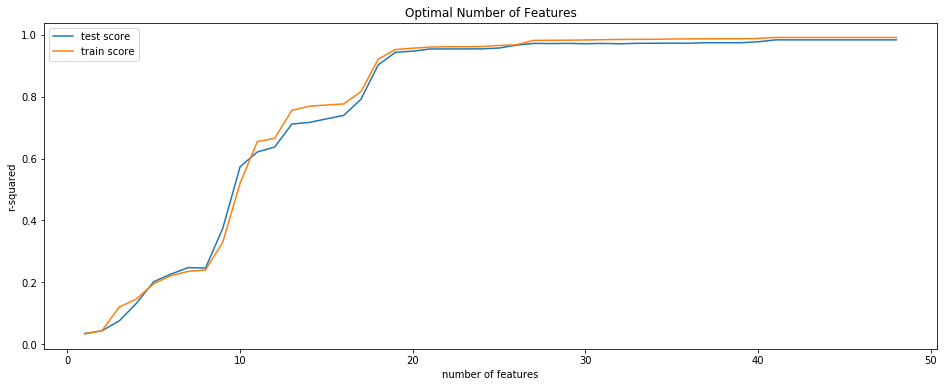

In [3312]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Now we can choose the optimal value of number of features and build a final model.

In [3313]:
import statsmodels.api as sm
# build simple simple lenier model

#X_train = X_train[col]
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()

# View summary
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     501.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          8.47e-176
Time:                        22:27:41   Log-Likelihood:                -3236.4
No. Observations:                 236   AIC:                             6557.
Df Residuals:                     194   BIC:                             6702.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3314]:
# RFE to identify significant variavles in Media spend
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
# variables with ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Units', False, 5),
 ('discountprice', False, 23),
 ('cumulative_movingavg_gmv', True, 1),
 ('cumulative_movingavg_discountprice', True, 1),
 ('Display_Price_ending_with_99', False, 11),
 ('Binoculars', False, 12),
 ('CameraAccessory', True, 1),
 ('CameraBag', False, 8),
 ('CameraBattery', True, 1),
 ('CameraBatteryCharger', True, 1),
 ('CameraBatteryGrip', True, 1),
 ('CameraEyeCup', False, 7),
 ('CameraFilmRolls', False, 15),
 ('CameraHousing', False, 25),
 ('CameraMicrophone', False, 24),
 ('CameraMount', False, 6),
 ('CameraRemoteControl', False, 26),
 ('CameraTripod', False, 29),
 ('ExtensionTube', True, 1),
 ('Filter', False, 27),
 ('Flash', False, 30),
 ('FlashShoeAdapter', False, 28),
 ('Lens', True, 1),
 ('ReflectorUmbrella', True, 1),
 ('Softbox', True, 1),
 ('Strap', False, 16),
 ('Teleconverter', False, 3),
 ('Telescope', False, 22),
 ('SLA', False, 18),
 ('MRP', True, 1),
 ('ProcurementSLA', True, 1),
 ('OnlinePayRate', False, 10),
 ('HoliDays', False, 13),
 ('OnlineMark

In [3315]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Units', 'discountprice', 'Display_Price_ending_with_99', 'Binoculars',
       'CameraBag', 'CameraEyeCup', 'CameraFilmRolls', 'CameraHousing',
       'CameraMicrophone', 'CameraMount', 'CameraRemoteControl',
       'CameraTripod', 'Filter', 'Flash', 'FlashShoeAdapter', 'Strap',
       'Teleconverter', 'Telescope', 'SLA', 'OnlinePayRate', 'HoliDays',
       'OnlineMarketing', 'PayDays', 'SaleDays', 'TV', 'TotalInvestment',
       'NPS', 'MinTemp', 'TotalRain'],
      dtype='object')

In [3316]:
import statsmodels.api as sm
# build simple simple lenier model

X_train = X_train[col]
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()

# View summary
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     210.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.07e-129
Time:                        22:27:41   Log-Likelihood:                -3430.8
No. Observations:                 236   AIC:                             6904.
Df Residuals:                     215   BIC:                             6976.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3317]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
0                                const  2.332527e+08
13                                Year  1.432000e+01
14                               Month  7.920000e+00
17                             MaxTemp  7.350000e+00
9                    ReflectorUmbrella  6.530000e+00
2   cumulative_movingavg_discountprice  4.260000e+00
1             cumulative_movingavg_gmv  4.210000e+00
16                         DataQuality  4.200000e+00
6                    CameraBatteryGrip  3.460000e+00
4                        CameraBattery  3.380000e+00
3                      CameraAccessory  2.840000e+00
18                         CoolDegDays  2.790000e+00
5                 CameraBatteryCharger  2.300000e+00
12                      ProcurementSLA  1.820000e+00
11                                 MRP  1.700000e+00
8                                 Lens  1.640000e+00
20                          SnowonGrnd  1.430000e+00
15                                 Day  1.220000e+00
7                        ExtensionTube  1.200000e+00
19                           TotalSnow  1.200000e+00
10                             Softbox  1.200000e+00

In [3318]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['Year'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.99e-129
Time:                        22:27:41   Log-Likelihood:                -3433.8
No. Observations:                 236   AIC:                             6908.
Df Residuals:                     216   BIC:                             6977.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3319]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  89.80
16                             MaxTemp   7.22
9                    ReflectorUmbrella   5.74
1             cumulative_movingavg_gmv   4.21
15                         DataQuality   4.15
2   cumulative_movingavg_discountprice   4.09
6                    CameraBatteryGrip   3.46
4                        CameraBattery   2.84
17                         CoolDegDays   2.75
3                      CameraAccessory   2.68
5                 CameraBatteryCharger   2.29
13                               Month   1.89
12                      ProcurementSLA   1.79
11                                 MRP   1.69
8                                 Lens   1.59
19                          SnowonGrnd   1.41
18                           TotalSnow   1.20
10                             Softbox   1.20
14                                 Day   1.19
7                        ExtensionTube   1.18

In [3320]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['Softbox'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     181.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          7.93e-120
Time:                        22:27:41   Log-Likelihood:                -3460.5
No. Observations:                 236   AIC:                             6959.
Df Residuals:                     217   BIC:                             7025.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3321]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  89.79
15                             MaxTemp   7.14
9                    ReflectorUmbrella   5.70
1             cumulative_movingavg_gmv   4.20
14                         DataQuality   4.14
2   cumulative_movingavg_discountprice   4.08
6                    CameraBatteryGrip   3.46
4                        CameraBattery   2.84
16                         CoolDegDays   2.73
3                      CameraAccessory   2.63
5                 CameraBatteryCharger   2.12
12                               Month   1.89
11                      ProcurementSLA   1.78
10                                 MRP   1.69
8                                 Lens   1.57
18                          SnowonGrnd   1.41
17                           TotalSnow   1.20
13                                 Day   1.17
7                        ExtensionTube   1.16

In [3322]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['MaxTemp'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     184.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          5.43e-119
Time:                        22:27:41   Log-Likelihood:                -3465.4
No. Observations:                 236   AIC:                             6967.
Df Residuals:                     218   BIC:                             7029.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3323]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  89.77
9                    ReflectorUmbrella   5.66
1             cumulative_movingavg_gmv   4.11
2   cumulative_movingavg_discountprice   4.05
6                    CameraBatteryGrip   3.32
4                        CameraBattery   2.79
3                      CameraAccessory   2.62
5                 CameraBatteryCharger   2.11
12                               Month   1.88
11                      ProcurementSLA   1.77
15                         CoolDegDays   1.74
10                                 MRP   1.67
8                                 Lens   1.55
14                         DataQuality   1.31
7                        ExtensionTube   1.16
13                                 Day   1.16
17                          SnowonGrnd   1.15
16                           TotalSnow   1.05

In [3324]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['DataQuality'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     196.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.81e-120
Time:                        22:27:41   Log-Likelihood:                -3465.4
No. Observations:                 236   AIC:                             6965.
Df Residuals:                     219   BIC:                             7024.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3325]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  83.36
9                    ReflectorUmbrella   5.66
1             cumulative_movingavg_gmv   4.07
2   cumulative_movingavg_discountprice   4.04
6                    CameraBatteryGrip   3.32
4                        CameraBattery   2.78
3                      CameraAccessory   2.62
5                 CameraBatteryCharger   2.09
12                               Month   1.88
11                      ProcurementSLA   1.74
10                                 MRP   1.67
8                                 Lens   1.55
14                         CoolDegDays   1.53
7                        ExtensionTube   1.16
13                                 Day   1.15
16                          SnowonGrnd   1.10
15                           TotalSnow   1.03

In [3326]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['SnowonGrnd'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     210.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.59e-121
Time:                        22:27:41   Log-Likelihood:                -3465.4
No. Observations:                 236   AIC:                             6963.
Df Residuals:                     220   BIC:                             7018.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3327]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  83.36
9                    ReflectorUmbrella   5.62
1             cumulative_movingavg_gmv   3.97
2   cumulative_movingavg_discountprice   3.95
6                    CameraBatteryGrip   3.31
4                        CameraBattery   2.78
3                      CameraAccessory   2.62
5                 CameraBatteryCharger   2.09
12                               Month   1.87
11                      ProcurementSLA   1.73
10                                 MRP   1.67
8                                 Lens   1.55
14                         CoolDegDays   1.52
7                        ExtensionTube   1.16
13                                 Day   1.14
15                           TotalSnow   1.03

In [3328]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['TotalSnow'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     226.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.80e-122
Time:                        22:27:42   Log-Likelihood:                -3465.5
No. Observations:                 236   AIC:                             6961.
Df Residuals:                     221   BIC:                             7013.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3329]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  83.36
9                    ReflectorUmbrella   5.62
2   cumulative_movingavg_discountprice   3.93
1             cumulative_movingavg_gmv   3.92
6                    CameraBatteryGrip   3.31
4                        CameraBattery   2.78
3                      CameraAccessory   2.62
5                 CameraBatteryCharger   2.07
12                               Month   1.87
11                      ProcurementSLA   1.73
10                                 MRP   1.66
8                                 Lens   1.54
14                         CoolDegDays   1.52
7                        ExtensionTube   1.16
13                                 Day   1.14

In [3330]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['Day'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     244.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.27e-123
Time:                        22:27:42   Log-Likelihood:                -3465.6
No. Observations:                 236   AIC:                             6959.
Df Residuals:                     222   BIC:                             7008.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3331]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  80.34
9                    ReflectorUmbrella   5.59
2   cumulative_movingavg_discountprice   3.93
1             cumulative_movingavg_gmv   3.88
6                    CameraBatteryGrip   3.30
4                        CameraBattery   2.78
3                      CameraAccessory   2.62
5                 CameraBatteryCharger   2.05
12                               Month   1.84
11                      ProcurementSLA   1.64
10                                 MRP   1.57
8                                 Lens   1.52
13                         CoolDegDays   1.52
7                        ExtensionTube   1.15

In [3332]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['CameraAccessory'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     265.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.11e-124
Time:                        22:27:42   Log-Likelihood:                -3466.0
No. Observations:                 236   AIC:                             6958.
Df Residuals:                     223   BIC:                             7003.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3333]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  80.33
8                    ReflectorUmbrella   4.89
1             cumulative_movingavg_gmv   3.86
2   cumulative_movingavg_discountprice   3.85
5                    CameraBatteryGrip   3.16
3                        CameraBattery   2.33
4                 CameraBatteryCharger   2.03
11                               Month   1.83
10                      ProcurementSLA   1.64
9                                  MRP   1.57
12                         CoolDegDays   1.51
7                                 Lens   1.50
6                        ExtensionTube   1.15

In [3334]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['ReflectorUmbrella'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     289.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.09e-125
Time:                        22:27:42   Log-Likelihood:                -3466.6
No. Observations:                 236   AIC:                             6957.
Df Residuals:                     224   BIC:                             6999.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3335]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  70.40
1             cumulative_movingavg_gmv   3.80
2   cumulative_movingavg_discountprice   3.25
5                    CameraBatteryGrip   3.05
4                 CameraBatteryCharger   1.84
3                        CameraBattery   1.82
10                               Month   1.72
9                       ProcurementSLA   1.60
8                                  MRP   1.57
7                                 Lens   1.49
11                         CoolDegDays   1.47
6                        ExtensionTube   1.14

In [3336]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['ExtensionTube'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     317.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.24e-126
Time:                        22:27:42   Log-Likelihood:                -3467.4
No. Observations:                 236   AIC:                             6957.
Df Residuals:                     225   BIC:                             6995.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3337]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                const  69.56
1             cumulative_movingavg_gmv   3.76
2   cumulative_movingavg_discountprice   3.18
5                    CameraBatteryGrip   2.99
3                        CameraBattery   1.82
4                 CameraBatteryCharger   1.78
9                                Month   1.71
7                                  MRP   1.56
8                       ProcurementSLA   1.56
6                                 Lens   1.48
10                         CoolDegDays   1.46

In [3338]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['CameraBattery'], 1,)
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     353.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          7.82e-128
Time:                        22:27:42   Log-Likelihood:                -3467.6
No. Observations:                 236   AIC:                             6955.
Df Residuals:                     226   BIC:                             6990.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [3339]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                               const  67.66
1            cumulative_movingavg_gmv   3.71
4                   CameraBatteryGrip   2.89
2  cumulative_movingavg_discountprice   2.64
3                CameraBatteryCharger   1.76
8                               Month   1.64
7                      ProcurementSLA   1.56
6                                 MRP   1.51
5                                Lens   1.41
9                         CoolDegDays   1.34

Text(0.5, 0, 'Errors')

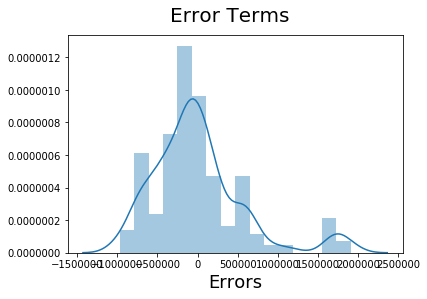

In [3340]:
# Testing Error Rate
y_train_pred = lr1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [3341]:
col = X_train.columns
X_test_new = X_test[col]
X_test_new = sm.add_constant(X_test_new)

In [3342]:
# Making predictions
y_pred = lr1.predict(X_test_new)
y_pred

Week
73    5.956069e+06
56    5.026062e+06
71    5.714419e+06
46    5.097914e+06
62    5.824261e+06
27    3.760108e+05
54    4.555246e+06
35   -2.319168e+05
40    2.375927e+06
74    7.183335e+06
79    2.167494e+06
68    4.784453e+06
54    4.555246e+06
65    5.120847e+06
39   -8.711419e+03
50    5.710333e+06
51    5.730981e+06
42    1.331418e+07
54    4.555246e+06
53    4.505883e+06
50    5.710333e+06
43    5.211594e+06
46    5.097914e+06
59    5.094075e+06
74    7.237822e+06
59    5.094075e+06
42    1.335777e+07
51    5.730981e+06
28    4.982942e+06
28    4.982942e+06
          ...     
45    5.727477e+06
60    6.559025e+06
56    5.026062e+06
55    4.109258e+06
76    4.848872e+06
69    2.603147e+06
31    2.845528e+06
63    6.216500e+06
49    5.082576e+06
74    7.330451e+06
67    5.412368e+06
55    4.109258e+06
59    5.094075e+06
28    4.830378e+06
54    4.555246e+06
69    2.603147e+06
39    1.002630e+05
62    5.824261e+06
40    2.375927e+06
56    5.026062e+06
57    5.286744e+06
73    5

In [3343]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9163671653100596

***We have achieved a R2 score of 0.92 for Test***

### Elasticity - Camera Accessory - Basic Linear Model

In [3344]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

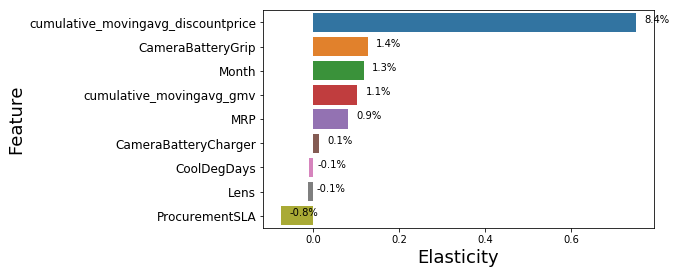

In [3345]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =12)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Gaming Model Building

## Splitting the Data into Training and Testing Sets

In [3346]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(ConsumerElectronic_Linear_Game, train_size = 0.7, test_size = 0.3, random_state = 100)

In [3347]:
print(df_train.shape)
print(df_test.shape)

(241, 42)
(104, 42)


### Rescaling the Features 


In [3348]:
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler 
scaler = StandardScaler() 
# To scale data 
scaler.fit(df_train) 

StandardScaler(copy=True, with_mean=True, with_std=True)

### Dividing into X and Y sets for the model building

In [3349]:
y_train = df_train.pop('GMV')
X_train = df_train

In [3350]:
y_train.shape

(241,)

In [3351]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, len(X_train.columns)))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             # running RFE

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   11.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3352]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.071596      0.006014         0.001600        0.001959   
1       0.089168      0.038731         0.004000        0.000002   
2       0.076782      0.008009         0.003194        0.001597   
3       0.068421      0.009621         0.003212        0.001606   
4       0.072818      0.015523         0.002402        0.001961   

  param_n_features_to_select                       params  split0_test_score  \
0                          1  {'n_features_to_select': 1}           0.161361   
1                          2  {'n_features_to_select': 2}           0.302561   
2                          3  {'n_features_to_select': 3}           0.304702   
3                          4  {'n_features_to_select': 4}           0.305923   
4                          5  {'n_features_to_select': 5}           0.388128   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0          -0.102010           0.320756           0.166518  ...   
1          -0.095666           0.466654           0.339981  ...   
2          -0.113282           0.485853           0.448170  ...   
3           0.021572           0.492498           0.456415  ...   
4           0.218239           0.494166           0.503102  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.153202        0.139574               40            0.197258   
1         0.287058        0.199503               39            0.436251   
2         0.328078        0.231799               38            0.439137   
3         0.359790        0.184632               37            0.439170   
4         0.436587        0.125014               36            0.487462   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.254735            0.145929            0.191645   
1            0.317387            0.389288            0.288893   
2            0.328793            0.404798            0.423464   
3            0.396977            0.405978            0.431676   
4            0.476058            0.407748            0.476958   

   split4_train_score  mean_train_score  std_train_score  
0            0.187372          0.195388         0.034785  
1            0.275958          0.341555         0.061492  
2            0.413126          0.401863         0.038290  
3            0.421066          0.418973         0.015661  
4            0.463677          0.462381         0.028338  

[5 rows x 21 columns]

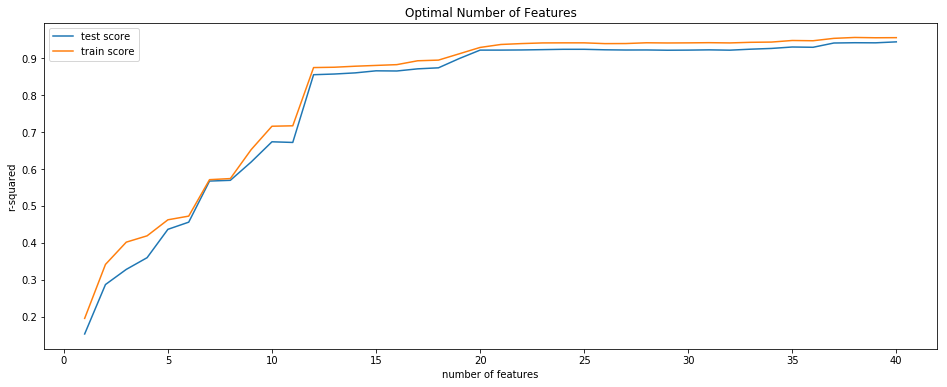

In [3353]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [3354]:
# RFE to identify significant variavles in Media spend
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,16)             # running RFE
rfe = rfe.fit(X_train, y_train)
# variables with ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Units', False, 10),
 ('discountprice', False, 15),
 ('cumulative_movingavg_gmv', False, 16),
 ('cumulative_movingavg_discountprice', False, 21),
 ('Display_Price_ending_with_99', False, 18),
 ('CoolingPad', False, 17),
 ('GameControlMount', True, 1),
 ('GamePad', False, 5),
 ('GamingAccessoryKit', True, 1),
 ('GamingAdapter', False, 4),
 ('GamingChargingStation', False, 7),
 ('GamingHeadset', False, 6),
 ('GamingKeyboard', True, 1),
 ('GamingMemoryCard', False, 23),
 ('GamingMouse', False, 19),
 ('GamingMousePad', True, 1),
 ('GamingSpeaker', False, 22),
 ('JoystickGamingWheel', False, 24),
 ('MotionController', False, 25),
 ('TVOutCableAccessory', False, 26),
 ('SLA', False, 9),
 ('MRP', True, 1),
 ('ProcurementSLA', False, 3),
 ('OnlinePayRate', True, 1),
 ('HoliDays', False, 12),
 ('OnlineMarketing', False, 14),
 ('PayDays', False, 8),
 ('SaleDays', False, 20),
 ('TV', False, 11),
 ('TotalInvestment', False, 13),
 ('NPS', True, 1),
 ('Year', True, 1),
 ('Month', True, 1),
 ('Day'

In [3355]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'CoolingPad', 'GamePad', 'GamingAdapter', 'GamingChargingStation',
       'GamingHeadset', 'GamingMemoryCard', 'GamingMouse', 'GamingSpeaker',
       'JoystickGamingWheel', 'MotionController', 'TVOutCableAccessory', 'SLA',
       'ProcurementSLA', 'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays',
       'TV', 'TotalInvestment', 'Day'],
      dtype='object')

In [3356]:
import statsmodels.api as sm
# build simple simple lenier model

X_train = X_train[col]
X_train_lm = sm.add_constant(X_train)
lr2001 = sm.OLS(y_train, X_train_lm).fit()

# View summary
print(lr2001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     104.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           2.87e-94
Time:                        22:27:56   Log-Likelihood:                -3505.0
No. Observations:                 241   AIC:                             7044.
Df Residuals:                     224   BIC:                             7103.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.409e+09   5.56

In [3357]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
0                const  2.756106e+08
8                 Year  1.690000e+01
9                Month  1.256000e+01
11             MaxTemp  1.231000e+01
12             MinTemp  8.140000e+00
4       GamingMousePad  7.620000e+00
10         DataQuality  4.030000e+00
3       GamingKeyboard  3.530000e+00
13         CoolDegDays  3.410000e+00
7                  NPS  2.170000e+00
1     GameControlMount  1.960000e+00
5                  MRP  1.650000e+00
2   GamingAccessoryKit  1.610000e+00
16          SnowonGrnd  1.440000e+00
6        OnlinePayRate  1.220000e+00
15           TotalSnow  1.150000e+00
14           TotalRain  1.130000e+00

In [3358]:
X_train.columns

Index(['GameControlMount', 'GamingAccessoryKit', 'GamingKeyboard',
       'GamingMousePad', 'MRP', 'OnlinePayRate', 'NPS', 'Year', 'Month',
       'DataQuality', 'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain',
       'TotalSnow', 'SnowonGrnd'],
      dtype='object')

In [3359]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['Year'], 1,)
X_train_lm = sm.add_constant(X_train)
lr2001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr2001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     108.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.43e-94
Time:                        22:27:56   Log-Likelihood:                -3508.4
No. Observations:                 241   AIC:                             7049.
Df Residuals:                     225   BIC:                             7105.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                5.93e+06   7.33

In [3360]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  467.71
10             MaxTemp   12.17
11             MinTemp    7.38
9          DataQuality    4.02
4       GamingMousePad    3.80
12         CoolDegDays    3.41
3       GamingKeyboard    3.34
7                  NPS    1.90
1     GameControlMount    1.85
5                  MRP    1.61
8                Month    1.55
2   GamingAccessoryKit    1.54
15          SnowonGrnd    1.37
6        OnlinePayRate    1.22
14           TotalSnow    1.15
13           TotalRain    1.12

In [3361]:

# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['MaxTemp'], 1,)
X_train_lm = sm.add_constant(X_train)
lr2001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr2001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.72e-95
Time:                        22:27:56   Log-Likelihood:                -3508.6
No. Observations:                 241   AIC:                             7047.
Df Residuals:                     226   BIC:                             7099.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.006e+06   7.17

In [3362]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  449.55
10             MinTemp    4.12
4       GamingMousePad    3.71
3       GamingKeyboard    3.33
11         CoolDegDays    3.24
1     GameControlMount    1.85
7                  NPS    1.83
9          DataQuality    1.71
5                  MRP    1.59
8                Month    1.55
2   GamingAccessoryKit    1.54
14          SnowonGrnd    1.35
6        OnlinePayRate    1.22
12           TotalRain    1.12
13           TotalSnow    1.10

In [3363]:
# drop the variable which has high p value (not significant)-CoolDegDays
X_train = X_train.drop(['CoolDegDays'], 1,)
X_train_lm = sm.add_constant(X_train)
lr2001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr2001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.78e-96
Time:                        22:27:56   Log-Likelihood:                -3508.7
No. Observations:                 241   AIC:                             7045.
Df Residuals:                     227   BIC:                             7094.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.908e+06   6.93

In [3364]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  420.64
4       GamingMousePad    3.71
3       GamingKeyboard    3.30
10             MinTemp    2.07
1     GameControlMount    1.85
9          DataQuality    1.70
7                  NPS    1.65
5                  MRP    1.59
8                Month    1.55
2   GamingAccessoryKit    1.53
13          SnowonGrnd    1.27
6        OnlinePayRate    1.21
11           TotalRain    1.11
12           TotalSnow    1.10

In [3365]:
# drop the variable which has high p value (not significant)-CoolDegDays
X_train = X_train.drop(['TotalSnow'], 1,)
X_train_lm = sm.add_constant(X_train)
lr2001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr2001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.78e-97
Time:                        22:27:56   Log-Likelihood:                -3508.7
No. Observations:                 241   AIC:                             7043.
Df Residuals:                     228   BIC:                             7089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.911e+06   6.91

In [3366]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  420.48
4       GamingMousePad    3.71
3       GamingKeyboard    3.29
10             MinTemp    1.98
1     GameControlMount    1.85
7                  NPS    1.64
9          DataQuality    1.62
5                  MRP    1.59
8                Month    1.55
2   GamingAccessoryKit    1.53
12          SnowonGrnd    1.26
6        OnlinePayRate    1.21
11           TotalRain    1.11

In [3367]:
# drop the variable which has high p value (not significant)-CoolDegDays
X_train = X_train.drop(['MRP'], 1,)
X_train_lm = sm.add_constant(X_train)
lr2001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr2001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.61e-98
Time:                        22:27:56   Log-Likelihood:                -3509.0
No. Observations:                 241   AIC:                             7042.
Df Residuals:                     229   BIC:                             7084.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                6.16e+06   5.66

In [3368]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  282.32
4       GamingMousePad    3.63
3       GamingKeyboard    3.26
9              MinTemp    1.96
1     GameControlMount    1.82
8          DataQuality    1.62
7                Month    1.54
6                  NPS    1.44
11          SnowonGrnd    1.26
2   GamingAccessoryKit    1.22
5        OnlinePayRate    1.18
10           TotalRain    1.11

In [3369]:
# drop the variable which has high p value (not significant)-CoolDegDays
X_train = X_train.drop(['DataQuality'], 1,)
X_train_lm = sm.add_constant(X_train)
lr2001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr2001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     164.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           8.40e-99
Time:                        22:27:56   Log-Likelihood:                -3509.7
No. Observations:                 241   AIC:                             7041.
Df Residuals:                     230   BIC:                             7080.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.208e+06   5.65

In [3370]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                const  280.83
4       GamingMousePad    3.63
3       GamingKeyboard    3.26
1     GameControlMount    1.82
7                Month    1.54
8              MinTemp    1.46
6                  NPS    1.44
2   GamingAccessoryKit    1.22
5        OnlinePayRate    1.14
10          SnowonGrnd    1.13
9            TotalRain    1.03

In [3371]:
# drop the variable which has high p value (not significant)-CoolDegDays
X_train = X_train.drop(['Month'], 1,)
X_train_lm = sm.add_constant(X_train)
lr2001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr2001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     182.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.16e-99
Time:                        22:27:57   Log-Likelihood:                -3510.4
No. Observations:                 241   AIC:                             7041.
Df Residuals:                     231   BIC:                             7076.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.847e+06   4.69

In [3372]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0               const  193.64
4      GamingMousePad    3.61
3      GamingKeyboard    3.18
1    GameControlMount    1.68
7             MinTemp    1.40
6                 NPS    1.20
2  GamingAccessoryKit    1.17
9          SnowonGrnd    1.11
5       OnlinePayRate    1.08
8           TotalRain    1.03

Text(0.5, 0, 'Errors')

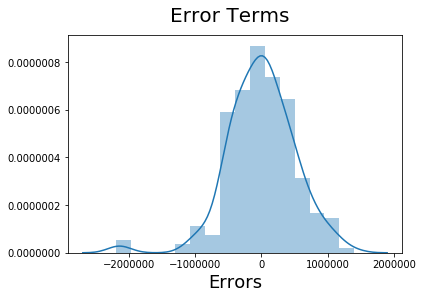

In [3373]:
# Testing Error Rate
y_train_pred = lr2001.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Making Predictions 

In [3374]:
y_test=df_test.pop('GMV')
X_test=df_test

In [3375]:
# Creating X_test_new dataframe 
col=X_train.columns
X_test_new = X_test[col]
X_test_new = sm.add_constant(X_test_new)

In [3376]:
# Making predictions
y_pred = lr2001.predict(X_test_new)
y_pred

Week
63    3.712950e+06
38    9.012251e+05
28    5.237999e+06
37    6.560526e+05
79    2.205614e+06
54    3.395892e+06
50    3.339158e+06
65    3.675871e+06
77    3.672308e+06
67    2.954236e+06
27   -1.657720e+05
44    2.908523e+06
62    3.239898e+06
40    2.298538e+06
33    2.327918e+05
42    7.346389e+06
38    9.012251e+05
70    4.701101e+06
44    2.854040e+06
49    2.615264e+06
72    4.059365e+06
44    2.908523e+06
37    9.012251e+05
73    4.090726e+06
41    2.381235e+06
56    3.960921e+06
41    2.353994e+06
45    2.554770e+06
61    2.855422e+06
54    3.461471e+06
          ...     
65    3.206276e+06
47    2.420028e+06
53    3.861923e+06
61    2.855422e+06
60    3.464749e+06
52    3.757256e+06
79    2.750442e+06
77    3.454377e+06
31    1.443607e+06
34   -3.654189e+03
51    3.063981e+06
69    1.931517e+06
70    4.744044e+06
74    5.060927e+06
68    3.273050e+06
47    2.521670e+06
28    4.931131e+06
56    3.960921e+06
47    2.521670e+06
58    3.423473e+06
41    2.326752e+06
60    3

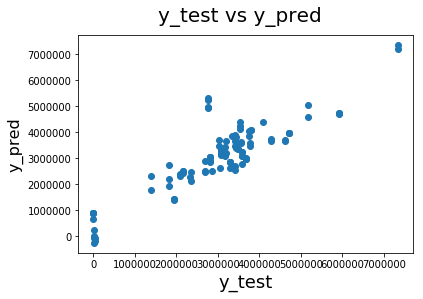

In [3377]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3378]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7810834407334872

In [3379]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

679298.3675197834

### Elasticity - Game Accessory - Basic Linear Model

In [3380]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr2001.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)

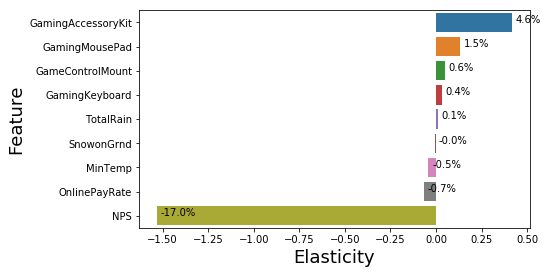

In [3381]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Home Audio Model Building


## Splitting the Data into Training and Testing Sets



In [3382]:

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(ConsumerElectronic_Linear_HomeAudio, train_size = 0.7, test_size = 0.3, random_state = 100)

In [3383]:
print(df_train.shape)
print(df_test.shape)


(226, 38)
(98, 38)


In [3384]:
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler 
scaler = StandardScaler() 

# To scale data 
scaler.fit(df_train) 
#df_train = scaler.fit_transform(df_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [3385]:

y_train = df_train.pop('GMV')
X_train = df_train

In [3386]:
y_train.shape

(226,)

In [3387]:
X_train.shape

(226, 37)

In [3388]:
#code for removing co related variables:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
X_train.drop(to_drop, axis=1, inplace=True)


In [3389]:
y_train.shape

(226,)

In [3390]:
X_train.shape

(226, 37)

In [3391]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, len(X_train.columns)))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             # running RFE

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    7.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [3392]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.068803      0.008914         0.002399        0.001959   
1       0.072562      0.007936         0.000809        0.001619   
2       0.065604      0.012010         0.002409        0.001967   
3       0.046415      0.003196         0.002399        0.001959   
4       0.049805      0.001986         0.002402        0.001961   

  param_n_features_to_select                       params  split0_test_score  \
0                          1  {'n_features_to_select': 1}          -0.045262   
1                          2  {'n_features_to_select': 2}          -0.043672   
2                          3  {'n_features_to_select': 3}           0.147777   
3                          4  {'n_features_to_select': 4}           0.130267   
4                          5  {'n_features_to_select': 5}           0.128934   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.035635          -0.000847          -0.173221  ...   
1           0.038192           0.014633          -0.226074  ...   
2           0.108578           0.158345          -0.110655  ...   
3           0.096800           0.160674          -0.100961  ...   
4           0.089714           0.214672          -0.100161  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.028617        0.078486               35            0.048376   
1        -0.032158        0.102454               36            0.058611   
2         0.073009        0.097947               33            0.125202   
3         0.070035        0.091387               34            0.165604   
4         0.077038        0.103636               32            0.166707   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.043773            0.047645            0.063625   
1            0.053342            0.054182            0.077209   
2            0.152507            0.135987            0.169926   
3            0.171977            0.152564            0.184906   
4            0.174615            0.171755            0.215282   

   split4_train_score  mean_train_score  std_train_score  
0            0.020665          0.044817         0.013848  
1            0.024831          0.053635         0.016796  
2            0.155875          0.147899         0.015666  
3            0.157067          0.166424         0.011426  
4            0.211515          0.187975         0.020946  

[5 rows x 21 columns]

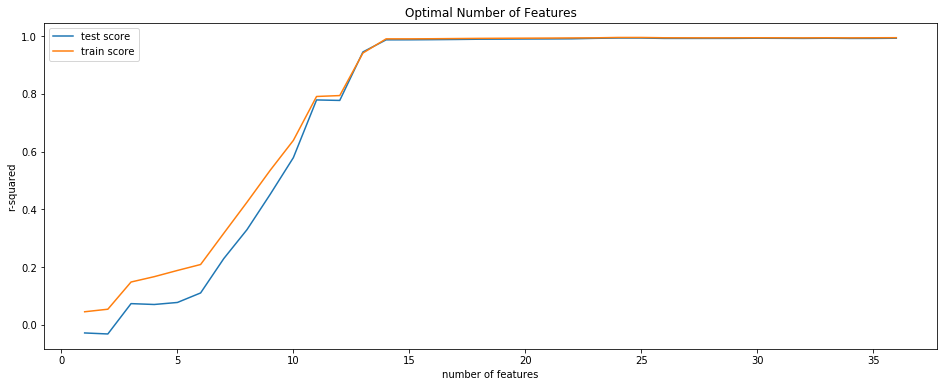

In [3393]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [3394]:
# RFE to identify significant variavles in Media spend
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
# variables with ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Units', False, 11),
 ('discountprice', True, 1),
 ('cumulative_movingavg_gmv', False, 14),
 ('cumulative_movingavg_discountprice', False, 16),
 ('Display_Price_ending_with_99', False, 13),
 ('BoomBox', False, 18),
 ('DJController', False, 3),
 ('Dock', False, 22),
 ('DockingStation', False, 21),
 ('FMRadio', False, 20),
 ('HiFiSystem', False, 19),
 ('HomeAudioSpeaker', False, 15),
 ('KaraokePlayer', True, 1),
 ('SlingBox', False, 17),
 ('SoundMixer', False, 23),
 ('VoiceRecorder', True, 1),
 ('SLA', False, 12),
 ('MRP', True, 1),
 ('ProcurementSLA', True, 1),
 ('OnlinePayRate', True, 1),
 ('HoliDays', False, 5),
 ('OnlineMarketing', False, 9),
 ('PayDays', False, 6),
 ('SaleDays', False, 7),
 ('TV', False, 8),
 ('TotalInvestment', False, 10),
 ('NPS', True, 1),
 ('Year', True, 1),
 ('Month', True, 1),
 ('Day', True, 1),
 ('DataQuality', True, 1),
 ('MaxTemp', False, 4),
 ('MinTemp', True, 1),
 ('CoolDegDays', True, 1),
 ('TotalRain', False, 2),
 ('TotalSnow', True, 1),
 ('SnowonGrnd

In [3395]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]


Index(['Units', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'BoomBox', 'DJController', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'SlingBox', 'SoundMixer', 'SLA',
       'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays', 'TV',
       'TotalInvestment', 'MaxTemp', 'TotalRain'],
      dtype='object')

In [3396]:
import statsmodels.api as sm
# build simple simple lenier model

X_train = X_train[col]
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()

# View summary
print(lr3001.summary())


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1474.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.45e-203
Time:                        22:28:07   Log-Likelihood:                -3159.3
No. Observations:                 226   AIC:                             6351.
Df Residuals:                     210   BIC:                             6405.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.084e+09   2.32e+08     -4.

In [3397]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


		

Features           VIF
0            const  1.387863e+08
8             Year  8.440000e+00
9            Month  7.610000e+00
12         MinTemp  4.470000e+00
3    VoiceRecorder  3.690000e+00
7              NPS  3.660000e+00
13     CoolDegDays  3.600000e+00
1    discountprice  2.840000e+00
6    OnlinePayRate  2.730000e+00
5   ProcurementSLA  2.380000e+00
11     DataQuality  1.660000e+00
4              MRP  1.620000e+00
15      SnowonGrnd  1.530000e+00
2    KaraokePlayer  1.460000e+00
10             Day  1.260000e+00
14       TotalSnow  1.130000e+00

In [3398]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['TotalSnow'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1581.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          5.15e-205
Time:                        22:28:07   Log-Likelihood:                -3159.7
No. Observations:                 226   AIC:                             6349.
Df Residuals:                     211   BIC:                             6401.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.071e+09   2.31e+08     -4.

In [3399]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
0            const  1.380962e+08
8             Year  8.400000e+00
9            Month  7.550000e+00
12         MinTemp  4.200000e+00
3    VoiceRecorder  3.680000e+00
7              NPS  3.650000e+00
13     CoolDegDays  3.580000e+00
1    discountprice  2.840000e+00
6    OnlinePayRate  2.710000e+00
5   ProcurementSLA  2.380000e+00
4              MRP  1.620000e+00
11     DataQuality  1.530000e+00
14      SnowonGrnd  1.480000e+00
2    KaraokePlayer  1.460000e+00
10             Day  1.260000e+00

In [3400]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['SnowonGrnd'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1686.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          5.73e-206
Time:                        22:28:07   Log-Likelihood:                -3161.4
No. Observations:                 226   AIC:                             6351.
Df Residuals:                     212   BIC:                             6399.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.007e+09   2.29e+08     -4.

In [3401]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
0            const  1.346828e+08
8             Year  8.190000e+00
9            Month  7.210000e+00
7              NPS  3.610000e+00
3    VoiceRecorder  3.590000e+00
13     CoolDegDays  3.370000e+00
12         MinTemp  3.210000e+00
1    discountprice  2.790000e+00
6    OnlinePayRate  2.710000e+00
5   ProcurementSLA  2.370000e+00
4              MRP  1.620000e+00
2    KaraokePlayer  1.440000e+00
11     DataQuality  1.300000e+00
10             Day  1.250000e+00

In [3402]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['MinTemp'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1825.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.33e-207
Time:                        22:28:07   Log-Likelihood:                -3162.0
No. Observations:                 226   AIC:                             6350.
Df Residuals:                     213   BIC:                             6394.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.806e+08   2.28e+08     -4.

In [3403]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
0            const  1.331848e+08
8             Year  8.100000e+00
9            Month  7.210000e+00
7              NPS  3.600000e+00
3    VoiceRecorder  3.450000e+00
1    discountprice  2.690000e+00
6    OnlinePayRate  2.670000e+00
5   ProcurementSLA  2.360000e+00
12     CoolDegDays  2.000000e+00
4              MRP  1.620000e+00
2    KaraokePlayer  1.410000e+00
10             Day  1.240000e+00
11     DataQuality  1.190000e+00

In [3404]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['Year'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1838.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.85e-205
Time:                        22:28:08   Log-Likelihood:                -3171.4
No. Observations:                 226   AIC:                             6367.
Df Residuals:                     214   BIC:                             6408.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.744e+06   5.81e+05      3.

In [3405]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0            const  798.14
7              NPS    3.49
3    VoiceRecorder    3.03
1    discountprice    2.67
6    OnlinePayRate    2.65
11     CoolDegDays    2.00
8            Month    1.54
5   ProcurementSLA    1.52
2    KaraokePlayer    1.37
4              MRP    1.30
9              Day    1.23
10     DataQuality    1.19

In [3406]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['Month'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1971.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.06e-205
Time:                        22:28:08   Log-Likelihood:                -3174.8
No. Observations:                 226   AIC:                             6372.
Df Residuals:                     215   BIC:                             6409.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.078e+06   5.25e+05      2.

In [3407]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0            const  635.96
3    VoiceRecorder    2.90
7              NPS    2.76
6    OnlinePayRate    2.48
1    discountprice    2.44
10     CoolDegDays    1.97
2    KaraokePlayer    1.32
5   ProcurementSLA    1.30
4              MRP    1.28
8              Day    1.18
9      DataQuality    1.18

In [3408]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['DataQuality'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2198.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          4.84e-207
Time:                        22:28:08   Log-Likelihood:                -3174.9
No. Observations:                 226   AIC:                             6370.
Df Residuals:                     216   BIC:                             6404.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.066e+06   5.24e+05      2.

In [3409]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0           const  634.64
3   VoiceRecorder    2.90
7             NPS    2.76
6   OnlinePayRate    2.47
1   discountprice    2.44
9     CoolDegDays    1.77
2   KaraokePlayer    1.32
5  ProcurementSLA    1.30
4             MRP    1.28
8             Day    1.18

In [3410]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['OnlinePayRate'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2481.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.06e-208
Time:                        22:28:08   Log-Likelihood:                -3175.1
No. Observations:                 226   AIC:                             6368.
Df Residuals:                     217   BIC:                             6399.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            9.87e+05   4.97e+05      1.

In [3411]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0           const  574.05
3   VoiceRecorder    2.89
1   discountprice    2.42
6             NPS    1.63
8     CoolDegDays    1.62
5  ProcurementSLA    1.23
4             MRP    1.20
7             Day    1.18
2   KaraokePlayer    1.06

In [3412]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['NPS'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2843.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.39e-210
Time:                        22:28:08   Log-Likelihood:                -3175.3
No. Observations:                 226   AIC:                             6367.
Df Residuals:                     218   BIC:                             6394.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.388e+05    3.3e+05      2.

In [3413]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0           const  253.85
3   VoiceRecorder    2.76
1   discountprice    2.41
7     CoolDegDays    1.39
4             MRP    1.19
5  ProcurementSLA    1.16
6             Day    1.12
2   KaraokePlayer    1.06

In [3414]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['ProcurementSLA'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3325.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          5.03e-212
Time:                        22:28:08   Log-Likelihood:                -3175.5
No. Observations:                 226   AIC:                             6365.
Df Residuals:                     219   BIC:                             6389.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           8.74e+05   2.65e+05      3.304

In [3415]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0          const  163.44
3  VoiceRecorder    2.55
1  discountprice    2.35
6    CoolDegDays    1.38
5            Day    1.12
4            MRP    1.09
2  KaraokePlayer    1.06

In [3416]:
# drop the variable which has high p value (not significant) and more VIF 
X_train = X_train.drop(['CoolDegDays'], 1,)
X_train_lm = sm.add_constant(X_train)
lr3001 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr3001.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4006.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          7.85e-214
Time:                        22:28:08   Log-Likelihood:                -3175.6
No. Observations:                 226   AIC:                             6363.
Df Residuals:                     220   BIC:                             6384.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.685e+05   2.63e+05      3.299

In [3417]:

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0          const  162.53
3  VoiceRecorder    1.94
1  discountprice    1.88
5            Day    1.12
4            MRP    1.09
2  KaraokePlayer    1.05

Text(0.5, 0, 'Errors')

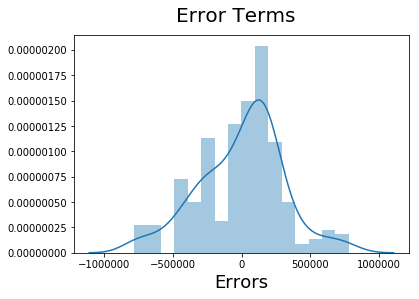

In [3418]:
# Testing Error Rate
y_train_pred = lr3001.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions 

In [3419]:
y_test=df_test.pop('GMV')
X_test=df_test

In [3420]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
col  = X_train.columns
X_test_new=X_test[col]
X_test_new = sm.add_constant(X_test_new)


In [3421]:
# Making predictions
y_pred = lr3001.predict(X_test_new)
y_pred


Week
65    3.761455e+06
41    4.079737e+06
66    3.958172e+06
58    7.413907e+06
53    5.158338e+06
69    1.646389e+06
45    8.656972e+06
27    3.296928e+04
44    6.485691e+06
54    7.720071e+06
62    4.832813e+06
52    9.999519e+06
65    3.784207e+06
74    4.025258e+06
76    3.086434e+06
39    1.188969e+05
67    3.550579e+06
64    4.578784e+06
28    4.586641e+06
28    4.575265e+06
43    5.627286e+06
51    4.931414e+06
57    4.802985e+06
29    5.453225e+06
60    7.667314e+06
68    3.021328e+06
79    1.964991e+06
31    3.448693e+06
61    5.264788e+06
72    3.793590e+06
          ...     
58    7.430971e+06
44    6.457251e+06
76    3.075058e+06
49    4.845108e+06
55    4.995993e+06
63    7.036615e+06
48    4.088759e+06
65    3.755767e+06
52    1.001090e+07
61    5.270476e+06
28    4.603705e+06
59    5.196856e+06
41    4.045609e+06
62    4.696302e+06
42    1.897089e+07
51    4.920039e+06
60    7.661626e+06
69    1.635013e+06
30    5.054004e+06
61    5.242036e+06
39    9.045712e+04
41    4

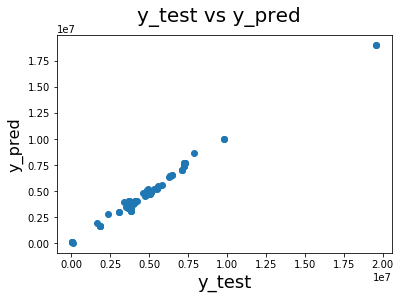

In [3422]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()


In [3423]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9899904770097717

In [3424]:

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

284919.3736776612


### Elasticity - HomeAudio - Basic Linear Model

In [3425]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr3001.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)


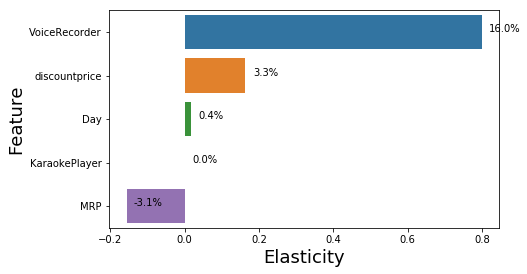

In [3426]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Koyck Model

### Koyck Model for Camera Accessory Category


In [3427]:
ConsumerElectronic_Koyck_Camera['GMV_1']=ConsumerElectronic_Koyck_Camera['GMV'].shift(-1)
ConsumerElectronic_Koyck_Camera=ConsumerElectronic_Koyck_Camera.fillna(0)

In [3428]:
#column names
names = ConsumerElectronic_Koyck_Camera.columns

In [3429]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Teleconverter', 'Telescope', 'SLA', 'MRP', 'ProcurementSLA',
       'GMV', 'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays',
       'SaleDays', 'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day',
       'DataQuality', 'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain',
       'TotalSnow', 'SnowonGrnd', 'GMV_1'],
      dtype='object')


In [3430]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [3431]:
scaled_camera = scaler.fit_transform(ConsumerElectronic_Koyck_Camera)
scaled_camera = pd.DataFrame(scaled_camera, columns=names)

In [3432]:
X=scaled_camera.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_camera.GMV)

In [3433]:

def stepwise_selection(x_train, y_train, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.    
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(x_train.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(x_train[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(x_train[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [3434]:
result = stepwise_selection(x_train,y_train)
print('Camera Features:')
print(result)

Add  GMV_1                          with p-value 1.39344e-118
Add  Strap                          with p-value 6.49974e-31
Add  CameraMount                    with p-value 2.85486e-15
Add  cumulative_movingavg_discountprice with p-value 1.02922e-17
Add  Softbox                        with p-value 1.12869e-08
Add  HoliDays                       with p-value 1.24638e-08
Add  Units                          with p-value 3.72046e-09
Add  Telescope                      with p-value 2.32144e-07
Add  TotalInvestment                with p-value 4.21594e-12
Add  Teleconverter                  with p-value 4.48756e-07
Add  CameraBattery                  with p-value 1.3328e-06
Add  CameraEyeCup                   with p-value 1.53438e-05
Add  ReflectorUmbrella              with p-value 0.000244649
Add  Day                            with p-value 0.00621312
Camera Features:
['GMV_1', 'Strap', 'CameraMount', 'cumulative_movingavg_discountprice', 'Softbox', 'HoliDays', 'Units', 'Telescope', 'TotalInv

In [3435]:
print(result)

['GMV_1', 'Strap', 'CameraMount', 'cumulative_movingavg_discountprice', 'Softbox', 'HoliDays', 'Units', 'Telescope', 'TotalInvestment', 'Teleconverter', 'CameraBattery', 'CameraEyeCup', 'ReflectorUmbrella', 'Day']


In [3436]:

import statsmodels.api as sm
# build simple simple lenier model

#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params
# View summary
print(lr1.summary())	


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1243.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.35e-213
Time:                        22:28:18   Log-Likelihood:                 200.29
No. Observations:                 253   AIC:                            -370.6
Df Residuals:                     238   BIC:                            -317.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Text(0.5, 0, 'Errors')

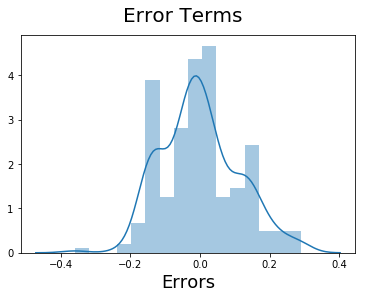

In [3437]:
# Testing Error Rate
y_train_pred = lr1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 


## Making Predictions 

In [3438]:
X_test=x_cv


In [3439]:
X_test.columns

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Teleconverter', 'Telescope', 'SLA', 'MRP', 'ProcurementSLA',
       'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays',
       'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day', 'DataQuality',
       'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain', 'TotalSnow',
       'SnowonGrnd', 'GMV_1'],
      dtype='object')

In [3440]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
#col  = x_train.columns
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)

In [3441]:
X_test_new.columns

Index(['const', 'GMV_1', 'Strap', 'CameraMount',
       'cumulative_movingavg_discountprice', 'Softbox', 'HoliDays', 'Units',
       'Telescope', 'TotalInvestment', 'Teleconverter', 'CameraBattery',
       'CameraEyeCup', 'ReflectorUmbrella', 'Day'],
      dtype='object')

In [3442]:
# Making predictions
y_pred = lr1.predict(X_test_new)
y_pred

76     3.597029
269   -0.868696
327   -0.210244
158    0.272253
200   -0.017715
276    1.873796
15    -0.106275
253    0.327078
64    -1.129198
280    0.425597
89     0.022944
198   -0.083501
68    -0.407517
59    -2.060430
259   -0.326559
234   -0.386439
26    -0.779501
173    0.647960
63    -1.059397
37    -2.105690
132    0.525728
256    0.284833
153    0.344605
55    -2.070058
214    0.369105
179    0.591917
54    -2.072465
319    0.108592
116   -0.152411
175    0.652774
         ...   
136    0.535356
326    0.039427
133    0.528135
7     -0.314608
6     -0.317015
217    0.009380
74    -0.016991
22    -0.227993
134    0.530542
65    -1.126791
103    0.053943
66    -1.124384
275    1.871389
12    -0.113496
230   -0.396067
17    -0.101461
164    0.309984
266   -0.875917
224    1.347795
334   -1.051727
225    1.350202
122   -0.046289
250    0.319857
249    0.281399
145    0.922567
220    0.016600
156    0.277210
81     3.250587
1     -2.108068
102    0.418877
Length: 85, dtype: float

In [3443]:
y_test=y_cv

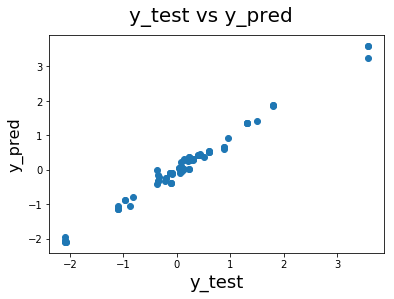

In [3444]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3445]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9895834879228904

In [3446]:

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.1172743635752123

### Elasticity - Camera Accessory - Koyck Model

In [3447]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)


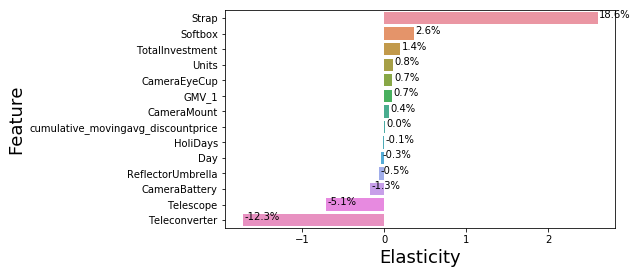

In [3448]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

##Koyck Game Accessory Model

In [3449]:
ConsumerElectronic_Koyck_Game['GMV_1']=ConsumerElectronic_Koyck_Game['GMV'].shift(-1)
ConsumerElectronic_Koyck_Game=ConsumerElectronic_Koyck_Game.fillna(0)


In [3450]:
#column names
names = ConsumerElectronic_Koyck_Game.columns

In [3451]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'SLA', 'MRP', 'ProcurementSLA', 'GMV',
       'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays',
       'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day', 'DataQuality',
       'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain', 'TotalSnow',
       'SnowonGrnd', 'GMV_1'],
      dtype='object')


In [3452]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


In [3453]:
scaled_game = scaler.fit_transform(ConsumerElectronic_Koyck_Game)
scaled_game = pd.DataFrame(scaled_game, columns=names)


In [3454]:
X=scaled_game.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_game.GMV)


In [3455]:
result = stepwise_selection(x_train,y_train)
print('Gaming Features:')
print(result)

Add  GMV_1                          with p-value 2.37211e-96
Add  GamePad                        with p-value 1.69635e-20
Add  GamingAccessoryKit             with p-value 4.47879e-22
Add  GamingMousePad                 with p-value 4.87431e-13
Add  TV                             with p-value 4.5089e-09
Add  TotalInvestment                with p-value 2.00024e-06
Add  NPS                            with p-value 2.63972e-08
Add  OnlinePayRate                  with p-value 2.21925e-09
Add  SaleDays                       with p-value 1.06853e-06
Add  SLA                            with p-value 0.000554487
Add  GamingAdapter                  with p-value 0.00963959
Gaming Features:
['GMV_1', 'GamePad', 'GamingAccessoryKit', 'GamingMousePad', 'TV', 'TotalInvestment', 'NPS', 'OnlinePayRate', 'SaleDays', 'SLA', 'GamingAdapter']


In [3456]:
print(result)

['GMV_1', 'GamePad', 'GamingAccessoryKit', 'GamingMousePad', 'TV', 'TotalInvestment', 'NPS', 'OnlinePayRate', 'SaleDays', 'SLA', 'GamingAdapter']


In [3457]:

import statsmodels.api as sm
# build simple simple lenier model

#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params
# View summary
print(lr1.summary())	


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     570.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.69e-168
Time:                        22:28:25   Log-Likelihood:                 53.922
No. Observations:                 258   AIC:                            -83.84
Df Residuals:                     246   BIC:                            -41.21
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0027      0

Text(0.5, 0, 'Errors')

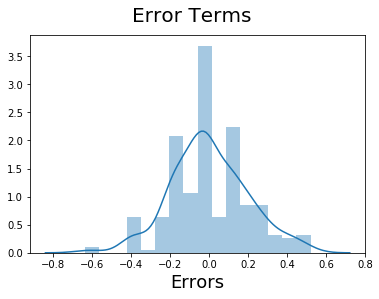

In [3458]:

# Testing Error Rate
y_train_pred = lr1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions 

In [3459]:
X_test=x_cv
y_test=y_cv

In [3460]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)



In [3461]:
# Making predictions
y_pred = lr1.predict(X_test_new)
y_pred

116    0.032362
310    0.552893
14    -0.667274
180    0.053828
76    -0.227142
165    0.845025
11     0.195251
302    0.788915
191    0.717840
39    -2.014262
222   -0.024085
306    0.552893
147    0.450677
19    -0.532392
296    0.807588
75    -0.227142
215   -0.043296
99    -0.412486
181    0.053828
95    -0.055944
27    -0.737031
285    1.070155
312    0.506245
2     -1.968279
150    0.450677
303    0.788915
162    1.085831
221   -0.024440
341   -1.888035
309    0.552893
         ...   
23    -0.532392
177    0.120675
144    0.496084
212    0.866642
320   -0.410536
261    2.092864
247    0.150490
234    0.026066
291    0.917501
129   -0.045702
176    0.120675
192    0.717840
230    0.026066
18    -0.619405
33    -2.013938
152    0.299185
55    -0.694486
49    -0.920074
85     0.217133
36    -2.013938
40    -1.882184
327   -1.967301
317    0.247896
266    0.290976
275    0.666394
121    0.167764
17    -0.667274
189    0.717840
318    0.247896
69    -0.618861
Length: 87, dtype: float

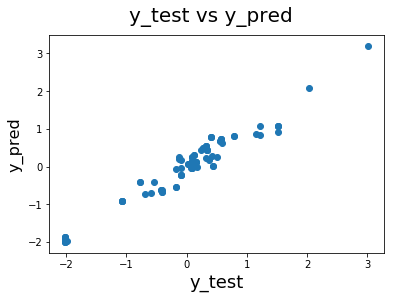

In [3462]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3463]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9477835026730429

In [3464]:

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))


0.22071415669749747

### Elasticity - Game Accessory - Koyck Model

In [3465]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)



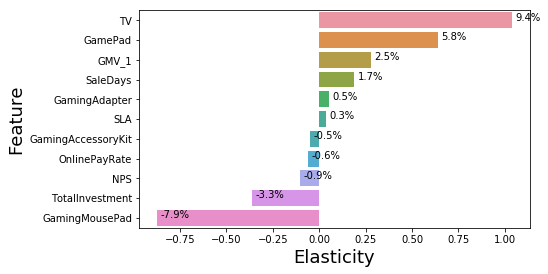

In [3466]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

##Koyck Home Audio Model Building

In [3467]:
ConsumerElectronic_Koyck_HomeAudio['GMV_1']=ConsumerElectronic_Koyck_HomeAudio['GMV'].shift(-1)
ConsumerElectronic_Koyck_HomeAudio=ConsumerElectronic_Koyck_HomeAudio.fillna(0)


In [3468]:
#column names
names = ConsumerElectronic_Koyck_HomeAudio.columns

In [3469]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'BoomBox', 'DJController', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'KaraokePlayer', 'SlingBox',
       'SoundMixer', 'VoiceRecorder', 'SLA', 'MRP', 'ProcurementSLA', 'GMV',
       'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays',
       'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day', 'DataQuality',
       'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain', 'TotalSnow',
       'SnowonGrnd', 'GMV_1'],
      dtype='object')


In [3470]:

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [3471]:
scaled_homeaudio = scaler.fit_transform(ConsumerElectronic_Koyck_HomeAudio)
scaled_homeaudio = pd.DataFrame(scaled_homeaudio, columns=names)


In [3472]:
X=scaled_homeaudio.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_homeaudio.GMV)


In [3473]:

result = stepwise_selection(x_train,y_train)
print('Home Audio Features:')
print(result)


Add  VoiceRecorder                  with p-value 1.29116e-189
Add  discountprice                  with p-value 5.34056e-48
Add  DJController                   with p-value 1.9021e-08
Add  TotalInvestment                with p-value 3.52362e-09
Add  SaleDays                       with p-value 6.94285e-07
Add  TV                             with p-value 3.41992e-05
Add  Day                            with p-value 6.43131e-05
Add  NPS                            with p-value 0.000552156
Add  Year                           with p-value 0.00494444
Add  Month                          with p-value 0.00019231
Home Audio Features:
['VoiceRecorder', 'discountprice', 'DJController', 'TotalInvestment', 'SaleDays', 'TV', 'Day', 'NPS', 'Year', 'Month']


In [3474]:
print(result)

['VoiceRecorder', 'discountprice', 'DJController', 'TotalInvestment', 'SaleDays', 'TV', 'Day', 'NPS', 'Year', 'Month']


In [3475]:
import statsmodels.api as sm
# build simple simple lenier model

#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params
# View summary
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3933.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.03e-252
Time:                        22:28:31   Log-Likelihood:                 284.57
No. Observations:                 243   AIC:                            -547.1
Df Residuals:                     232   BIC:                            -508.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003      0.005     

Text(0.5, 0, 'Errors')

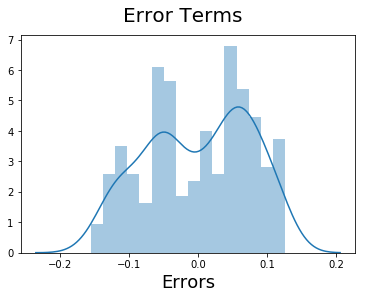

In [3476]:

# Testing Error Rate
y_train_pred = lr1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 



## Making predictions

In [3477]:
X_test=x_cv
y_test=y_cv

In [3478]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)


In [3479]:
# Making predictions
y_pred = lr1.predict(X_test_new)
y_pred


188    0.907375
241   -0.489969
263    0.459201
319   -0.436596
224   -0.309702
304   -0.497043
322   -1.034009
209    0.728246
251   -1.134147
270   -0.297738
75     0.519224
53    -0.833049
28    -0.511265
320   -1.039946
73     0.249990
294   -0.507734
313   -0.454406
160    0.519205
220   -0.114367
246   -0.662284
1     -1.671561
27    -0.514234
58    -0.296513
31    -0.581996
187    0.904407
282   -0.423343
119    0.897855
44    -1.694669
302   -0.502979
312   -0.469811
         ...   
85     1.144823
196    0.108257
46    -1.688732
247   -0.659315
179    0.833577
192    0.919249
244   -0.668220
141    0.162683
51    -0.838986
250   -1.137116
197    0.111226
86     1.147791
66     4.993752
261    0.529931
45    -1.691700
25     0.021818
232   -0.325736
125   -0.010086
176    0.824672
169   -0.070544
55    -0.305418
17     0.140004
57    -0.299481
42    -1.700605
300   -0.508916
108   -0.346257
206   -0.081244
70     0.241085
203   -0.090150
168   -0.073513
Length: 81, dtype: float

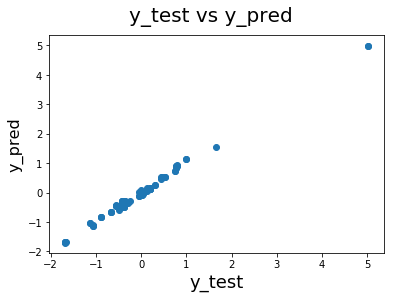

In [3480]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3481]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9947419297897154

In [3482]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.07667833435650663

### Elasticity - Home Audio - Koyck Model

In [3483]:
coefficients_df = pd.DataFrame(pd.DataFrame(lr1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)


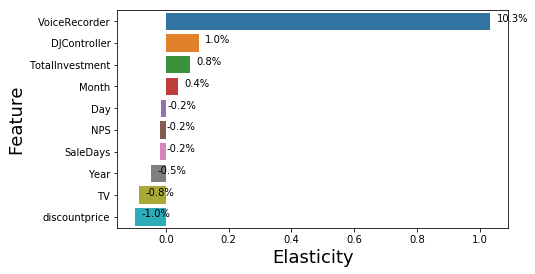

In [3484]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Distributed Lag Model

##Splitting the Data into Training and Testing Sets

In [3485]:
ConsumerElectronic_DistributedLag_Camera['GMV_1']=ConsumerElectronic_DistributedLag_Camera['GMV'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['GMV_2']=ConsumerElectronic_DistributedLag_Camera['GMV'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['GMV_3']=ConsumerElectronic_DistributedLag_Camera['GMV'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['discountprice_1']=ConsumerElectronic_DistributedLag_Camera['discountprice'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['discountprice_2']=ConsumerElectronic_DistributedLag_Camera['discountprice'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['discountprice_3']=ConsumerElectronic_DistributedLag_Camera['discountprice'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['SLA_1']=ConsumerElectronic_DistributedLag_Camera['SLA'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['SLA_2']=ConsumerElectronic_DistributedLag_Camera['SLA'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['SLA_3']=ConsumerElectronic_DistributedLag_Camera['SLA'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['OnlinePayRate_1']=ConsumerElectronic_DistributedLag_Camera['OnlinePayRate'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['OnlinePayRate_2']=ConsumerElectronic_DistributedLag_Camera['OnlinePayRate'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['OnlinePayRate_3']=ConsumerElectronic_DistributedLag_Camera['OnlinePayRate'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['NPS_1']=ConsumerElectronic_DistributedLag_Camera['NPS'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['NPS_2']=ConsumerElectronic_DistributedLag_Camera['NPS'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['NPS_3']=ConsumerElectronic_DistributedLag_Camera['NPS'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['ProcurementSLA_1']=ConsumerElectronic_DistributedLag_Camera['ProcurementSLA'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['ProcurementSLA_2']=ConsumerElectronic_DistributedLag_Camera['ProcurementSLA'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['ProcurementSLA_3']=ConsumerElectronic_DistributedLag_Camera['ProcurementSLA'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['HoliDays_1']=ConsumerElectronic_DistributedLag_Camera['HoliDays'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['HoliDays_2']=ConsumerElectronic_DistributedLag_Camera['HoliDays'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['HoliDays_3']=ConsumerElectronic_DistributedLag_Camera['HoliDays'].shift(-3)

ConsumerElectronic_DistributedLag_Camera['MRP_1']=ConsumerElectronic_DistributedLag_Camera['MRP'].shift(-1)
ConsumerElectronic_DistributedLag_Camera['MRP_2']=ConsumerElectronic_DistributedLag_Camera['MRP'].shift(-2)
ConsumerElectronic_DistributedLag_Camera['MRP_3']=ConsumerElectronic_DistributedLag_Camera['MRP'].shift(-3)

ConsumerElectronic_DistributedLag_Camera=ConsumerElectronic_DistributedLag_Camera.fillna(0)

In [3486]:
#column names
names = ConsumerElectronic_DistributedLag_Camera.columns

In [3487]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Teleconverter', 'Telescope', 'SLA', 'MRP', 'ProcurementSLA',
       'GMV', 'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays',
       'SaleDays', 'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day',
       'DataQuality', 'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain',
       'TotalSnow', 'SnowonGrnd', 'GMV_1', 'GMV_2', 'GMV_3', 'discountprice_1',
       'discountprice_2', 'discountprice_3', 'SLA_1', 'SLA_2', 'SLA_3',
       'OnlinePayRate_1', 'OnlinePayRate_2', 'O

In [3488]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


In [3489]:
scaled_camera = scaler.fit_transform(ConsumerElectronic_DistributedLag_Camera)
scaled_camera = pd.DataFrame(scaled_camera, columns=names)


In [3490]:
X=scaled_camera.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_camera.GMV)



## Stepwise selection

In [3491]:
	
result = stepwise_selection(x_train,y_train)
print('Camera Features:')
print(result)


Add  Strap                          with p-value 1.78567e-120
Add  CameraMount                    with p-value 5.0404e-31
Add  cumulative_movingavg_discountprice with p-value 5.33264e-23
Add  GMV_1                          with p-value 6.22061e-12
Add  Softbox                        with p-value 4.11426e-10
Add  Units                          with p-value 1.02707e-09
Add  HoliDays_3                     with p-value 3.7719e-09
Add  CameraBatteryCharger           with p-value 1.81938e-07
Add  Telescope                      with p-value 3.28789e-09
Add  Teleconverter                  with p-value 7.93053e-08
Add  CameraBattery                  with p-value 3.39967e-07
Add  TotalInvestment                with p-value 0.000188577
Drop CameraBatteryCharger           with p-value 0.0991566
Add  CameraEyeCup                   with p-value 1.10588e-05
Add  ReflectorUmbrella              with p-value 2.07396e-05
Add  Day                            with p-value 0.00174195
Add  NPS_3              

In [3492]:


import statsmodels.api as sm
# build simple simple lenier model

#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lrcamera1 = sm.OLS(y_train, X_train_lm).fit()
lrcamera1.params
# View summary
print(lrcamera1.summary())


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1413.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.68e-222
Time:                        22:28:46   Log-Likelihood:                 206.50
No. Observations:                 253   AIC:                            -381.0
Df Residuals:                     237   BIC:                            -324.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Text(0.5, 0, 'Errors')

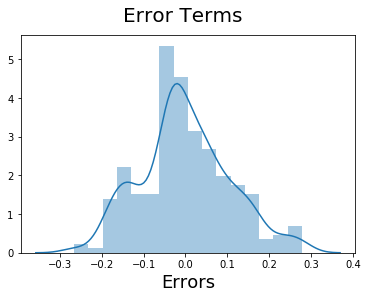

In [3493]:

# Testing Error Rate
y_train_pred = lrcamera1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 




## Making predictions

In [3494]:
X_test=x_cv
y_test=y_cv

In [3495]:

# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)

In [3496]:
# Making predictions
y_pred = lrcamera1.predict(X_test_new)
y_pred

104    0.071696
182    0.009333
211    0.385277
279    0.421903
334   -1.064430
142    0.287925
6     -0.323687
246    0.345463
125    0.199214
54    -2.057305
294    0.352681
234   -0.316161
270   -0.712018
277    1.721241
88     0.038016
171   -0.079611
62    -1.034029
31    -0.869250
262   -0.321057
285    0.402714
120   -0.056024
304    1.320119
268   -0.872430
112   -0.190629
89     0.055613
72    -0.326760
250    0.312370
319    0.101767
226    1.328548
98     0.446861
         ...   
5     -0.326098
85     0.008770
202    0.663778
48    -2.087449
141    0.226045
174    0.630152
69    -0.375244
190    0.292974
34    -2.137771
45    -2.038020
291    0.429788
55    -2.054895
97     0.444451
200    0.019957
180    0.004511
46    -2.034843
52    -2.077886
293    0.350270
137    0.499653
130    0.226855
146    0.904079
231   -0.380375
122   -0.048083
176    0.634974
264   -0.883193
201    0.661367
107    0.078928
181    0.006922
152    0.342750
196   -0.088829
Length: 85, dtype: float

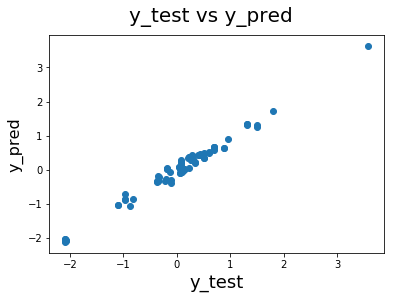

In [3497]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3498]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9844864687467373

In [3499]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.11785900776086523


### Elasticity - Camera Accessory - Distributed Model

In [3500]:
coefficients_df = pd.DataFrame(pd.DataFrame(lrcamera1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)



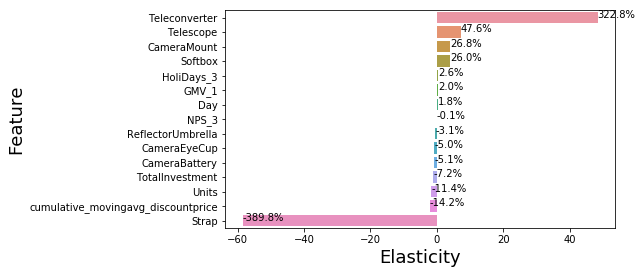

In [3501]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Distributed Game Accessory Model

In [3502]:

ConsumerElectronic_DistributedLag_Game['GMV_1']=ConsumerElectronic_DistributedLag_Game['GMV'].shift(-1)
ConsumerElectronic_DistributedLag_Game['GMV_2']=ConsumerElectronic_DistributedLag_Game['GMV'].shift(-2)
ConsumerElectronic_DistributedLag_Game['GMV_3']=ConsumerElectronic_DistributedLag_Game['GMV'].shift(-3)

ConsumerElectronic_DistributedLag_Game['discountprice_1']=ConsumerElectronic_DistributedLag_Game['discountprice'].shift(-1)
ConsumerElectronic_DistributedLag_Game['discountprice_2']=ConsumerElectronic_DistributedLag_Game['discountprice'].shift(-2)
ConsumerElectronic_DistributedLag_Game['discountprice_3']=ConsumerElectronic_DistributedLag_Game['discountprice'].shift(-3)

ConsumerElectronic_DistributedLag_Game['SLA_1']=ConsumerElectronic_DistributedLag_Game['SLA'].shift(-1)
ConsumerElectronic_DistributedLag_Game['SLA_2']=ConsumerElectronic_DistributedLag_Game['SLA'].shift(-2)
ConsumerElectronic_DistributedLag_Game['SLA_3']=ConsumerElectronic_DistributedLag_Game['SLA'].shift(-3)

ConsumerElectronic_DistributedLag_Game['OnlinePayRate_1']=ConsumerElectronic_DistributedLag_Game['OnlinePayRate'].shift(-1)
ConsumerElectronic_DistributedLag_Game['OnlinePayRate_2']=ConsumerElectronic_DistributedLag_Game['OnlinePayRate'].shift(-2)
ConsumerElectronic_DistributedLag_Game['OnlinePayRate_3']=ConsumerElectronic_DistributedLag_Game['OnlinePayRate'].shift(-3)

ConsumerElectronic_DistributedLag_Game['NPS_1']=ConsumerElectronic_DistributedLag_Game['NPS'].shift(-1)
ConsumerElectronic_DistributedLag_Game['NPS_2']=ConsumerElectronic_DistributedLag_Game['NPS'].shift(-2)
ConsumerElectronic_DistributedLag_Game['NPS_3']=ConsumerElectronic_DistributedLag_Game['NPS'].shift(-3)

ConsumerElectronic_DistributedLag_Game['ProcurementSLA_1']=ConsumerElectronic_DistributedLag_Game['ProcurementSLA'].shift(-1)
ConsumerElectronic_DistributedLag_Game['ProcurementSLA_2']=ConsumerElectronic_DistributedLag_Game['ProcurementSLA'].shift(-2)
ConsumerElectronic_DistributedLag_Game['ProcurementSLA_3']=ConsumerElectronic_DistributedLag_Game['ProcurementSLA'].shift(-3)

ConsumerElectronic_DistributedLag_Game['HoliDays_1']=ConsumerElectronic_DistributedLag_Game['HoliDays'].shift(-1)
ConsumerElectronic_DistributedLag_Game['HoliDays_2']=ConsumerElectronic_DistributedLag_Game['HoliDays'].shift(-2)
ConsumerElectronic_DistributedLag_Game['HoliDays_3']=ConsumerElectronic_DistributedLag_Game['HoliDays'].shift(-3)

ConsumerElectronic_DistributedLag_Game['MRP_1']=ConsumerElectronic_DistributedLag_Game['MRP'].shift(-1)
ConsumerElectronic_DistributedLag_Game['MRP_2']=ConsumerElectronic_DistributedLag_Game['MRP'].shift(-2)
ConsumerElectronic_DistributedLag_Game['MRP_3']=ConsumerElectronic_DistributedLag_Game['MRP'].shift(-3)

ConsumerElectronic_DistributedLag_Game=ConsumerElectronic_DistributedLag_Game.fillna(0)


In [3503]:
#column names
names = ConsumerElectronic_DistributedLag_Game.columns


In [3504]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'SLA', 'MRP', 'ProcurementSLA', 'GMV',
       'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays',
       'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day', 'DataQuality',
       'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain', 'TotalSnow',
       'SnowonGrnd', 'GMV_1', 'GMV_2', 'GMV_3', 'discountprice_1',
       'discountprice_2', 'discountprice_3', 'SLA_1', 'SLA_2', 'SLA_3',
       'OnlinePayRate_1', 'OnlinePayRate_2', 'OnlinePayRate_3', 'NPS_1',
       'NPS_2', 'NPS_3', 'ProcurementSLA_1', 'ProcurementSLA_2',
     

In [3505]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


In [3506]:

scaled_game = scaler.fit_transform(ConsumerElectronic_DistributedLag_Game)
scaled_game = pd.DataFrame(scaled_game, columns=names)


In [3507]:
X=scaled_game.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_game.GMV)



In [3508]:

result = stepwise_selection(x_train,y_train)
print('Game Features:')
print(result)


Add  GMV_1                          with p-value 2.47418e-121
Add  GamingChargingStation          with p-value 2.92472e-17
Add  Year                           with p-value 1.40806e-10
Add  GamingHeadset                  with p-value 3.54331e-05
Add  GamingKeyboard                 with p-value 9.71689e-09
Add  Month                          with p-value 3.1095e-06
Add  Day                            with p-value 0.000165963
Add  ProcurementSLA_1               with p-value 8.09697e-05
Add  MRP_1                          with p-value 0.00134439
Game Features:
['GMV_1', 'GamingChargingStation', 'Year', 'GamingHeadset', 'GamingKeyboard', 'Month', 'Day', 'ProcurementSLA_1', 'MRP_1']


In [3509]:

import statsmodels.api as sm
# build simple simple lenier model
#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lrgame1 = sm.OLS(y_train, X_train_lm).fit()
lrgame1.params
# View summary
print(lrgame1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     546.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          5.41e-158
Time:                        22:28:55   Log-Likelihood:                 29.493
No. Observations:                 258   AIC:                            -38.99
Df Residuals:                     248   BIC:                            -3.456
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

Text(0.5, 0, 'Errors')

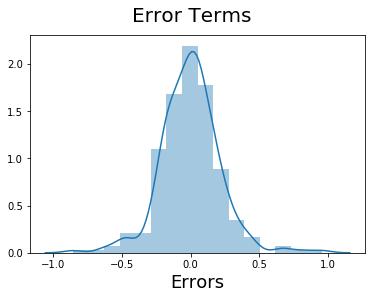

In [3510]:

# Testing Error Rate
y_train_pred = lrgame1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 


## Making predictions

In [3511]:
X_test=x_cv
y_test=y_cv

In [3512]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)


In [3513]:

## Making predictions
y_pred = lrgame1.predict(X_test_new)
y_pred

6      0.041214
338   -1.735881
69    -0.504059
277    0.672407
336   -2.044117
116    0.012640
30    -0.809105
60     0.988350
50    -1.087242
0     -2.369511
20    -0.319130
217    0.064049
326   -1.835172
239    0.290571
223    0.043395
33    -1.752363
281    0.726144
271    0.613848
220    0.082786
255   -0.570626
189    0.741975
163    0.930753
226    0.062131
238    0.284325
103   -0.050176
76    -0.148848
258    1.692022
44    -1.998498
75    -0.155093
57    -0.628834
         ...   
99    -0.604650
268    0.378184
84     0.108178
90    -0.261349
216    0.057803
117    0.291285
182    0.031085
136    0.745862
63     3.472704
18    -0.461614
344   -2.226978
124   -0.044891
77    -0.142602
296    0.940356
293    1.083679
169    0.256333
23    -0.300393
100   -0.598405
264    0.353202
13    -0.630972
342   -1.710899
24    -0.294147
166    0.237596
10     0.066196
55    -0.641325
186    0.276028
145    0.265350
101   -0.592159
194    0.303430
256    1.015645
Length: 87, dtype: float

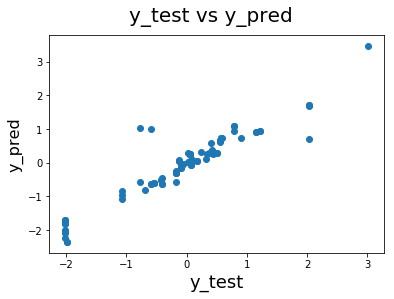

In [3514]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3515]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8888134663491614

In [3516]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.34557374921071643

### Elasticity - Game Accessory - Distributed Model

In [3517]:
coefficients_df = pd.DataFrame(pd.DataFrame(lrgame1.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)



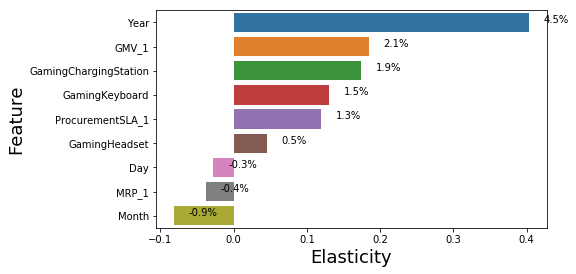

In [3518]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Distributed Home Audio Model

In [3519]:

ConsumerElectronic_DistributedLag_HomeAudio['GMV_1']=ConsumerElectronic_DistributedLag_HomeAudio['GMV'].shift(-1)
ConsumerElectronic_DistributedLag_HomeAudio['GMV_2']=ConsumerElectronic_DistributedLag_HomeAudio['GMV'].shift(-2)
ConsumerElectronic_DistributedLag_HomeAudio['GMV_3']=ConsumerElectronic_DistributedLag_HomeAudio['GMV'].shift(-3)


ConsumerElectronic_DistributedLag_HomeAudio['discountprice_1']=ConsumerElectronic_DistributedLag_HomeAudio['discountprice'].shift(-1)
ConsumerElectronic_DistributedLag_HomeAudio['discountprice_2']=ConsumerElectronic_DistributedLag_HomeAudio['discountprice'].shift(-2)
ConsumerElectronic_DistributedLag_HomeAudio['discountprice_3']=ConsumerElectronic_DistributedLag_HomeAudio['discountprice'].shift(-3)

ConsumerElectronic_DistributedLag_HomeAudio['SLA_1']=ConsumerElectronic_DistributedLag_HomeAudio['SLA'].shift(-1)
ConsumerElectronic_DistributedLag_HomeAudio['SLA_2']=ConsumerElectronic_DistributedLag_HomeAudio['SLA'].shift(-2)
ConsumerElectronic_DistributedLag_HomeAudio['SLA_3']=ConsumerElectronic_DistributedLag_HomeAudio['SLA'].shift(-3)

ConsumerElectronic_DistributedLag_HomeAudio['OnlinePayRate_1']=ConsumerElectronic_DistributedLag_HomeAudio['OnlinePayRate'].shift(-1)
ConsumerElectronic_DistributedLag_HomeAudio['OnlinePayRate_2']=ConsumerElectronic_DistributedLag_HomeAudio['OnlinePayRate'].shift(-2)
ConsumerElectronic_DistributedLag_HomeAudio['OnlinePayRate_3']=ConsumerElectronic_DistributedLag_HomeAudio['OnlinePayRate'].shift(-3)

ConsumerElectronic_DistributedLag_HomeAudio['NPS_1']=ConsumerElectronic_DistributedLag_HomeAudio['NPS'].shift(-1)
ConsumerElectronic_DistributedLag_HomeAudio['NPS_2']=ConsumerElectronic_DistributedLag_HomeAudio['NPS'].shift(-2)
ConsumerElectronic_DistributedLag_HomeAudio['NPS_3']=ConsumerElectronic_DistributedLag_HomeAudio['NPS'].shift(-3)

ConsumerElectronic_DistributedLag_HomeAudio['ProcurementSLA_1']=ConsumerElectronic_DistributedLag_HomeAudio['ProcurementSLA'].shift(-1)
ConsumerElectronic_DistributedLag_HomeAudio['ProcurementSLA_2']=ConsumerElectronic_DistributedLag_HomeAudio['ProcurementSLA'].shift(-2)
ConsumerElectronic_DistributedLag_HomeAudio['ProcurementSLA_3']=ConsumerElectronic_DistributedLag_HomeAudio['ProcurementSLA'].shift(-3)

ConsumerElectronic_DistributedLag_HomeAudio['HoliDays_1']=ConsumerElectronic_DistributedLag_HomeAudio['HoliDays'].shift(-1)
ConsumerElectronic_DistributedLag_HomeAudio['HoliDays_2']=ConsumerElectronic_DistributedLag_HomeAudio['HoliDays'].shift(-2)
ConsumerElectronic_DistributedLag_HomeAudio['HoliDays_3']=ConsumerElectronic_DistributedLag_HomeAudio['HoliDays'].shift(-3)

ConsumerElectronic_DistributedLag_HomeAudio['MRP_1']=ConsumerElectronic_DistributedLag_HomeAudio['MRP'].shift(-1)
ConsumerElectronic_DistributedLag_HomeAudio['MRP_2']=ConsumerElectronic_DistributedLag_HomeAudio['MRP'].shift(-2)
ConsumerElectronic_DistributedLag_HomeAudio['MRP_3']=ConsumerElectronic_DistributedLag_HomeAudio['MRP'].shift(-3)

ConsumerElectronic_DistributedLag_HomeAudio=ConsumerElectronic_DistributedLag_HomeAudio.fillna(0)

In [3520]:

#column names
names = ConsumerElectronic_DistributedLag_HomeAudio.columns

In [3521]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'BoomBox', 'DJController', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'KaraokePlayer', 'SlingBox',
       'SoundMixer', 'VoiceRecorder', 'SLA', 'MRP', 'ProcurementSLA', 'GMV',
       'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays',
       'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day', 'DataQuality',
       'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain', 'TotalSnow',
       'SnowonGrnd', 'GMV_1', 'GMV_2', 'GMV_3', 'discountprice_1',
       'discountprice_2', 'discountprice_3', 'SLA_1', 'SLA_2', 'SLA_3',
       'OnlinePayRate_1', 'OnlinePayRate_2', 'OnlinePayRate_3', 'NPS_1',
       'NPS_2', 'NPS_3', 'ProcurementSLA_1', 'ProcurementSLA_2',
       'ProcurementSLA_3', 'HoliDays_1', 'HoliDays_2', 'HoliDays_3', 'MRP_1',
       'MRP_2', 'MRP_3'],
      dtype='object')


In [3522]:

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [3523]:
scaled_game = scaler.fit_transform(ConsumerElectronic_DistributedLag_HomeAudio)
scaled_game = pd.DataFrame(scaled_game, columns=names)

In [3524]:
X=scaled_game.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_game.GMV)

In [3525]:
	
result = stepwise_selection(x_train,y_train)
print('Home Audio Features:')
print(result)

Add  VoiceRecorder                  with p-value 3.85443e-190
Add  discountprice                  with p-value 1.14953e-45
Add  TotalInvestment                with p-value 8.77207e-08
Add  DJController                   with p-value 1.37927e-08
Add  SaleDays                       with p-value 1.10831e-06
Add  TV                             with p-value 1.44627e-06
Add  Day                            with p-value 2.29183e-07
Add  NPS                            with p-value 5.25735e-06
Add  Year                           with p-value 3.22709e-05
Add  OnlineMarketing                with p-value 0.00986959
Add  MRP                            with p-value 0.00922007
Add  NPS_3                          with p-value 0.00856999
Add  SnowonGrnd                     with p-value 0.00869672
Home Audio Features:
['VoiceRecorder', 'discountprice', 'TotalInvestment', 'DJController', 'SaleDays', 'TV', 'Day', 'NPS', 'Year', 'OnlineMarketing', 'MRP', 'NPS_3', 'SnowonGrnd']


In [3526]:

import statsmodels.api as sm
# build simple simple lenier model

#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lrhaudio = sm.OLS(y_train, X_train_lm).fit()
lrhaudio.params
# View summary
print(lrhaudio.summary())


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3459.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.28e-254
Time:                        22:29:04   Log-Likelihood:                 299.70
No. Observations:                 243   AIC:                            -571.4
Df Residuals:                     229   BIC:                            -522.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0003      0.005     

## Making predictions

In [3527]:
X_test=x_cv
y_test=y_cv

In [3528]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)



In [3529]:
## Making predictions
y_pred = lrhaudio.predict(X_test_new)
y_pred

48    -0.731689
178    0.815948
175    0.806403
196    0.111105
195    0.107923
221   -0.066432
162    0.560211
174    0.803222
311   -0.487999
241   -0.497954
254   -1.114083
49    -0.728508
245   -0.658075
70     0.252360
19     0.006617
66     5.006995
305   -0.496487
204   -0.065481
231   -0.304158
132    1.557673
185    0.114222
93     0.103595
228   -0.255838
76     0.536402
105   -0.383060
224   -0.272086
192    0.916888
138    0.107710
249   -0.645349
128   -0.037636
         ...   
313   -0.470776
322   -1.166053
40    -1.702525
282   -0.445829
257    0.495955
90     0.094050
129   -0.034454
193    0.920069
247   -0.651712
13     0.135584
160    0.553848
95     0.109958
259    0.502318
173    0.800040
276   -0.307360
291   -0.303545
38    -1.612159
270   -0.314117
63     4.997450
101   -0.411923
239   -0.504317
163    0.563392
109   -0.373087
200    0.120815
79     0.552101
112   -0.133188
304   -0.499668
44    -1.696603
188    0.904162
214    0.771411
Length: 81, dtype: float

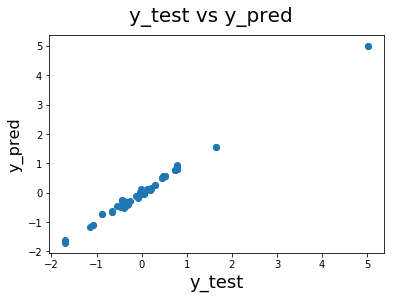

In [3530]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3531]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9935826313028515

In [3532]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.08177978257742223

### Elasticity - Home Audio - Distributed Model

In [3533]:
coefficients_df = pd.DataFrame(pd.DataFrame(lrhaudio.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)


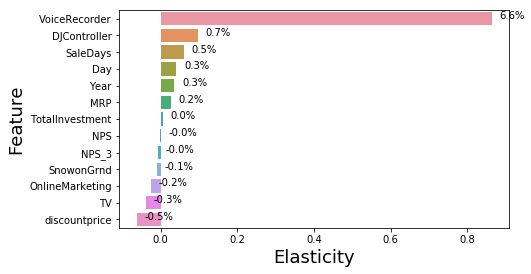

In [3534]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Exponential / Multiplicative Model

In [3535]:
ConsumerElectronic_Exponential_Camera = WL_camera
ConsumerElectronic_Exponential_Camera=np.log(ConsumerElectronic_Exponential_Camera)
ConsumerElectronic_Exponential_Camera=ConsumerElectronic_Exponential_Camera.fillna(0)
ConsumerElectronic_Exponential_Camera=ConsumerElectronic_Exponential_Camera.replace([np.inf,-np.inf],0)

In [3536]:
#column names
names = ConsumerElectronic_Exponential_Camera.columns

In [3537]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'Binoculars', 'CameraAccessory', 'CameraBag', 'CameraBattery',
       'CameraBatteryCharger', 'CameraBatteryGrip', 'CameraEyeCup',
       'CameraFilmRolls', 'CameraHousing', 'CameraMicrophone', 'CameraMount',
       'CameraRemoteControl', 'CameraTripod', 'ExtensionTube', 'Filter',
       'Flash', 'FlashShoeAdapter', 'Lens', 'ReflectorUmbrella', 'Softbox',
       'Strap', 'Teleconverter', 'Telescope', 'SLA', 'MRP', 'ProcurementSLA',
       'GMV', 'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays',
       'SaleDays', 'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day',
       'DataQuality', 'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain',
       'TotalSnow', 'SnowonGrnd', 'GMV_1', 'GMV_2', 'GMV_3', 'discountprice_1',
       'discountprice_2', 'discountprice_3', 'SLA_1', 'SLA_2', 'SLA_3',
       'OnlinePayRate_1', 'OnlinePayRate_2', 'O

In [3538]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [3539]:
scaled_camera = scaler.fit_transform(ConsumerElectronic_Exponential_Camera)
scaled_camera = pd.DataFrame(scaled_camera, columns=names)

In [3540]:
X=scaled_camera.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_camera.GMV)

In [3541]:
	
result = stepwise_selection(x_train,y_train)
print('Camera Features:')
print(result)


Add  Teleconverter                  with p-value 1.77095e-178
Add  SLA                            with p-value 2.9706e-178
Add  ProcurementSLA                 with p-value 6.41368e-24
Add  OnlinePayRate                  with p-value 1.74865e-18
Add  OnlinePayRate_3                with p-value 1.30627e-12
Add  cumulative_movingavg_gmv       with p-value 1.63457e-09
Add  CameraMount                    with p-value 9.08801e-09
Add  CameraBag                      with p-value 3.51677e-10
Add  cumulative_movingavg_discountprice with p-value 1.70609e-07
Add  CameraFilmRolls                with p-value 2.83865e-05
Add  NPS                            with p-value 4.91641e-11
Drop CameraBag                      with p-value 0.738098
Add  Display_Price_ending_with_99   with p-value 1.58279e-11
Add  Telescope                      with p-value 1.48458e-11
Add  MRP                            with p-value 3.22074e-12
Add  Month                          with p-value 4.50191e-06
Add  NPS_3            

In [3542]:

import statsmodels.api as sm
# build simple simple lenier model

#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lrecamera = sm.OLS(y_train, X_train_lm).fit()
lrecamera.params
# View summary
print(lrecamera.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.269e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:29:23   Log-Likelihood:                 821.57
No. Observations:                 253   AIC:                            -1599.
Df Residuals:                     231   BIC:                            -1521.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Text(0.5, 0, 'Errors')

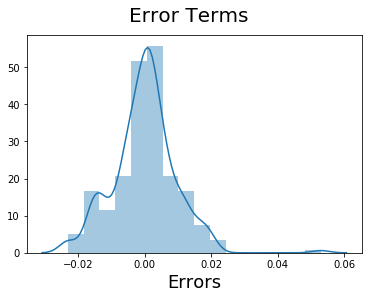

In [3543]:

# Testing Error Rate
y_train_pred = lrecamera.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 


## Making predictions

In [3544]:
X_test=x_cv
y_test=y_cv


In [3545]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)


In [3546]:

## Making predictions
y_pred = lrecamera.predict(X_test_new)
y_pred

275    0.560449
239    0.282899
310    0.309112
258    0.251997
3     -2.073652
278    0.363207
174    0.439742
141    0.304768
166    0.260668
11     0.228252
134    0.389302
87     0.251668
64    -0.024489
277    0.557009
24     0.265488
86     0.251668
132    0.389302
200    0.297934
309    0.319033
35    -3.129401
279    0.363207
255    0.349544
57    -3.517625
46    -3.811754
302    0.529707
251    0.349544
290    0.368558
172    0.260668
9      0.223183
15     0.258532
         ...   
30     0.080170
167    0.260668
118    0.305458
280    0.363207
253    0.349544
33    -3.136544
61    -0.013480
321    0.294909
226    0.497522
307    0.312215
218    0.306823
99     0.376571
66    -0.024489
311    0.314095
192    0.356728
21     0.260007
77     0.720712
42    -3.827170
213    0.332882
204    0.424721
180    0.335200
140    0.304768
187    0.356728
121    0.305815
272    0.559084
243    0.327802
165    0.314236
131    0.389302
69     0.210287
96     0.376571
Length: 85, dtype: float

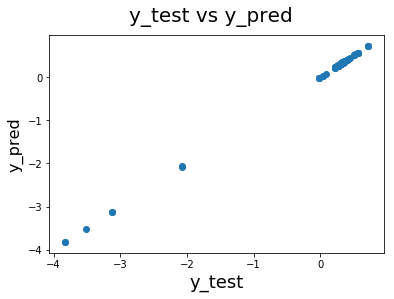

In [3547]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3548]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9999306213661523

In [3549]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.00805350790362633


### Elasticity - Camera Accessory - Exponential Model

In [3550]:
coefficients_df = pd.DataFrame(pd.DataFrame(lrecamera.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)


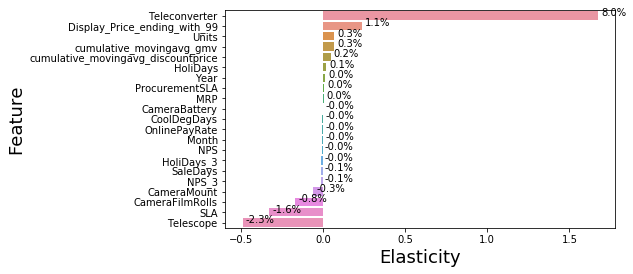

In [3551]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Exponential Game Accessory Model

In [3552]:
ConsumerElectronic_Exponential_Game = WL_Game
ConsumerElectronic_Exponential_Game=np.log(ConsumerElectronic_Exponential_Game)
ConsumerElectronic_Exponential_Game=ConsumerElectronic_Exponential_Game.fillna(0)
ConsumerElectronic_Exponential_Game=ConsumerElectronic_Exponential_Game.replace([np.inf,-np.inf],0)

In [3553]:
#column names
names = ConsumerElectronic_Exponential_Game.columns

In [3554]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'CoolingPad', 'GameControlMount', 'GamePad', 'GamingAccessoryKit',
       'GamingAdapter', 'GamingChargingStation', 'GamingHeadset',
       'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse', 'GamingMousePad',
       'GamingSpeaker', 'JoystickGamingWheel', 'MotionController',
       'TVOutCableAccessory', 'SLA', 'MRP', 'ProcurementSLA', 'GMV',
       'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays',
       'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day', 'DataQuality',
       'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain', 'TotalSnow',
       'SnowonGrnd', 'GMV_1', 'GMV_2', 'GMV_3', 'discountprice_1',
       'discountprice_2', 'discountprice_3', 'SLA_1', 'SLA_2', 'SLA_3',
       'OnlinePayRate_1', 'OnlinePayRate_2', 'OnlinePayRate_3', 'NPS_1',
       'NPS_2', 'NPS_3', 'ProcurementSLA_1', 'ProcurementSLA_2',
     

In [3555]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaled_game = scaler.fit_transform(ConsumerElectronic_Exponential_Game)
scaled_game = pd.DataFrame(scaled_game, columns=names)

In [3556]:
X=scaled_game.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_game.GMV)


In [3557]:
result = stepwise_selection(x_train,y_train)
print('Game Features:')
print(result)


Add  GamingChargingStation          with p-value 4.35764e-173
Add  GMV_1                          with p-value 1.42587e-34
Add  SLA                            with p-value 7.13994e-15
Add  Year                           with p-value 1.81372e-12
Add  SLA_1                          with p-value 4.09366e-07
Add  NPS_1                          with p-value 9.202e-08
Add  GamePad                        with p-value 2.22023e-06
Drop Year                           with p-value 0.0601894
Add  NPS                            with p-value 6.03128e-08
Add  SaleDays                       with p-value 7.10416e-06
Add  ProcurementSLA                 with p-value 0.000864075
Add  ProcurementSLA_1               with p-value 0.000472328
Add  OnlineMarketing                with p-value 0.00255907
Add  OnlinePayRate_1                with p-value 0.00182487
Add  OnlinePayRate                  with p-value 2.67716e-13
Drop NPS                            with p-value 0.0755827
Game Features:
['GamingCharging

In [3558]:


import statsmodels.api as sm
# build simple simple lenier model

#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lregame = sm.OLS(y_train, X_train_lm).fit()
lregame.params
# View summary
print(lregame.summary())



                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2925.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          7.85e-257
Time:                        22:29:34   Log-Likelihood:                 267.01
No. Observations:                 258   AIC:                            -508.0
Df Residuals:                     245   BIC:                            -461.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

Text(0.5, 0, 'Errors')

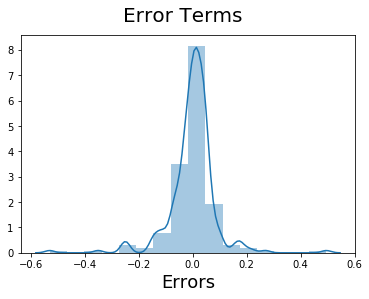

In [3559]:

# Testing Error Rate
y_train_pred = lregame.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 


## Making predictions

In [3560]:

X_test=x_cv
y_test=y_cv


In [3561]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)


In [3562]:

## Making predictions
y_pred = lregame.predict(X_test_new)
y_pred

100    0.153709
28     0.293965
149    0.441845
104    0.375806
50    -0.037674
5      0.370516
189    0.527787
185    0.323550
66     0.930276
247    0.324101
323   -1.224392
32    -0.607812
110    0.311406
92     0.242037
285    0.549798
146    0.441845
2     -1.553014
191    0.527787
112    0.311406
233    0.376365
162    0.497637
295    0.462219
7      0.370516
311    0.364101
177    0.331967
120    0.373286
89     0.242037
96     0.153709
111    0.311406
153    0.395917
         ...   
8      0.370516
156    0.395917
23     0.309842
105    0.375806
198    0.401687
190    0.527787
55     0.109193
29     0.293965
159    0.497637
73     0.157268
131    0.427738
72     0.157268
21     0.309842
327   -2.234660
47    -0.037674
136    0.427738
39    -2.022648
122    0.373286
308    0.364101
164    0.497637
341   -3.302487
31     0.293965
58     0.109193
115    0.311406
263    0.263648
59     0.109193
36    -2.444205
284    0.522543
124    0.268874
40    -3.222541
Length: 87, dtype: float

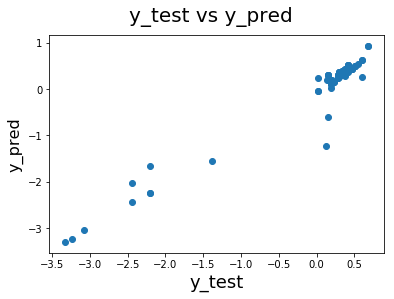

In [3563]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3564]:


from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9501699474477935

In [3565]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))


0.1998353986199639

### Elasticity - Game Accessory - Exponential Model

In [3566]:
coefficients_df = pd.DataFrame(pd.DataFrame(lregame.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)


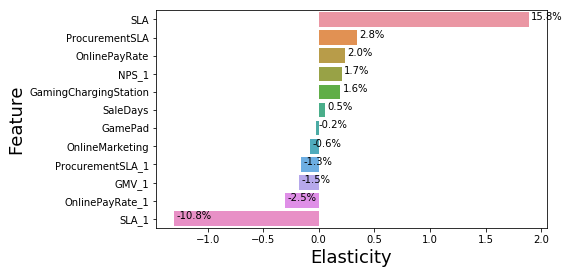

In [3567]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## Exponential Home Audio Model

In [3568]:
ConsumerElectronic_Exponential_HomeAudio = WL_Homeaudio
ConsumerElectronic_Exponential_HomeAudio=np.log(ConsumerElectronic_Exponential_HomeAudio)
ConsumerElectronic_Exponential_HomeAudio=ConsumerElectronic_Exponential_HomeAudio.fillna(0)
ConsumerElectronic_Exponential_HomeAudio=ConsumerElectronic_Exponential_HomeAudio.replace([np.inf,-np.inf],0)

In [3569]:
#column names
names = ConsumerElectronic_Exponential_HomeAudio.columns

In [3570]:
print(names)

Index(['Units', 'discountprice', 'cumulative_movingavg_gmv',
       'cumulative_movingavg_discountprice', 'Display_Price_ending_with_99',
       'BoomBox', 'DJController', 'Dock', 'DockingStation', 'FMRadio',
       'HiFiSystem', 'HomeAudioSpeaker', 'KaraokePlayer', 'SlingBox',
       'SoundMixer', 'VoiceRecorder', 'SLA', 'MRP', 'ProcurementSLA', 'GMV',
       'OnlinePayRate', 'HoliDays', 'OnlineMarketing', 'PayDays', 'SaleDays',
       'TV', 'TotalInvestment', 'NPS', 'Year', 'Month', 'Day', 'DataQuality',
       'MaxTemp', 'MinTemp', 'CoolDegDays', 'TotalRain', 'TotalSnow',
       'SnowonGrnd', 'GMV_1', 'GMV_2', 'GMV_3', 'discountprice_1',
       'discountprice_2', 'discountprice_3', 'SLA_1', 'SLA_2', 'SLA_3',
       'OnlinePayRate_1', 'OnlinePayRate_2', 'OnlinePayRate_3', 'NPS_1',
       'NPS_2', 'NPS_3', 'ProcurementSLA_1', 'ProcurementSLA_2',
       'ProcurementSLA_3', 'HoliDays_1', 'HoliDays_2', 'HoliDays_3', 'MRP_1',
       'MRP_2', 'MRP_3'],
      dtype='object')


In [3571]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaled_home = scaler.fit_transform(ConsumerElectronic_Exponential_HomeAudio)
scaled_home = pd.DataFrame(scaled_home, columns=names)

In [3572]:
X=scaled_home.drop(columns=['GMV'])
x_train,x_cv, y_train,y_cv=train_test_split(X,scaled_home.GMV)

In [3573]:
result = stepwise_selection(x_train,y_train)
print('Home Audio Features:')
print(result)

Add  VoiceRecorder                  with p-value 8.79265e-233
Add  SLA                            with p-value 6.37791e-26
Add  DJController                   with p-value 1.84439e-34
Add  discountprice                  with p-value 3.0895e-19
Add  Year                           with p-value 1.58164e-11
Add  Month                          with p-value 6.84562e-10
Add  ProcurementSLA                 with p-value 3.00394e-12
Drop DJController                   with p-value 0.80172
Add  CoolDegDays                    with p-value 7.85891e-07
Add  Day                            with p-value 2.11897e-05
Add  OnlinePayRate                  with p-value 0.000752296
Add  PayDays                        with p-value 0.00574907
Add  SaleDays                       with p-value 0.00232734
Add  discountprice_3                with p-value 0.00809406
Home Audio Features:
['VoiceRecorder', 'SLA', 'discountprice', 'Year', 'Month', 'ProcurementSLA', 'CoolDegDays', 'Day', 'OnlinePayRate', 'PayDays', 'Sale

In [3574]:

import statsmodels.api as sm
# build simple simple lenier model

#X_train = result
X_train_lm = sm.add_constant(x_train[result])
lrehome = sm.OLS(y_train, X_train_lm).fit()
lrehome.params
# View summary
print(lrehome.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.610e+04
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:29:44   Log-Likelihood:                 491.86
No. Observations:                 243   AIC:                            -957.7
Df Residuals:                     230   BIC:                            -912.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.153e-05      0.002     

Text(0.5, 0, 'Errors')

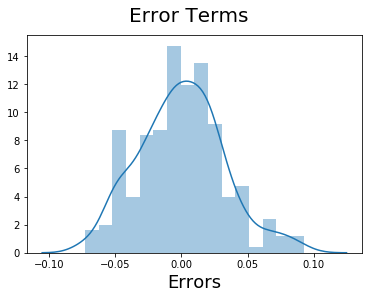

In [3575]:

# Testing Error Rate
y_train_pred = lrehome.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 


## Making predictions

In [3576]:

X_test=x_cv
y_test=y_cv

In [3577]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe 
X_test_new=X_test[result]
X_test_new = sm.add_constant(X_test_new)



In [3578]:
## Making predictions
y_pred = lrehome.predict(X_test_new)
y_pred


86     0.629747
173    0.519131
238    0.029743
130    0.296844
322   -0.575308
252   -0.537157
276    0.115440
157    0.267518
244   -0.076220
122    0.592796
101    0.082375
310    0.011312
172    0.233011
30    -0.026479
156    0.266912
199    0.333239
177    0.535662
73     0.376260
120    0.593378
220    0.224552
298    0.035173
202    0.230311
14     0.283216
212    0.542990
137    0.719126
315    0.004321
225    0.044461
52    -0.256032
104    0.096677
22     0.252557
         ...   
268    0.108636
197    0.331178
37    -5.111669
254   -0.524542
40    -3.099182
308    0.002895
168    0.230085
147    0.545277
178    0.537375
88     0.632451
108    0.096788
41    -3.098745
56     0.033810
264    0.094561
234    0.063156
204    0.240636
1     -2.578070
59     0.048986
237    0.028029
149    0.548851
305    0.031028
317   -0.014818
81     0.400837
200    0.333581
50    -0.270834
235    0.066967
107    0.096446
44    -3.061582
84     0.632551
118    0.591280
Length: 81, dtype: float

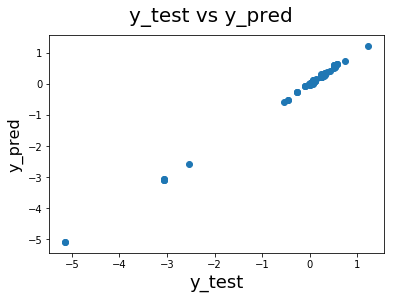

In [3579]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

plt.show()

In [3580]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9992360423722224

In [3581]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.03244108213517874

### Elasticity - Home Audio - Exponential Model

In [3582]:
coefficients_df = pd.DataFrame(pd.DataFrame(lrehome.params)[1:]).reset_index()
coefficients_df.columns = ['feature','coefficient']
elasticity_data = calculateElasticity(X_train_lm, y_train, coefficients_df)


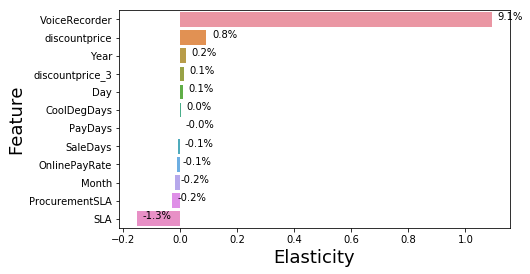

In [3583]:

fig, ax = plt.subplots(figsize = (7,4))
ax=sns.barplot(x = 'elasticity',y ='feature',data = elasticity_data.sort_values('elasticity', ascending = False))
total = len(elasticity_data)

for p in ax.patches:
    percentage='{:.1f}%'.format(100 * p.get_width()/total)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
    
plt.xticks(rotation =0,fontsize =10)
plt.yticks(rotation =0,fontsize =10)    
plt.xlabel ('Elasticity',fontsize =18)
plt.ylabel ('Feature',fontsize =18)

plt.show ()

## RandomForestRegressor Model - Hierarchical Model

### Random forest Camera Model

In [3584]:
ConsumerElectronic_RandomForest_Camera = WL_camera
ConsumerElectronic_RandomForest_Camera=ConsumerElectronic_RandomForest_Camera.fillna(0)
ConsumerElectronic_RandomForest_Camera=ConsumerElectronic_RandomForest_Camera.replace([np.inf,-np.inf],0)

In [3585]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(ConsumerElectronic_RandomForest_Camera, train_size=0.7, test_size=0.3, random_state=100)

In [3586]:
# Split the train dataset into X and y

y_train = df_train.pop('GMV')
X_train = df_train

In [3587]:
ConsumerElectronic_RandomForest_Camera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 27 to 79
Data columns (total 74 columns):
Units                                 338 non-null float64
discountprice                         338 non-null int64
cumulative_movingavg_gmv              338 non-null int64
cumulative_movingavg_discountprice    338 non-null float64
Display_Price_ending_with_99          338 non-null float64
Binoculars                            338 non-null float64
CameraAccessory                       338 non-null int64
CameraBag                             338 non-null int64
CameraBattery                         338 non-null int64
CameraBatteryCharger                  338 non-null int64
CameraBatteryGrip                     338 non-null int64
CameraEyeCup                          338 non-null float64
CameraFilmRolls                       338 non-null float64
CameraHousing                         338 non-null int64
CameraMicrophone                      338 non-null int64
CameraMount                 

## Building the first model

In [3588]:
from sklearn.ensemble import RandomForestRegressor
# Establish model
model = RandomForestRegressor(n_jobs = -1)

In [3589]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [3590]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Units', 'cumulative_movingavg_discountprice', 'CameraMount', 'Strap',
       'Teleconverter', 'OnlineMarketing', 'TV', 'GMV_1'],
      dtype='object')


### Predicting on test data set

In [3591]:
y_test = df_test.pop('GMV')
X_test = df_test

In [3592]:
# Making predictions
y_pred=model.predict(X_test)

Text(0, 0.5, 'y_pred')

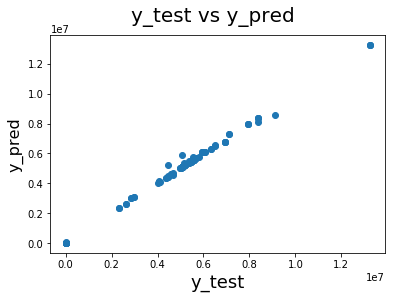

In [3593]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [3594]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

139686.9200765864


In [3595]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9968609815618822

### Hyper Parameter Tuning



In [3596]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 100, 10)}

# instantiate the model
rf = RandomForestRegressor()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                 scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 100, 10)}

In [3597]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.019195      0.002992         0.003201        0.001600   
1       0.042387      0.004076         0.002400        0.001960   
2       0.033587      0.013983         0.003125        0.006249   
3       0.021363      0.005743         0.000000        0.000000   
4       0.032561      0.002599         0.000000        0.000000   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}      -4.323888e+11      -2.188053e+12   
1              12  {'max_depth': 12}      -1.144504e+10      -1.280120e+12   
2              22  {'max_depth': 22}      -2.955750e+10      -1.382491e+12   
3              32  {'max_depth': 32}      -1.398603e+10      -1.596514e+12   
4              42  {'max_depth': 42}      -1.329211e+10      -1.521590e+12   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0      -4.860591e+11      -8.495899e+11  ...    -9.306282e+11    6.449371e+11   
1      -6.340425e+10      -3.743158e+10  ...    -3.141403e+11    4.853575e+11   
2      -7.461511e+10      -4.344894e+10  ...    -3.452827e+11    5.208524e+11   
3      -7.387434e+10      -6.319913e+10  ...    -3.974188e+11    6.031655e+11   
4      -8.065580e+10      -6.583477e+10  ...    -3.987995e+11    5.698574e+11   

   rank_test_score  split0_train_score  split1_train_score  \
0               10       -6.766003e+11       -5.817148e+11   
1                4       -1.812395e+10       -1.694482e+10   
2                6       -2.790611e+10       -4.606661e+10   
3                7       -1.788950e+10       -1.538250e+10   
4                8       -3.755089e+10       -3.049201e+10   

   split2_train_score  split3_train_score  split4_train_score  \
0       -6.142759e+11       -6.303633e+11       -5.935318e+11   
1       -1.465892e+10       -5.090155e+10       -6.772243e+10   
2       -3.182426e+10       -1.816267e+10       -4.059704e+10   
3       -3.896270e+10       -5.979672e+10       -3.779451e+10   
4       -4.179163e+10       -2.943131e+10       -7.170913e+10   

   mean_train_score  std_train_score  
0     -6.192972e+11     3.318917e+10  
1     -3.367033e+10     2.163020e+10  
2     -3.291134e+10     9.755904e+09  
3     -3.396518e+10     1.619043e+10  
4     -4.219500e+10     1.544465e+10  

[5 rows x 21 columns]

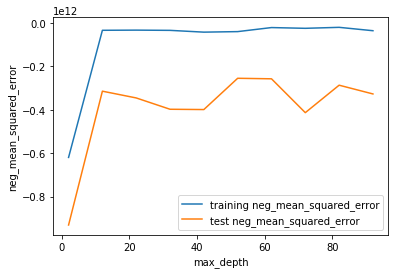

In [3598]:
# plotting neg_mean_squared_error with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("max_depth")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3599]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10, 500, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestRegressor(max_depth=15)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': range(10, 500, 50)},
             pre_dispatch='2*n_jobs', ref

In [3600]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.043189      0.002995         0.003200        0.001600   
1       0.206085      0.016268         0.006405        0.001957   
2       0.485038      0.047136         0.017123        0.012305   
3       0.569045      0.027033         0.012503        0.006251   
4       0.735764      0.107638         0.016531        0.001802   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}      -2.880154e+10   
1                 60   {'n_estimators': 60}      -2.941651e+10   
2                110  {'n_estimators': 110}      -1.609739e+10   
3                160  {'n_estimators': 160}      -1.478180e+10   
4                210  {'n_estimators': 210}      -1.646646e+10   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -9.890993e+11      -7.861159e+10      -4.026505e+10  ...   
1      -1.263316e+12      -4.831056e+10      -3.485838e+10  ...   
2      -1.118128e+12      -5.295125e+10      -4.617505e+10  ...   
3      -1.329212e+12      -6.010934e+10      -3.513345e+10  ...   
4      -1.345070e+12      -5.837762e+10      -3.038905e+10  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -2.561821e+11    3.678955e+11                1       -3.289734e+10   
1    -3.108672e+11    4.783920e+11                8       -1.713114e+10   
2    -2.792710e+11    4.215295e+11                3       -1.616963e+10   
3    -3.208496e+11    5.057549e+11                9       -1.237930e+10   
4    -3.265396e+11    5.115784e+11               10       -1.521142e+10   

   split1_train_score  split2_train_score  split3_train_score  \
0       -1.629159e+10       -1.758756e+10       -2.134299e+10   
1       -2.960250e+10       -2.188401e+10       -1.801990e+10   
2       -2.361034e+10       -2.329186e+10       -2.801788e+10   
3       -1.817035e+10       -2.527358e+10       -2.002087e+10   
4       -1.620078e+10       -1.803647e+10       -1.793378e+10   

   split4_train_score  mean_train_score  std_train_score  
0       -2.209070e+10     -2.204204e+10     5.852156e+09  
1       -1.767969e+10     -2.086345e+10     4.681128e+09  
2       -1.260879e+10     -2.073970e+10     5.562792e+09  
3       -1.670238e+10     -1.850930e+10     4.218933e+09  
4       -2.739417e+10     -1.895532e+10     4.352154e+09  

[5 rows x 21 columns]

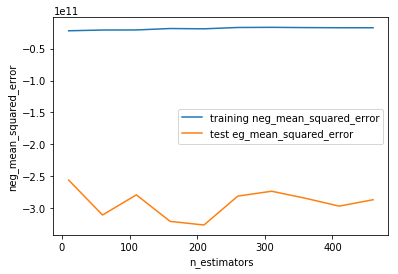

In [3601]:
# plotting neg_mean_squared_errore with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test eg_mean_squared_error")
plt.xlabel("n_estimators")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3602]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [6,7,8,9,10]}

# instantiate the model
rf = RandomForestRegressor(max_depth=15)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit

In [3603]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.014826      0.004329         0.003195        0.001597   
1       0.016078      0.004998         0.004011        0.002539   
2       0.022078      0.003597         0.005665        0.002399   
3       0.021231      0.001615         0.003207        0.001604   
4       0.015522      0.003757         0.000800        0.001599   

  param_max_features                params  split0_test_score  \
0                  6   {'max_features': 6}      -1.801855e+10   
1                  7   {'max_features': 7}      -3.676087e+10   
2                  8   {'max_features': 8}      -3.080576e+10   
3                  9   {'max_features': 9}      -2.610251e+10   
4                 10  {'max_features': 10}      -3.793207e+10   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -2.623314e+11      -4.215368e+10      -2.704744e+10  ...   
1      -9.736942e+10      -8.139981e+10      -1.651321e+10  ...   
2      -3.304502e+11      -4.741230e+10      -2.932292e+10  ...   
3      -8.849961e+10      -1.012155e+11      -8.401577e+10  ...   
4      -2.489141e+11      -3.541588e+10      -8.340457e+10  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -1.082312e+11    1.000772e+11                3       -6.264103e+09   
1    -6.915673e+10    3.690438e+10                1       -1.774709e+10   
2    -1.206006e+11    1.164618e+11                5       -6.371079e+10   
3    -7.842803e+10    2.704566e+10                2       -1.516240e+10   
4    -1.100553e+11    8.005194e+10                4       -1.952201e+10   

   split1_train_score  split2_train_score  split3_train_score  \
0       -7.514979e+10       -1.809167e+10       -3.997603e+10   
1       -2.496340e+10       -1.455243e+10       -1.432500e+10   
2       -1.713640e+10       -2.297305e+10       -2.011297e+10   
3       -9.136930e+09       -3.902859e+10       -3.699357e+10   
4       -2.764449e+10       -1.687487e+10       -5.603663e+10   

   split4_train_score  mean_train_score  std_train_score  
0       -3.625538e+10     -3.514740e+10     2.345156e+10  
1       -1.731357e+10     -1.778030e+10     3.851599e+09  
2       -3.759923e+10     -3.230649e+10     1.720564e+10  
3       -1.225383e+10     -2.251506e+10     1.281134e+10  
4       -1.840289e+10     -2.769618e+10     1.465242e+10  

[5 rows x 21 columns]

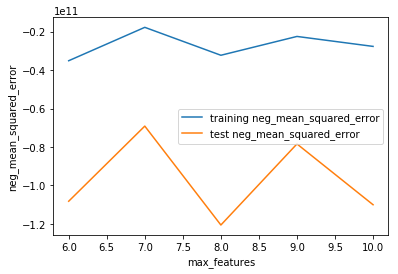

In [3604]:
# plotting r2 score with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("max_features")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3605]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 100, 10)}

# instantiate the model
rf = RandomForestRegressor(max_depth=15)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', 

In [3606]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.043188      0.007755         0.003200        0.001600   
1       0.025591      0.001959         0.002396        0.001956   
2       0.023994      0.002535         0.001605        0.001965   
3       0.020797      0.001598         0.001597        0.001955   
4       0.014397      0.001957         0.003199        0.001599   

  param_min_samples_leaf                    params  split0_test_score  \
0                      1   {'min_samples_leaf': 1}      -2.358022e+10   
1                     11  {'min_samples_leaf': 11}      -4.012891e+11   
2                     21  {'min_samples_leaf': 21}      -9.884223e+11   
3                     31  {'min_samples_leaf': 31}      -1.149246e+12   
4                     41  {'min_samples_leaf': 41}      -1.480088e+12   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -5.782651e+11      -4.881166e+10      -4.709442e+10  ...   
1      -1.813229e+12      -2.914183e+11      -6.916160e+11  ...   
2      -3.080230e+12      -6.120692e+11      -1.306691e+12  ...   
3      -3.046991e+12      -1.275703e+12      -1.992346e+12  ...   
4      -4.166635e+12      -2.125868e+12      -2.757211e+12  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -1.703075e+11    2.086205e+11                1       -3.718421e+10   
1    -8.186063e+11    5.407989e+11                2       -5.493716e+11   
2    -1.510423e+12    8.461872e+11                3       -1.341731e+12   
3    -1.907673e+12    6.805173e+11                4       -1.966176e+12   
4    -2.684457e+12    8.981050e+11                5       -2.860732e+12   

   split1_train_score  split2_train_score  split3_train_score  \
0       -3.111981e+10       -4.937004e+10       -4.437479e+10   
1       -4.398462e+11       -7.750761e+11       -5.663609e+11   
2       -1.071763e+12       -1.308274e+12       -1.214699e+12   
3       -1.568448e+12       -1.870718e+12       -1.806122e+12   
4       -2.196106e+12       -2.565685e+12       -2.454498e+12   

   split4_train_score  mean_train_score  std_train_score  
0       -1.258218e+10     -3.492621e+10     1.278079e+10  
1       -6.474411e+11     -5.956192e+11     1.114903e+11  
2       -1.184428e+12     -1.224179e+12     9.569849e+10  
3       -1.750762e+12     -1.792445e+12     1.329725e+11  
4       -2.466991e+12     -2.508802e+12     2.142737e+11  

[5 rows x 21 columns]

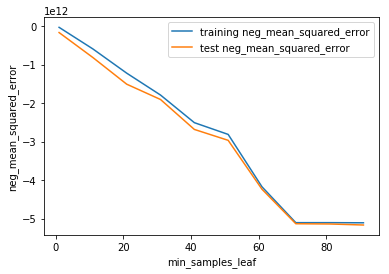

In [3607]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("min_samples_leaf")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3608]:
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(10, 100, 10)}

# instantiate the model
rf = RandomForestRegressor(max_depth=20)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score=True,
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=20, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(10, 100, 10)},
             pre_dispatch='2*n_jobs'

In [3609]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.037938      0.002516         0.003204        0.001602   
1       0.030608      0.002425         0.003847        0.002293   
2       0.026288      0.005059         0.003998        0.000002   
3       0.054785      0.012872         0.015199        0.014616   
4       0.035190      0.002992         0.003204        0.001602   

  param_min_samples_split                     params  split0_test_score  \
0                      10  {'min_samples_split': 10}      -1.497923e+11   
1                      20  {'min_samples_split': 20}      -3.721339e+11   
2                      30  {'min_samples_split': 30}      -6.790048e+11   
3                      40  {'min_samples_split': 40}      -3.826776e+11   
4                      50  {'min_samples_split': 50}      -5.440269e+11   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -1.389273e+12      -9.873931e+10      -1.126627e+11  ...   
1      -1.581134e+12      -2.145621e+11      -4.268397e+11  ...   
2      -1.758298e+12      -4.628931e+11      -5.375907e+11  ...   
3      -2.215195e+12      -5.116145e+11      -6.252010e+11  ...   
4      -1.980607e+12      -5.278638e+11      -6.056340e+11  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -4.284358e+11    4.912693e+11                1       -1.706221e+11   
1    -6.140819e+11    4.903622e+11                2       -4.266700e+11   
2    -8.506117e+11    4.687445e+11                3       -5.240889e+11   
3    -9.136554e+11    6.666422e+11                5       -4.989235e+11   
4    -8.962319e+11    5.514610e+11                4       -5.598336e+11   

   split1_train_score  split2_train_score  split3_train_score  \
0       -2.001490e+11       -1.383636e+11       -7.564443e+10   
1       -2.666218e+11       -3.889193e+11       -3.208612e+11   
2       -5.680595e+11       -6.105563e+11       -5.692967e+11   
3       -6.122238e+11       -6.904665e+11       -6.589317e+11   
4       -6.228734e+11       -6.675232e+11       -6.485390e+11   

   split4_train_score  mean_train_score  std_train_score  
0       -1.522325e+11     -1.474023e+11     4.141398e+10  
1       -3.093851e+11     -3.424915e+11     5.755290e+10  
2       -5.574046e+11     -5.658812e+11     2.767934e+10  
3       -5.674193e+11     -6.055930e+11     6.771724e+10  
4       -6.510757e+11     -6.299690e+11     3.786812e+10  

[5 rows x 21 columns]

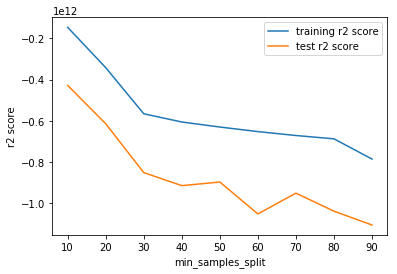

In [3610]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training r2 score")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test r2 score")
plt.xlabel("min_samples_split")
plt.ylabel("r2 score")
plt.legend()
plt.show()

In [3611]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15,20,25],
    'min_samples_leaf': range(10, 100, 20),
    'min_samples_split': range(10, 200, 50),
    'n_estimators': [100,200, 300], 
    'max_features': [8,9,10]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [3612]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25], 'max_f

In [3613]:
# printing the optimal accuracy score and hyperparameters
print('We can get best neg_mean_squared_error of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best neg_mean_squared_error of 0.8558137255997438 using {'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [3614]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(bootstrap=True,
                             max_depth=25,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=8,
                             n_estimators=200)

In [3615]:
#Fit the model
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [3616]:
# Making predictions
y_pred=rfc.predict(X_test)

Text(0, 0.5, 'y_pred')

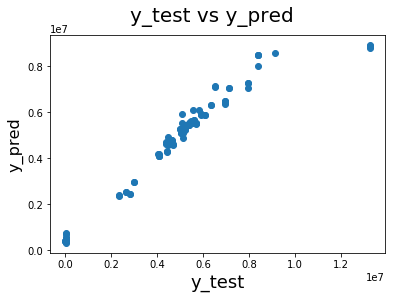

In [3617]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [3618]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

657341570005.2189

In [3619]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8942516789597148

### Random Forest Game Accessory Model

In [3620]:
ConsumerElectronic_RandomForest_Game = WL_Game
ConsumerElectronic_RandomForest_Game=ConsumerElectronic_RandomForest_Game.fillna(0)
ConsumerElectronic_RandomForest_Game=ConsumerElectronic_RandomForest_Game.replace([np.inf,-np.inf],0)
#ConsumerElectronic_RandomForest_Game = ConsumerElectronic_RandomForest_Game.drop(['GMV_1'], axis=1)
#ConsumerElectronic_RandomForest_Game = ConsumerElectronic_RandomForest_Game.drop(['GMV_2'], axis=1)
#ConsumerElectronic_RandomForest_Game = ConsumerElectronic_RandomForest_Game.drop(['GMV_3'], axis=1)

In [3621]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(ConsumerElectronic_RandomForest_Game, train_size=0.7, test_size=0.3, random_state=100)

In [3622]:
# Split the train dataset into X and y

y_train = df_train.pop('GMV')
X_train = df_train

## Building Game Model

In [3623]:
from sklearn.ensemble import RandomForestRegressor
# Establish model
model = RandomForestRegressor(n_jobs = -1)

In [3624]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [3625]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['GamePad', 'GamingAccessoryKit', 'GamingAdapter',
       'GamingChargingStation', 'OnlineMarketing', 'TV', 'GMV_1'],
      dtype='object')


### Predicting on test data set

In [3626]:
y_test = df_test.pop('GMV')
X_test = df_test

In [3627]:
# Making predictions
y_pred=model.predict(X_test)

Text(0, 0.5, 'y_pred')

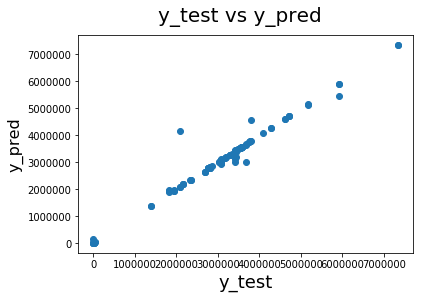

In [3628]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [3629]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

239406.42148529936


In [3630]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9728087569359244

### Hyper Parameter Tuning

In [3631]:

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 100, 10)}

# instantiate the model
rf = RandomForestRegressor()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                 scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 100, 10)}

In [3632]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.043190      0.005879         0.007198        0.003919   
1       0.062384      0.019361         0.004798        0.001598   
2       0.062814      0.010887         0.002805        0.001597   
3       0.047987      0.002528         0.003200        0.001600   
4       0.046074      0.003103         0.003992        0.000014   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}      -3.054543e+11      -1.513233e+11   
1              12  {'max_depth': 12}      -2.441413e+10      -5.831465e+10   
2              22  {'max_depth': 22}      -2.103591e+10      -4.893976e+10   
3              32  {'max_depth': 32}      -1.295217e+10      -7.787879e+10   
4              42  {'max_depth': 42}      -2.710361e+10      -5.556832e+10   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0      -5.962095e+11      -3.326350e+11  ...    -3.572280e+11    1.444878e+11   
1      -2.954712e+11      -1.891527e+11  ...    -1.173128e+11    1.078866e+11   
2      -3.636717e+11      -1.463582e+11  ...    -1.223718e+11    1.281794e+11   
3      -3.479564e+11      -1.727565e+11  ...    -1.267620e+11    1.239066e+11   
4      -2.749721e+11      -2.516061e+11  ...    -1.356519e+11    1.050828e+11   

   rank_test_score  split0_train_score  split1_train_score  \
0               10       -3.176414e+11       -1.941820e+11   
1                4       -3.998852e+10       -1.501234e+10   
2                5       -1.529809e+10       -9.684068e+09   
3                6       -1.603962e+10       -2.478682e+10   
4                8       -2.302508e+10       -2.693232e+10   

   split2_train_score  split3_train_score  split4_train_score  \
0       -2.197883e+11       -2.547642e+11       -2.692676e+11   
1       -1.383180e+10       -3.019164e+10       -1.484113e+10   
2       -1.689078e+10       -9.935775e+09       -8.559242e+09   
3       -2.216059e+10       -1.777083e+10       -1.463818e+10   
4       -2.012765e+10       -4.110236e+10       -2.369987e+10   

   mean_train_score  std_train_score  
0     -2.511287e+11     4.240595e+10  
1     -2.277309e+10     1.053089e+10  
2     -1.207359e+10     3.353606e+09  
3     -1.907921e+10     3.814328e+09  
4     -2.697746e+10     7.386454e+09  

[5 rows x 21 columns]

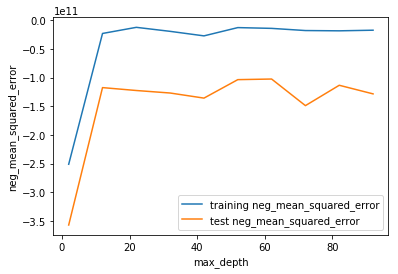

In [3633]:

# plotting neg_mean_squared_error with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("max_depth")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3634]:

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(2, 100, 10)}

# instantiate the model
rf = RandomForestRegressor()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                 scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': range(2, 100, 1

In [3635]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.015196      0.002992         0.004000        0.000001   
1       0.088780      0.029103         0.007194        0.001598   
2       0.105253      0.008820         0.004800        0.001598   
3       0.179936      0.034750         0.012797        0.012493   
4       0.169505      0.017153         0.006806        0.002972   

  param_n_estimators                params  split0_test_score  \
0                  2   {'n_estimators': 2}      -2.867037e+10   
1                 12  {'n_estimators': 12}      -1.292683e+10   
2                 22  {'n_estimators': 22}      -2.684821e+10   
3                 32  {'n_estimators': 32}      -1.196894e+10   
4                 42  {'n_estimators': 42}      -2.025079e+10   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -7.054426e+10      -3.521177e+11      -1.549382e+11  ...   
1      -3.599072e+10      -2.107185e+11      -2.138234e+11  ...   
2      -4.293946e+10      -2.953379e+11      -2.039196e+11  ...   
3      -5.921734e+10      -2.496513e+11      -1.441496e+11  ...   
4      -3.865510e+10      -2.847140e+11      -1.924058e+11  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -1.300809e+11    1.189074e+11               10       -4.374919e+10   
1    -9.635228e+10    9.475247e+10                2       -1.344627e+10   
2    -1.178259e+11    1.112731e+11                9       -1.760851e+10   
3    -9.745618e+10    8.886672e+10                3       -1.121930e+10   
4    -1.089015e+11    1.098231e+11                8       -9.839866e+09   

   split1_train_score  split2_train_score  split3_train_score  \
0       -2.635779e+10       -1.982936e+10       -3.625156e+10   
1       -1.078453e+10       -9.633767e+09       -1.342967e+10   
2       -1.220507e+10       -1.086150e+10       -9.578786e+09   
3       -1.596439e+10       -9.800953e+09       -1.077512e+10   
4       -8.781771e+09       -1.125333e+10       -9.322989e+09   

   split4_train_score  mean_train_score  std_train_score  
0       -8.494090e+10     -4.222576e+10     2.287351e+10  
1       -1.892264e+10     -1.324338e+10     3.206402e+09  
2       -1.115639e+10     -1.228205e+10     2.791766e+09  
3       -1.041563e+10     -1.163508e+10     2.213885e+09  
4       -7.646464e+09     -9.368884e+09     1.190505e+09  

[5 rows x 21 columns]

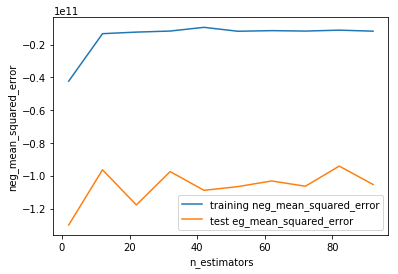

In [3636]:
# plotting neg_mean_squared_errore with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test eg_mean_squared_error")
plt.xlabel("n_estimators")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3637]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [6,7,8,9,10]}

# instantiate the model
rf = RandomForestRegressor(max_depth=15)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                   return_train_score=True, 
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit

In [3638]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.017595      0.001962         0.001599        0.001959   
1       0.029062      0.005308         0.003196        0.001598   
2       0.023376      0.004698         0.003769        0.002183   
3       0.021023      0.001962         0.005264        0.001628   
4       0.032793      0.003915         0.006392        0.003200   

  param_max_features                params  split0_test_score  \
0                  6   {'max_features': 6}      -1.330706e+11   
1                  7   {'max_features': 7}      -3.116553e+10   
2                  8   {'max_features': 8}      -3.427940e+10   
3                  9   {'max_features': 9}      -1.254505e+10   
4                 10  {'max_features': 10}      -4.076732e+10   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -8.827169e+10      -9.804426e+10      -4.357583e+10  ...   
1      -8.660646e+10      -1.505707e+11      -4.190405e+10  ...   
2      -4.917426e+10      -6.478230e+10      -1.997908e+11  ...   
3      -3.985707e+10      -5.587623e+10      -5.067766e+10  ...   
4      -1.265304e+11      -1.049955e+11      -1.028971e+11  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -7.896776e+10    3.738203e+10                3       -2.251094e+10   
1    -7.039387e+10    4.429161e+10                2       -2.038996e+10   
2    -8.320441e+10    5.943249e+10                5       -2.113411e+10   
3    -4.066338e+10    1.518566e+10                1       -6.250587e+09   
4    -7.897153e+10    4.096277e+10                4       -1.751385e+10   

   split1_train_score  split2_train_score  split3_train_score  \
0       -1.146704e+10       -1.189049e+10       -8.246595e+09   
1       -1.402343e+10       -8.840913e+09       -1.209967e+10   
2       -1.439495e+10       -1.329498e+10       -1.620843e+10   
3       -1.632608e+10       -6.210101e+09       -9.497010e+09   
4       -2.086968e+10       -6.504107e+09       -4.866329e+09   

   split4_train_score  mean_train_score  std_train_score  
0       -9.375710e+09     -1.269816e+10     5.085541e+09  
1       -2.011406e+10     -1.509361e+10     4.526840e+09  
2       -2.591931e+10     -1.819036e+10     4.705320e+09  
3       -1.654266e+10     -1.096529e+10     4.622578e+09  
4       -1.693124e+10     -1.333704e+10     6.411655e+09  

[5 rows x 21 columns]

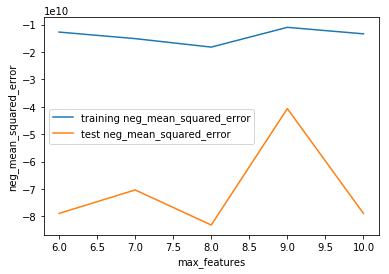

In [3639]:
# plotting r2 score with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("max_features")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3640]:

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(2, 100, 10)}

# instantiate the model
rf = RandomForestRegressor()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                 scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(2, 10

In [3641]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.045733      0.006648         0.003200        0.004665   
1       0.033259      0.005234         0.004044        0.002604   
2       0.020652      0.001471         0.003210        0.001605   
3       0.017299      0.003071         0.002396        0.001956   
4       0.017660      0.002964         0.002405        0.001963   

  param_min_samples_leaf                    params  split0_test_score  \
0                      2   {'min_samples_leaf': 2}      -2.873082e+10   
1                     12  {'min_samples_leaf': 12}      -2.801039e+11   
2                     22  {'min_samples_leaf': 22}      -5.318819e+11   
3                     32  {'min_samples_leaf': 32}      -7.706870e+11   
4                     42  {'min_samples_leaf': 42}      -1.014919e+12   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -1.164139e+11      -2.701084e+11      -1.813315e+11  ...   
1      -1.830234e+11      -3.179227e+11      -2.453996e+11  ...   
2      -4.303730e+11      -6.473988e+11      -4.088663e+11  ...   
3      -6.528122e+11      -9.455415e+11      -6.418593e+11  ...   
4      -6.451839e+11      -1.305597e+12      -7.052787e+11  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -1.273455e+11    8.991601e+10                1       -2.426108e+10   
1    -2.637838e+11    4.652210e+10                2       -1.972015e+11   
2    -4.927162e+11    8.786208e+10                3       -3.813354e+11   
3    -7.400253e+11    1.120923e+11                4       -6.579079e+11   
4    -9.149694e+11    2.360320e+11                5       -8.172203e+11   

   split1_train_score  split2_train_score  split3_train_score  \
0       -1.557698e+10       -1.676540e+10       -1.401952e+10   
1       -2.295611e+11       -1.544250e+11       -2.006968e+11   
2       -4.325428e+11       -4.381528e+11       -4.352187e+11   
3       -6.210175e+11       -6.310505e+11       -7.498067e+11   
4       -8.565412e+11       -8.582371e+11       -8.906120e+11   

   split4_train_score  mean_train_score  std_train_score  
0       -2.292060e+10     -1.870872e+10     4.102230e+09  
1       -1.908222e+11     -1.945413e+11     2.406036e+10  
2       -3.148533e+11     -4.004206e+11     4.764972e+10  
3       -6.034860e+11     -6.526537e+11     5.167459e+10  
4       -8.197222e+11     -8.484665e+11     2.734763e+10  

[5 rows x 21 columns]

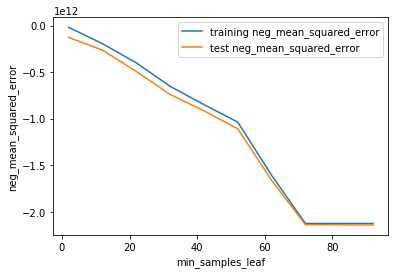

In [3642]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("min_samples_leaf")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3643]:

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 100, 10)}

# instantiate the model
rf = RandomForestRegressor()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                 scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(2, 1

In [3644]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.037919      0.004807         0.004001        0.002533   
1       0.036125      0.003441         0.004020        0.000023   
2       0.029237      0.003146         0.003205        0.001603   
3       0.022910      0.003452         0.002857        0.001573   
4       0.024491      0.000751         0.002043        0.001797   

  param_min_samples_split                     params  split0_test_score  \
0                       2   {'min_samples_split': 2}      -1.996922e+10   
1                      12  {'min_samples_split': 12}      -1.781272e+11   
2                      22  {'min_samples_split': 22}      -2.015499e+11   
3                      32  {'min_samples_split': 32}      -2.330610e+11   
4                      42  {'min_samples_split': 42}      -2.987879e+11   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -3.005924e+10      -2.533425e+11      -1.949744e+11  ...   
1      -6.966916e+10      -3.161520e+11      -1.773417e+11  ...   
2      -6.817477e+10      -3.521929e+11      -3.177825e+11  ...   
3      -9.112499e+10      -4.953547e+11      -2.922690e+11  ...   
4      -1.235278e+11      -4.320166e+11      -3.099001e+11  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -1.013586e+11    1.017970e+11                1       -1.211377e+10   
1    -1.583467e+11    9.494294e+10                2       -1.003547e+11   
2    -2.379445e+11    9.955803e+10                3       -1.322777e+11   
3    -2.656983e+11    1.318979e+11                4       -1.572669e+11   
4    -2.894685e+11    9.818804e+10                6       -1.896558e+11   

   split1_train_score  split2_train_score  split3_train_score  \
0       -4.552870e+09       -1.092409e+10       -2.160987e+10   
1       -2.710676e+10       -4.378956e+10       -3.043911e+10   
2       -1.141554e+11       -1.030293e+11       -1.149984e+11   
3       -1.617676e+11       -1.529617e+11       -1.258647e+11   
4       -1.406088e+11       -1.758211e+11       -1.387619e+11   

   split4_train_score  mean_train_score  std_train_score  
0       -1.154122e+10     -1.214836e+10     5.460408e+09  
1       -3.207255e+10     -4.675253e+10     2.738451e+10  
2       -1.427592e+11     -1.214440e+11     1.418082e+10  
3       -1.216870e+11     -1.439096e+11     1.672560e+10  
4       -1.717948e+11     -1.633285e+11     2.020184e+10  

[5 rows x 21 columns]

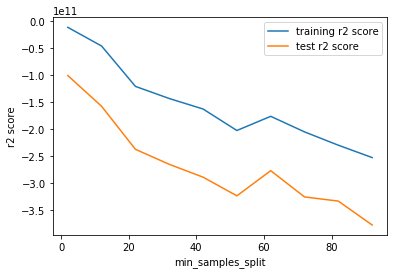

In [3645]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training r2 score")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test r2 score")
plt.xlabel("min_samples_split")
plt.ylabel("r2 score")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [3646]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15,20,25],
    'min_samples_leaf': range(10, 100, 20),
    'min_samples_split': range(10, 200, 50),
    'n_estimators': [100,200, 300], 
    'max_features': [8,9,10]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [3647]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25], 'max_f

In [3648]:
# printing the optimal accuracy score and hyperparameters
print('We can get best neg_mean_squared_error of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best neg_mean_squared_error of 0.8800199190958232 using {'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


## Fitting the model with optimal parameters

In [3649]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(bootstrap=True,
                             max_depth=25,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=8,
                             n_estimators=200)

In [3650]:
#Fit the model
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [3651]:
# Making predictions
y_pred=rfc.predict(X_test)

Text(0, 0.5, 'y_pred')

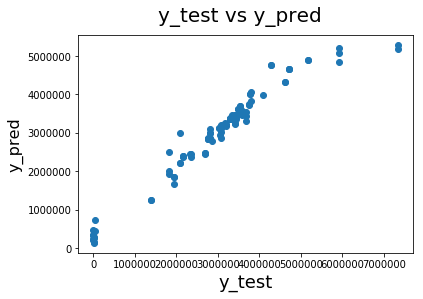

In [3652]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [3653]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

156236436696.79105

In [3654]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9258792513439251

## Random Forest Home Audio Model

In [3655]:
ConsumerElectronic_RandomForest_HomeAudio = WL_Homeaudio
ConsumerElectronic_RandomForest_HomeAudio=ConsumerElectronic_RandomForest_HomeAudio.fillna(0)
ConsumerElectronic_RandomForest_HomeAudio=ConsumerElectronic_RandomForest_HomeAudio.replace([np.inf,-np.inf],0)
#ConsumerElectronic_RandomForest_HomeAudio = ConsumerElectronic_RandomForest_HomeAudio.drop(['GMV_1'], axis=1)
#ConsumerElectronic_RandomForest_HomeAudio = ConsumerElectronic_RandomForest_HomeAudio.drop(['GMV_2'], axis=1)
#ConsumerElectronic_RandomForest_HomeAudio = ConsumerElectronic_RandomForest_HomeAudio.drop(['GMV_3'], axis=1)

In [3656]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(ConsumerElectronic_RandomForest_HomeAudio, train_size=0.7, test_size=0.3, random_state=100)

In [3657]:
# Split the train dataset into X and y

y_train = df_train.pop('GMV')
X_train = df_train

## Building the Home Audio first model

In [3658]:
from sklearn.ensemble import RandomForestRegressor
# Establish model
model = RandomForestRegressor(n_jobs = -1)

In [3659]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [3660]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['discountprice', 'DJController', 'VoiceRecorder', 'OnlineMarketing',
       'SaleDays', 'TV', 'TotalInvestment'],
      dtype='object')


### Predicting on test data set

In [3661]:
y_test = df_test.pop('GMV')
X_test = df_test

In [3662]:
# Making predictions
y_pred=model.predict(X_test)

Text(0, 0.5, 'y_pred')

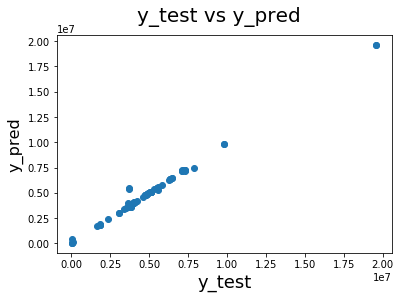

In [3663]:
#Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [3664]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

252455.20823982972


In [3665]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9921415283822078

### Hyper Parameter Tuning

In [3666]:

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 100, 10)}

# instantiate the model
rf = RandomForestRegressor()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True,
                 scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 100, 10)}

In [3667]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.073994      0.033801         0.008859        0.007842   
1       0.056784      0.005879         0.007199        0.010549   
2       0.060919      0.015824         0.003998        0.002530   
3       0.051683      0.008159         0.007273        0.007020   
4       0.044785      0.003916         0.004799        0.001599   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}      -7.817615e+11      -1.051469e+12   
1              12  {'max_depth': 12}      -4.874211e+10      -2.728957e+10   
2              22  {'max_depth': 22}      -7.779690e+09      -1.100706e+10   
3              32  {'max_depth': 32}      -3.947029e+11      -1.218816e+10   
4              42  {'max_depth': 42}      -2.836076e+11      -6.279008e+09   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0      -1.391354e+12      -1.662164e+12  ...    -1.228685e+12    2.997970e+11   
1      -6.176576e+10      -3.559856e+10  ...    -1.001422e+11    1.144409e+11   
2      -1.158992e+11      -4.851464e+10  ...    -1.006236e+11    1.170349e+11   
3      -2.630234e+11      -3.830325e+10  ...    -2.385427e+11    1.870188e+11   
4      -1.675935e+11      -3.148423e+10  ...    -1.221773e+11    1.001509e+11   

   rank_test_score  split0_train_score  split1_train_score  \
0               10       -8.736237e+11       -1.195076e+12   
1                2       -4.457282e+10       -4.862966e+10   
2                3       -6.801076e+09       -1.558617e+11   
3                9       -9.988766e+10       -3.742602e+10   
4                5       -8.421729e+10       -4.072288e+09   

   split2_train_score  split3_train_score  split4_train_score  \
0       -1.225123e+12       -1.132899e+12       -1.110449e+12   
1       -2.960550e+10       -4.105410e+10       -1.473791e+11   
2       -2.483167e+10       -2.642140e+10       -1.043616e+11   
3       -7.297100e+09       -9.364641e+09       -1.345854e+11   
4       -1.054714e+10       -8.709379e+09       -2.174556e+10   

   mean_train_score  std_train_score  
0     -1.107434e+12     1.239812e+11  
1     -6.224823e+10     4.303461e+10  
2     -6.365549e+10     5.707025e+10  
3     -5.771216e+10     5.094890e+10  
4     -2.585833e+10     2.975175e+10  

[5 rows x 21 columns]

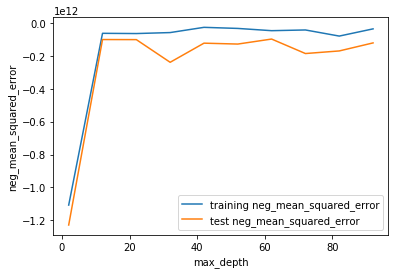

In [3668]:
# plotting neg_mean_squared_error with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("max_depth")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3669]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10, 500, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestRegressor(max_depth=15)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True, 
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': range(10, 500, 50)},
             pre_dispatch='2*n_jobs', ref

In [3670]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.053585      0.013289         0.003999        0.000002   
1       0.293526      0.087525         0.011197        0.001600   
2       0.391692      0.059686         0.018116        0.004422   
3       0.528358      0.124771         0.020994        0.005737   
4       0.879764      0.068197         0.029133        0.006008   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}      -2.577925e+10   
1                 60   {'n_estimators': 60}      -4.200175e+10   
2                110  {'n_estimators': 110}      -7.307852e+10   
3                160  {'n_estimators': 160}      -5.923946e+10   
4                210  {'n_estimators': 210}      -6.274006e+10   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -1.841531e+10      -3.558195e+11      -2.105232e+10  ...   
1      -1.688451e+10      -2.276436e+11      -2.438247e+10  ...   
2      -1.490597e+10      -1.963913e+11      -2.506927e+10  ...   
3      -1.037870e+10      -1.367305e+11      -1.945160e+10  ...   
4      -9.910066e+09      -1.775775e+11      -2.325318e+10  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -9.510052e+10    1.306916e+11                4       -2.466827e+10   
1    -9.548564e+10    8.564598e+10                6       -1.506468e+10   
2    -8.954699e+10    6.888806e+10                3       -3.318907e+10   
3    -6.692304e+10    4.919292e+10                1       -2.742512e+10   
4    -7.884205e+10    6.253515e+10                2       -3.220277e+10   

   split1_train_score  split2_train_score  split3_train_score  \
0       -1.085496e+11       -1.384012e+10       -4.692269e+10   
1       -3.660615e+10       -1.277112e+10       -1.168732e+10   
2       -2.373737e+10       -9.222517e+09       -8.853303e+09   
3       -1.469820e+10       -6.304791e+09       -2.136790e+10   
4       -2.518570e+10       -1.549847e+10       -1.606885e+10   

   split4_train_score  mean_train_score  std_train_score  
0       -1.441074e+10     -4.167829e+10     3.551648e+10  
1       -5.641007e+10     -2.650787e+10     1.752376e+10  
2       -4.666451e+10     -2.433335e+10     1.445980e+10  
3       -3.524428e+10     -2.100806e+10     9.999788e+09  
4       -3.721892e+10     -2.523494e+10     8.613766e+09  

[5 rows x 21 columns]

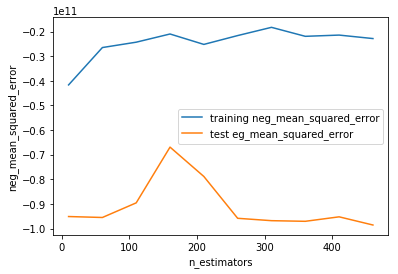

In [3671]:
# plotting neg_mean_squared_errore with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test eg_mean_squared_error")
plt.xlabel("n_estimators")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3672]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [6,7,8,9,10]}

# instantiate the model
rf = RandomForestRegressor(max_depth=15)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True, 
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': [6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit

In [3673]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.023993      0.002528         0.004798        0.001600   
1       0.017592      0.004074         0.002401        0.001960   
2       0.015994      0.003575         0.003201        0.001600   
3       0.013583      0.001962         0.002399        0.001959   
4       0.018392      0.004079         0.003200        0.001600   

  param_max_features                params  split0_test_score  \
0                  6   {'max_features': 6}      -4.186595e+11   
1                  7   {'max_features': 7}      -1.333796e+11   
2                  8   {'max_features': 8}      -2.054049e+11   
3                  9   {'max_features': 9}      -1.680584e+11   
4                 10  {'max_features': 10}      -2.366841e+11   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -1.680932e+11      -1.225700e+12      -2.289088e+11  ...   
1      -2.245013e+11      -8.235772e+11      -5.175642e+11  ...   
2      -1.505803e+11      -6.232992e+11      -2.720507e+11  ...   
3      -2.169915e+11      -7.658464e+10      -2.254746e+11  ...   
4      -2.788649e+10      -1.349497e+11      -1.265848e+11  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -5.399951e+11    3.825679e+11                5       -2.300761e+11   
1    -3.829720e+11    2.552272e+11                4       -1.264049e+11   
2    -3.250660e+11    1.666613e+11                3       -6.255751e+10   
3    -2.243986e+11    1.180446e+11                2       -3.252756e+10   
4    -1.500664e+11    7.545676e+10                1       -1.073379e+11   

   split1_train_score  split2_train_score  split3_train_score  \
0       -1.505881e+11       -1.147627e+11       -7.419879e+10   
1       -7.802864e+10       -8.831563e+10       -2.105229e+11   
2       -1.630774e+11       -1.166751e+11       -1.282840e+11   
3       -5.321523e+10       -6.189855e+10       -7.143481e+10   
4       -2.768056e+10       -2.890605e+10       -3.615077e+10   

   split4_train_score  mean_train_score  std_train_score  
0       -1.720952e+11     -1.483442e+11     5.267732e+10  
1       -4.475650e+10     -1.096057e+11     5.678432e+10  
2       -3.453915e+10     -1.010266e+11     4.634348e+10  
3       -7.508883e+10     -5.883300e+10     1.520520e+10  
4       -8.636312e+10     -5.728768e+10     3.310370e+10  

[5 rows x 21 columns]

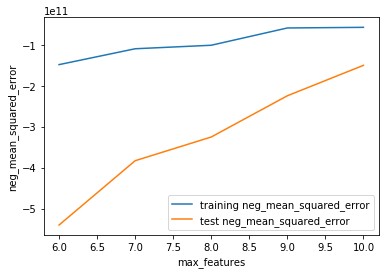

In [3674]:
# plotting r2 score with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("max_features")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3675]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 100, 10)}

# instantiate the model
rf = RandomForestRegressor(max_depth=15)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True, 
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', 

In [3676]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.035190      0.003918         0.004801        0.001599   
1       0.023193      0.001599         0.000800        0.001600   
2       0.021592      0.004077         0.002401        0.001960   
3       0.017595      0.004077         0.002399        0.001959   
4       0.023234      0.009131         0.003576        0.002663   

  param_min_samples_leaf                    params  split0_test_score  \
0                      1   {'min_samples_leaf': 1}      -8.723980e+09   
1                     11  {'min_samples_leaf': 11}      -4.278302e+12   
2                     21  {'min_samples_leaf': 21}      -6.249241e+12   
3                     31  {'min_samples_leaf': 31}      -7.255114e+12   
4                     41  {'min_samples_leaf': 41}      -8.248531e+12   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -2.002173e+10      -1.210873e+11      -3.988606e+10  ...   
1      -1.024947e+12      -2.473416e+12      -1.276884e+12  ...   
2      -8.089026e+11      -3.617503e+12      -1.246195e+12  ...   
3      -1.107752e+12      -3.995106e+12      -1.979096e+12  ...   
4      -1.346986e+12      -5.202696e+12      -2.213290e+12  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -2.542423e+11    4.170590e+11                1       -1.500277e+10   
1    -2.847518e+12    1.629358e+12                2       -1.968542e+12   
2    -3.646336e+12    2.341191e+12                3       -2.745090e+12   
3    -4.410741e+12    2.669170e+12                4       -3.496091e+12   
4    -5.177404e+12    3.035499e+12                5       -4.212443e+12   

   split1_train_score  split2_train_score  split3_train_score  \
0       -4.595427e+10       -2.247850e+10       -9.243981e+09   
1       -2.671716e+12       -2.089252e+12       -2.745368e+12   
2       -3.834691e+12       -3.351693e+12       -3.787161e+12   
3       -4.853141e+12       -4.005327e+12       -4.742737e+12   
4       -5.795808e+12       -4.753387e+12       -5.773923e+12   

   split4_train_score  mean_train_score  std_train_score  
0       -2.927378e+11     -7.708346e+10     1.085484e+11  
1       -2.123302e+12     -2.319636e+12     3.225208e+11  
2       -2.783372e+12     -3.300401e+12     4.691954e+11  
3       -3.417231e+12     -4.102905e+12     6.033460e+11  
4       -4.224935e+12     -4.952099e+12     7.074723e+11  

[5 rows x 21 columns]

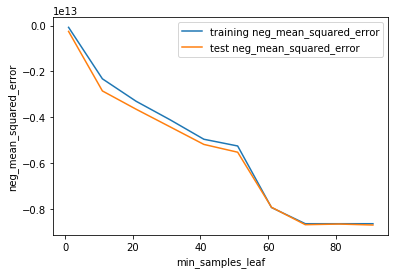

In [3677]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training neg_mean_squared_error")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test neg_mean_squared_error")
plt.xlabel("min_samples_leaf")
plt.ylabel("neg_mean_squared_error")
plt.legend()
plt.show()

In [3678]:
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(10, 100, 10)}

# instantiate the model
rf = RandomForestRegressor(max_depth=20)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  return_train_score=True, 
                   scoring="neg_mean_squared_error")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=20, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(10, 100, 10)},
             pre_dispatch='2*n_jobs'

In [3679]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.056413      0.008036         0.002420        0.003903   
1       0.030710      0.010775         0.001607        0.003215   
2       0.025763      0.006057         0.002610        0.002948   
3       0.020962      0.006428         0.004060        0.004266   
4       0.034462      0.004984         0.004072        0.004268   

  param_min_samples_split                     params  split0_test_score  \
0                      10  {'min_samples_split': 10}      -3.208874e+11   
1                      20  {'min_samples_split': 20}      -1.013947e+11   
2                      30  {'min_samples_split': 30}      -7.921342e+11   
3                      40  {'min_samples_split': 40}      -6.382571e+11   
4                      50  {'min_samples_split': 50}      -9.183562e+11   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0      -2.084014e+10      -1.355460e+11      -1.466006e+11  ...   
1      -6.553343e+10      -3.745610e+11      -1.597694e+11  ...   
2      -1.380868e+11      -1.226522e+12      -2.575082e+11  ...   
3      -1.990649e+11      -7.203025e+11      -2.759194e+11  ...   
4      -2.451586e+11      -1.020291e+12      -3.669442e+11  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0    -1.612169e+11    9.668103e+10                1       -7.153881e+10   
1    -1.907723e+11    1.117009e+11                2       -1.056509e+11   
2    -6.963255e+11    4.305038e+11                4       -4.979022e+11   
3    -4.815366e+11    2.055182e+11                3       -3.487535e+11   
4    -7.027728e+11    3.266354e+11                5       -6.694190e+11   

   split1_train_score  split2_train_score  split3_train_score  \
0       -2.971293e+10       -1.956701e+10       -4.275804e+10   
1       -1.558034e+11       -1.557126e+11       -9.731284e+10   
2       -3.109906e+11       -4.667158e+11       -3.413023e+11   
3       -2.381352e+11       -5.389731e+11       -2.591354e+11   
4       -4.352209e+11       -8.533426e+11       -4.858393e+11   

   split4_train_score  mean_train_score  std_train_score  
0       -7.315305e+10     -4.734597e+10     2.170227e+10  
1       -1.156599e+11     -1.260279e+11     2.496010e+10  
2       -4.079335e+11     -4.049689e+11     7.119469e+10  
3       -2.893304e+11     -3.348655e+11     1.086444e+11  
4       -4.909311e+11     -5.869506e+11     1.550683e+11  

[5 rows x 21 columns]

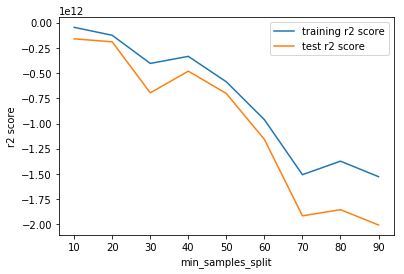

In [3680]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training r2 score")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test r2 score")
plt.xlabel("min_samples_split")
plt.ylabel("r2 score")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [3681]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15,20,25],
    'min_samples_leaf': range(10, 100, 20),
    'min_samples_split': range(10, 200, 50),
    'n_estimators': [100,200, 300], 
    'max_features': [8,9,10]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [3682]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25], 'max_f

In [3683]:
# printing the optimal accuracy score and hyperparameters
print('We can get best neg_mean_squared_error of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best neg_mean_squared_error of 0.6719683109522824 using {'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


## Fitting the model with optimal parameters

In [3684]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(bootstrap=True,
                             max_depth=25,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=8,
                             n_estimators=200)

In [3685]:
#Fit the model
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [3686]:
# Making predictions
y_pred=rfc.predict(X_test)

Text(0, 0.5, 'y_pred')

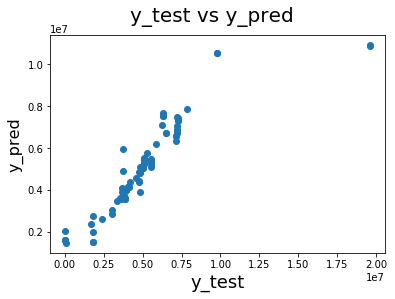

In [3687]:
#Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [3688]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1876677505695.921

In [3689]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7686022840261056

In [3690]:
print('Capstone project end date and time using str method of datetime object:')
print(dt.now())

Capstone project end date and time using str method of datetime object:
2019-12-23 22:40:00.210836
